In [134]:
import pandas as pd
data = pd.read_csv(r'../data/spi_vci_daily.csv').iloc[:, 1:]

/tmp/ipykernel_1142266/73208286.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for idx, df in data.drop(columns={'precp_idx','land_cat','time'}).groupby(['product']):


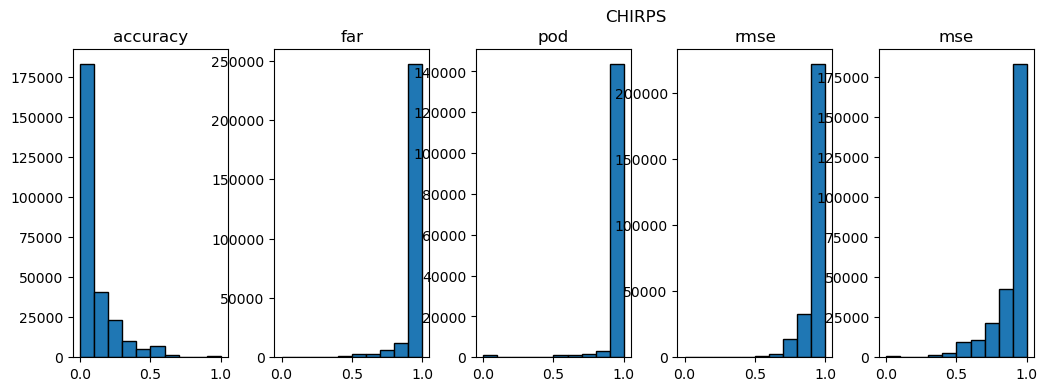

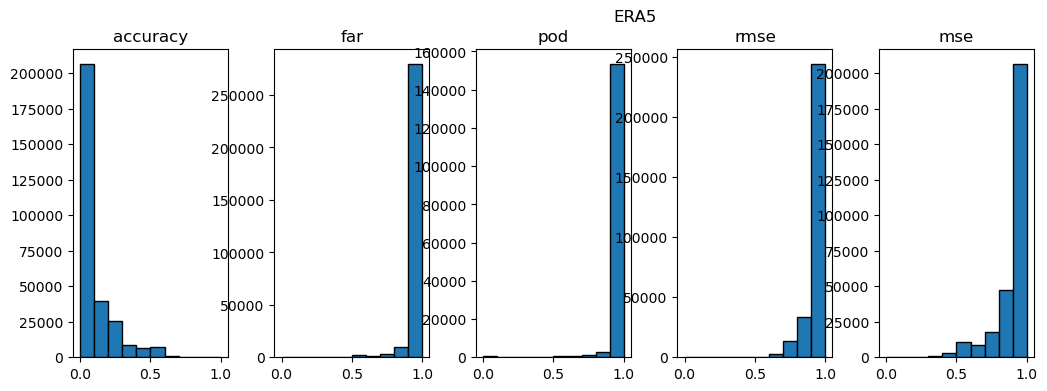

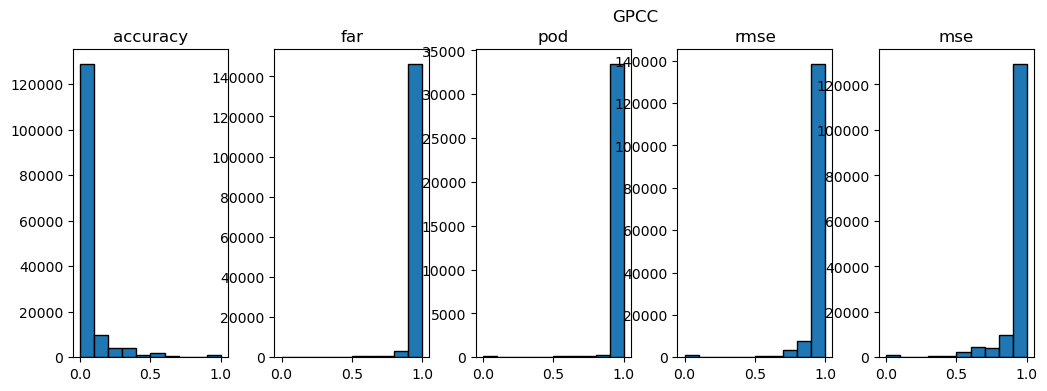

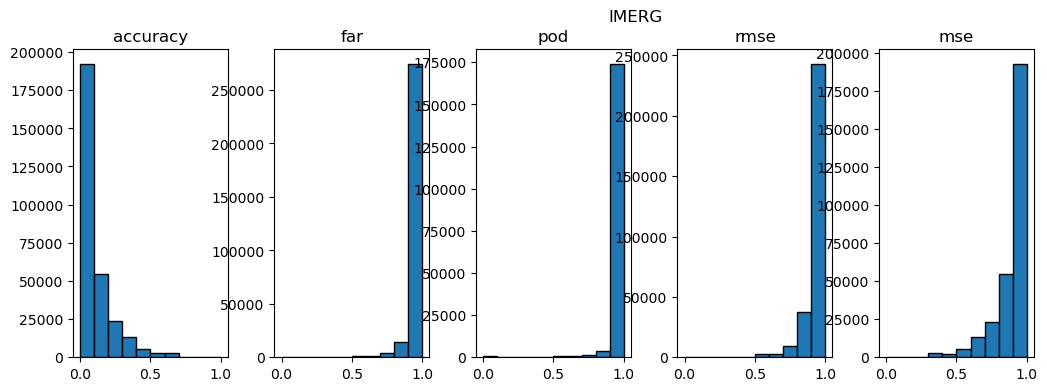

In [2]:
for idx, df in data.drop(columns={'precp_idx','land_cat','time'}).groupby(['product']):
        # plot a hist for each column
    axes = df.hist(layout=(1, 6), figsize=(15, 4), ec='k', grid=False)

    #df.plot(layout=(1, 6), kind='kde', ax=axes, secondary_y=True)

    # extract the figure object from the array of axes
    fig = axes[0][0].get_figure()

    # add the gender as the title
    fig.suptitle(idx)

In [135]:
sub_df = data.loc[data['precp_idx']=="spi_gamma_30"]

In [136]:
import seaborn as sns
df = sub_df.groupby(['description','product']).mean()[['far','pod','accuracy']]
df.style.background_gradient(cmap='Blues')


/tmp/ipykernel_1779641/3295850026.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = sub_df.groupby(['description','product']).mean()[['far','pod','accuracy']]


<Figure size 640x480 with 0 Axes>

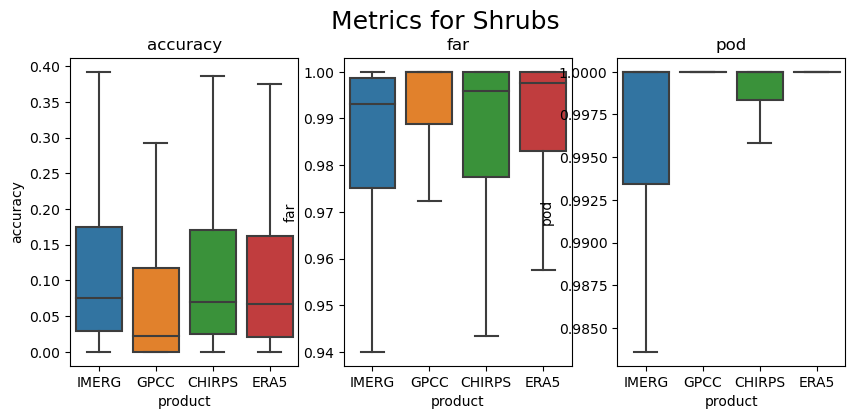

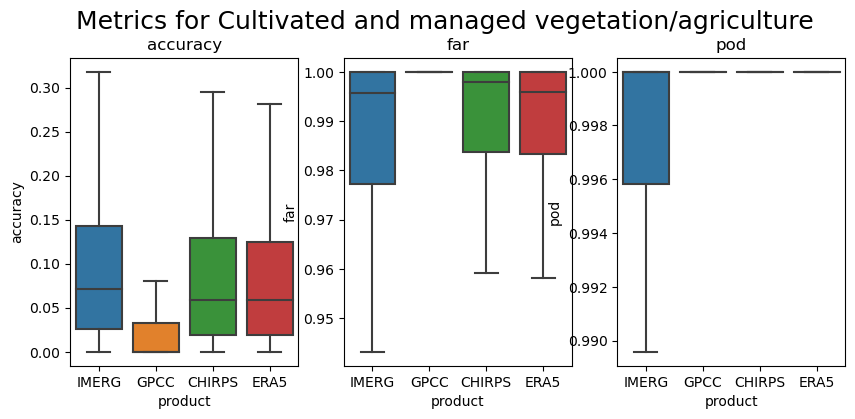

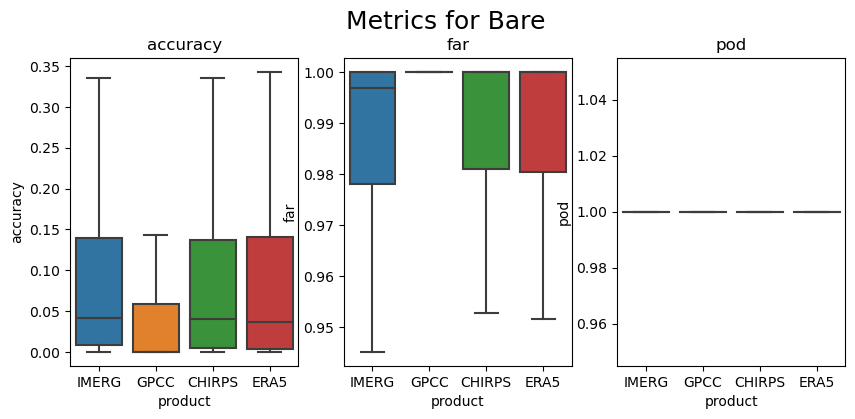

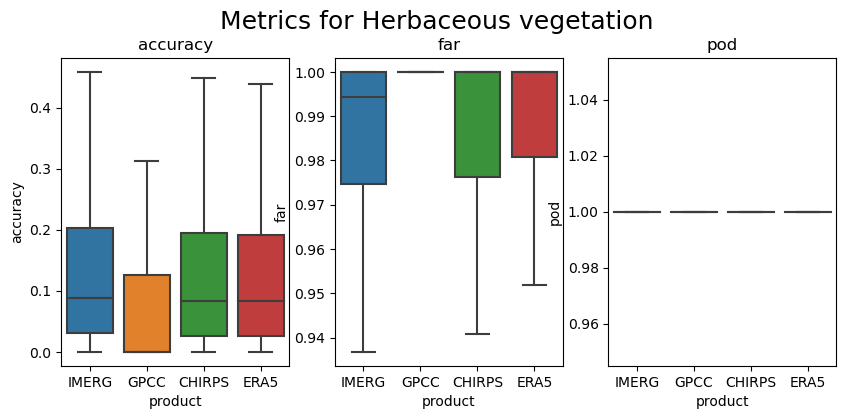

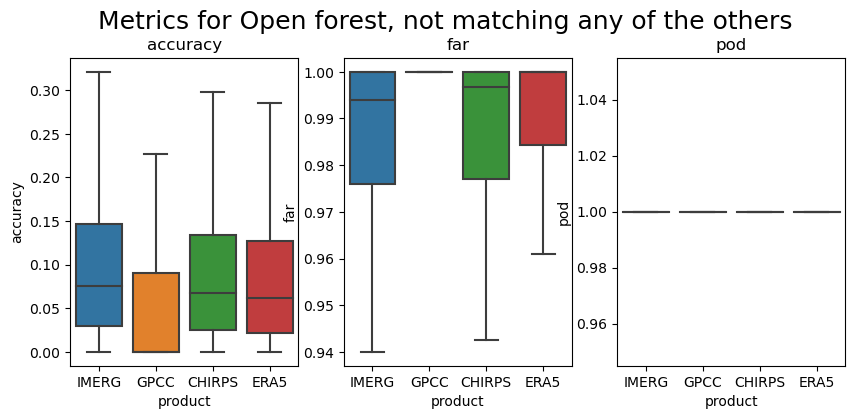

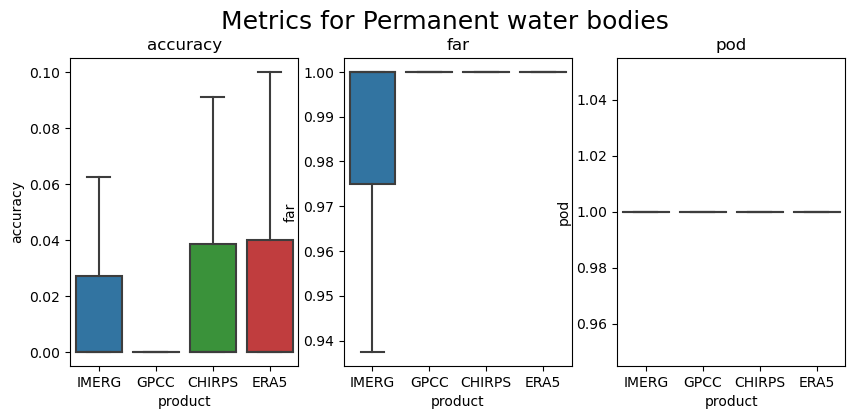

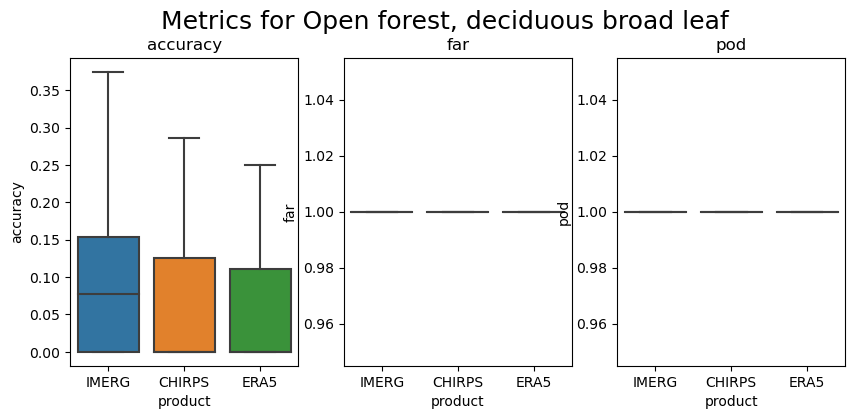

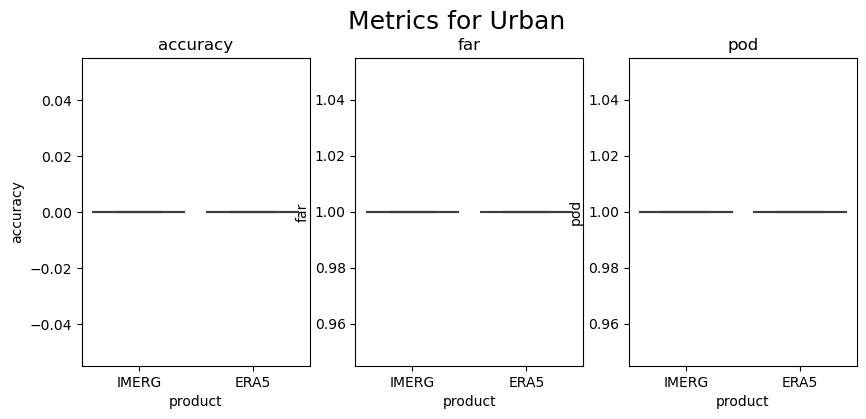

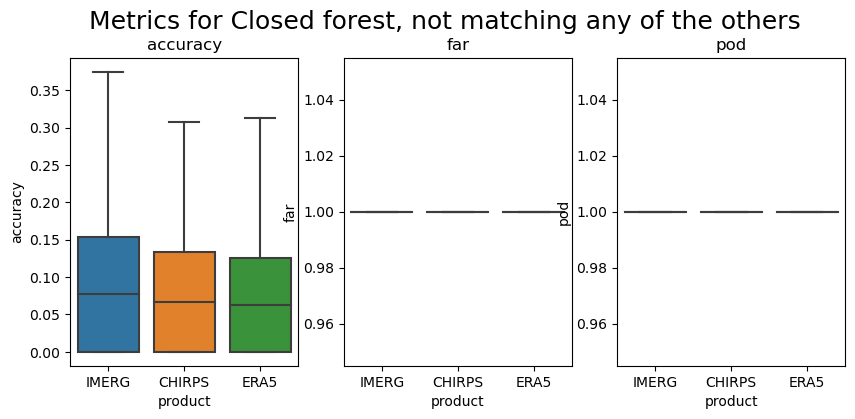

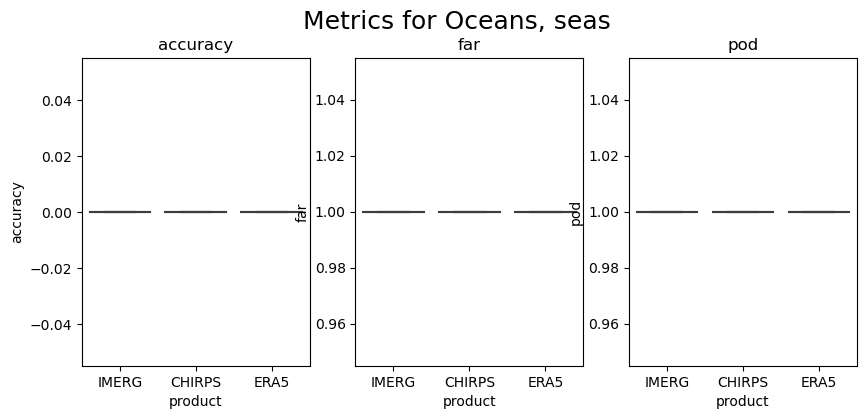

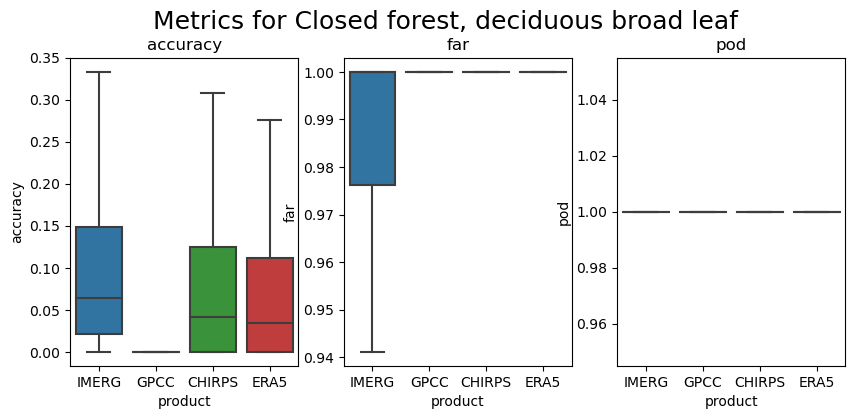

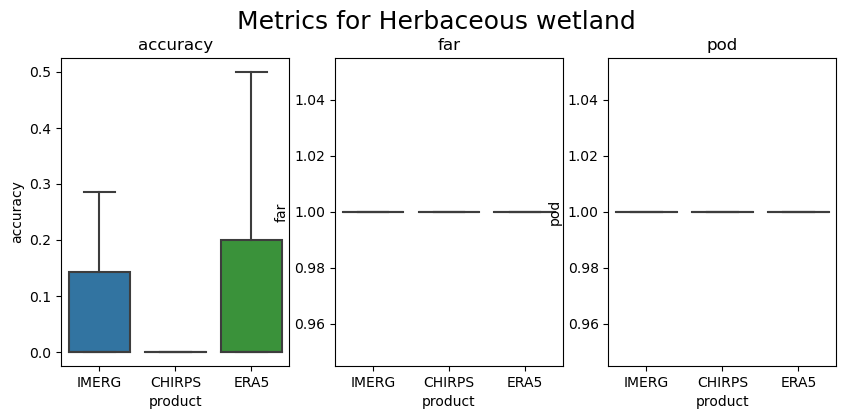

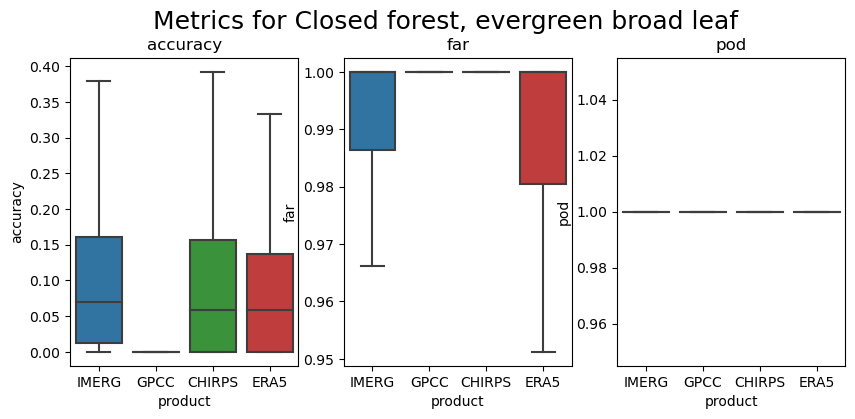

In [139]:
import matplotlib.pyplot as plt

plt.subplots_adjust(wspace=0.8)
plt.subplots_adjust(hspace=0.5)

metrics = ["accuracy","far","pod"]

#countries = ['Kenya','Ethiopia','Somalia']
for i, soil in enumerate(sub_df["description"].unique()):
    #for metric in ['accuracy']:
    fig, axes = plt.subplots(1, 3, figsize=(10,4))
    for metric, ax in zip(metrics, axes.ravel()):
        plt.suptitle(f"Metrics for {soil}", fontsize=18, y=1)
        new_df = sub_df.loc[(sub_df["description"]==soil)].dropna(subset=[metric])
        if len(new_df)>0:
            sns.boxplot(data = new_df, y=metric, x='product', ax=ax, showfliers=False)
        ax.set_title(f"{metric}")
    plt.show()

In [1]:
import xarray as xr
from p_drought_indices.functions.function_clns import load_config, cut_file, subsetting_pipeline
import os
from p_drought_indices.functions.function_clns import crop_get_spi, crop_get_thresh
from p_drought_indices.analysis.visualizations.viz_vci_spi import box_plot_year, multiple_spi_boxplots, get_subplot_year, get_year_compare
import numpy as np
import warnings
from matplotlib import gridspec
import matplotlib.patches as mpatches
from matplotlib import gridspec
import calendar
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')


CONFIG_PATH = "../config.yaml"
config = load_config(CONFIG_PATH)
ds_ndvi = xr.open_dataset(os.path.join(config['NDVI']['ndvi_path'], 'smoothed_ndvi_1.nc'))
vci = xr.open_dataset(os.path.join(config['NDVI']['ndvi_path'], 'vci_1D.nc'))
res_ds = xr.open_dataset(os.path.join(config['NDVI']['ndvi_path'], 'percentage_ndvi.nc'))

config_directories = [config['SPI']['IMERG']['path'], config['SPI']['GPCC']['path'], config['SPI']['CHIRPS']['path'], config['SPI']['ERA5']['path']]
config_dir_precp = [config['PRECIP']['IMERG']['path'], config['PRECIP']['GPCC']['path'], config['PRECIP']['CHIRPS']['path'], config['PRECIP']['ERA5']['path'],  config['PRECIP']['TAMSTAT']['path']]
            

/home/woden/anaconda3/envs/ric_gis2_py39/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


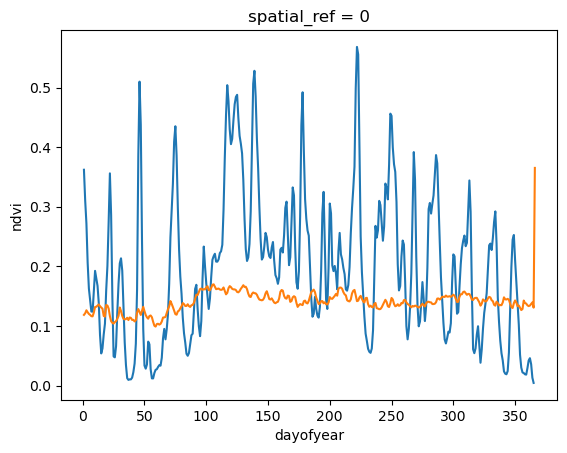

In [9]:
year = 2011

mean_res = res_ds.groupby("time.dayofyear").mean(["time"]).mean(["lat","lon"])
res_ds_sub = res_ds.sel(time=res_ds.time.dt.year.isin([year]))
res_ds_mean = res_ds_sub.groupby("time.dayofyear").mean(["lat","lon"])
mean_res["time"]= res_ds_mean["time"]
res_ds_mean["ndvi"].plot(x="dayofyear")
mean_res["ndvi"].plot(x="dayofyear")
plt.show()

### Plotting VCI by year

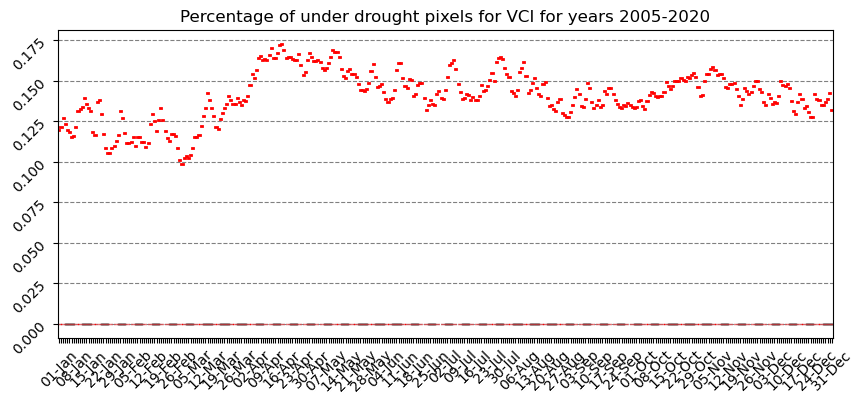

In [62]:
res_ds = crop_get_thresh(vci["ndvi"]).to_dataset()
title="Percentage of under drought pixels for VCI for years 2005-2020"
box_plot_year(res_ds, title = title, year=year, show_means=True, figsize=(10,4))

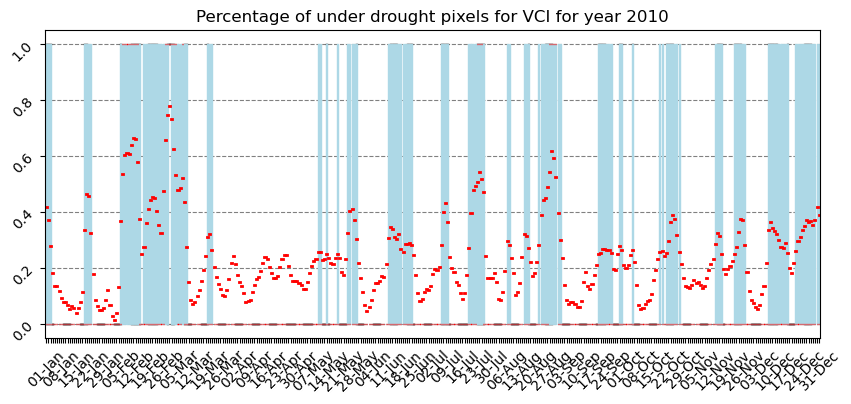

In [60]:
year =2010
subset_res = res_ds.sel(time=res_ds.time.dt.year.isin([year]))
title=f"Percentage of under drought pixels for VCI for year {year}"
box_plot_year(subset_res, title = title, year=year, show_means=True, figsize=(10,4))

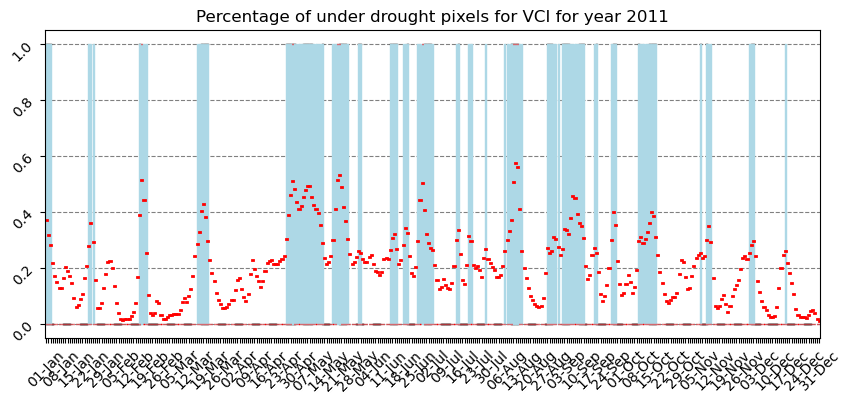

In [61]:
year =2011
subset_res = res_ds.sel(time=res_ds.time.dt.year.isin([year]))
title=f"Percentage of under drought pixels for VCI for year {year}"
box_plot_year(subset_res, title = title, year=year, show_means=True, figsize=(10,4))

### Visualize SPI by product 

In [1]:
import pandas as pd
from datetime import datetime
import time
from p_drought_indices.analysis.visualizations.viz_vci_spi import get_subplot_year, adjust_full_list, str_month

import xarray as xr
from p_drought_indices.functions.function_clns import load_config, cut_file, subsetting_pipeline
import os
from p_drought_indices.functions.function_clns import crop_get_spi, crop_get_thresh
from p_drought_indices.analysis.visualizations.viz_vci_spi import box_plot_year, get_xarray_time_subset, multiple_spi_boxplots, get_subplot_year, subsetting_whole
import numpy as np
import warnings
from matplotlib import gridspec
import matplotlib.patches as mpatches
from matplotlib import gridspec
import calendar
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')


CONFIG_PATH = "../config.yaml"
config = load_config(CONFIG_PATH)
ds_ndvi = xr.open_dataset(os.path.join(config['NDVI']['ndvi_path'], 'smoothed_ndvi_1_old.nc'))
vci = xr.open_dataset(os.path.join(config['NDVI']['ndvi_path'], 'vci_1D.nc'))
res_ds = xr.open_dataset(os.path.join(config['NDVI']['ndvi_path'], 'percentage_ndvi.nc'))

config_directories = [config['SPI']['IMERG']['path'], config['SPI']['GPCC']['path'], config['SPI']['CHIRPS']['path'], config['SPI']['ERA5']['path'], config['SPI']['MSWEP']['path'] ]
config_dir_precp = [config['PRECIP']['IMERG']['path'],config['PRECIP']['CHIRPS_05']['path'], config['PRECIP']['GPCC']['path'], config['PRECIP']['CHIRPS']['path'], config['PRECIP']['ERA5']['path'],  config['PRECIP']['TAMSTAT']['path'],config['PRECIP']['MSWEP']['path']]
            

prod = "ERA5"
late = 90
product_dir = [f for f in config_dir_precp if "precipitation" in f][0]
list_files = [f for f in os.listdir(product_dir) if (f.endswith(".nc")) and ("merged" in f)]
precp_ds = xr.open_dataset(os.path.join(product_dir, list_files[0]))
variable = [var for var in precp_ds.data_vars if var!= "spatial_ref"][0]

spi_dir = [f for f in config_directories if "precipitation" in f][0]
var_target = f"spi_gamma_{late}"
files = [f for f in os.listdir(spi_dir) if var_target in f ]
spi_ds = xr.open_dataset(os.path.join(spi_dir, files[0]))

days are 366
Calculating the full year for boxplot
The days are 366
Gathered the whole climatology to build precipitation boxplot
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 366
Calculating the full year for boxplot
The days are 366


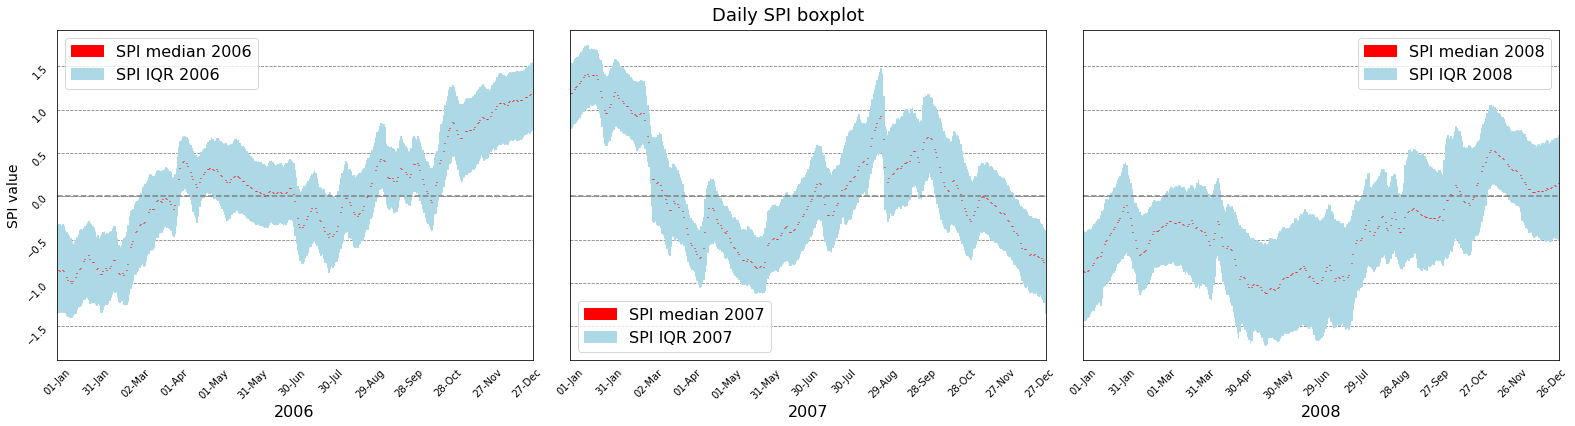

days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


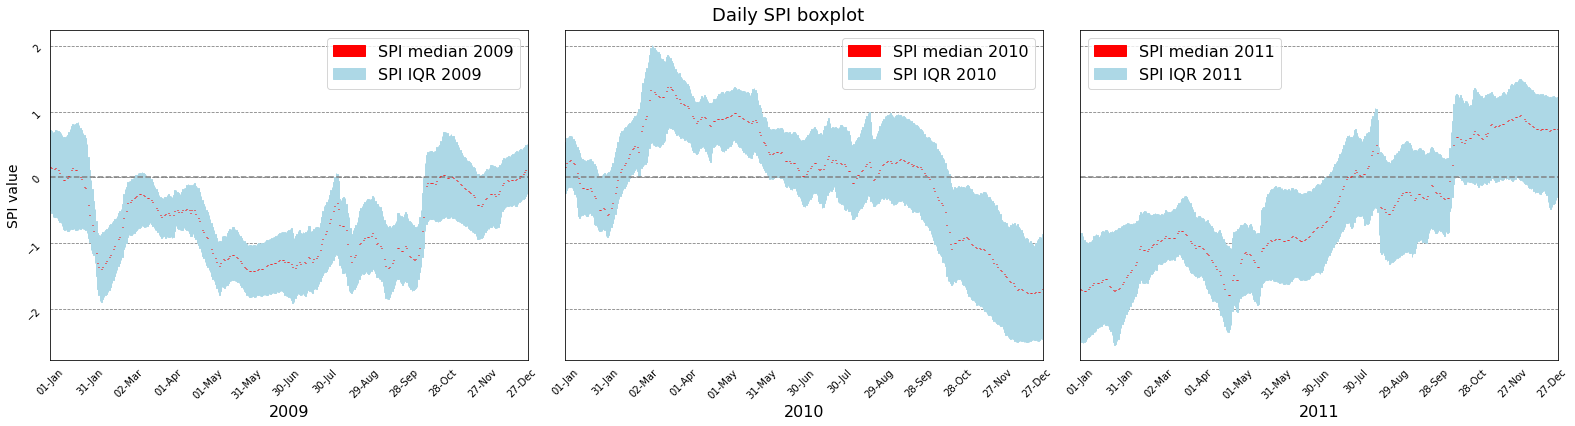

days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


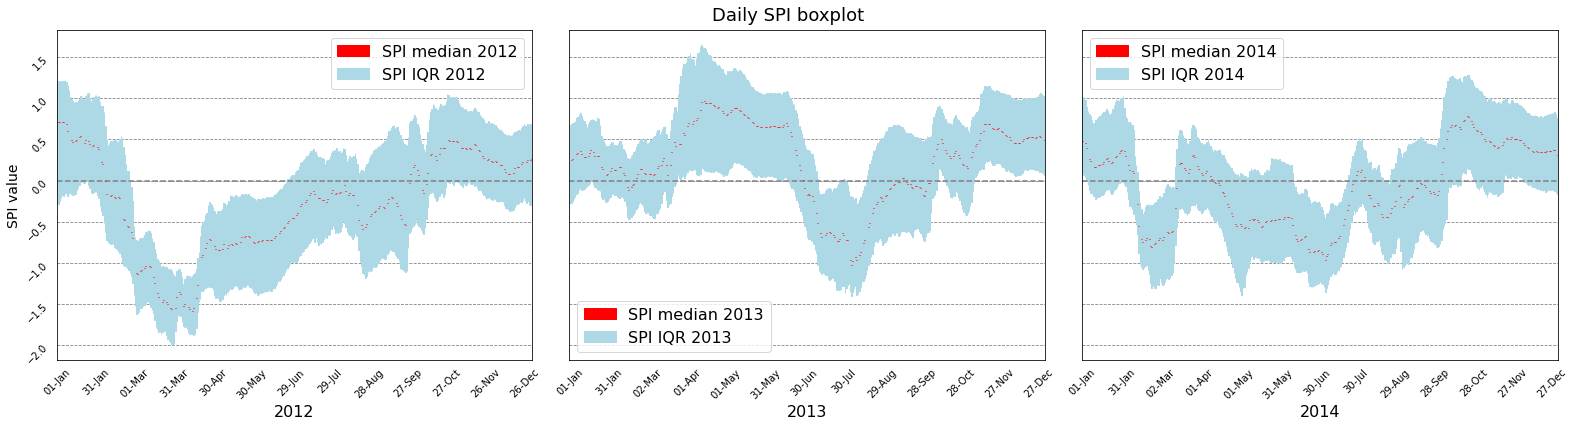

days are 365
Calculating the full year for boxplot
The days are 365
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365


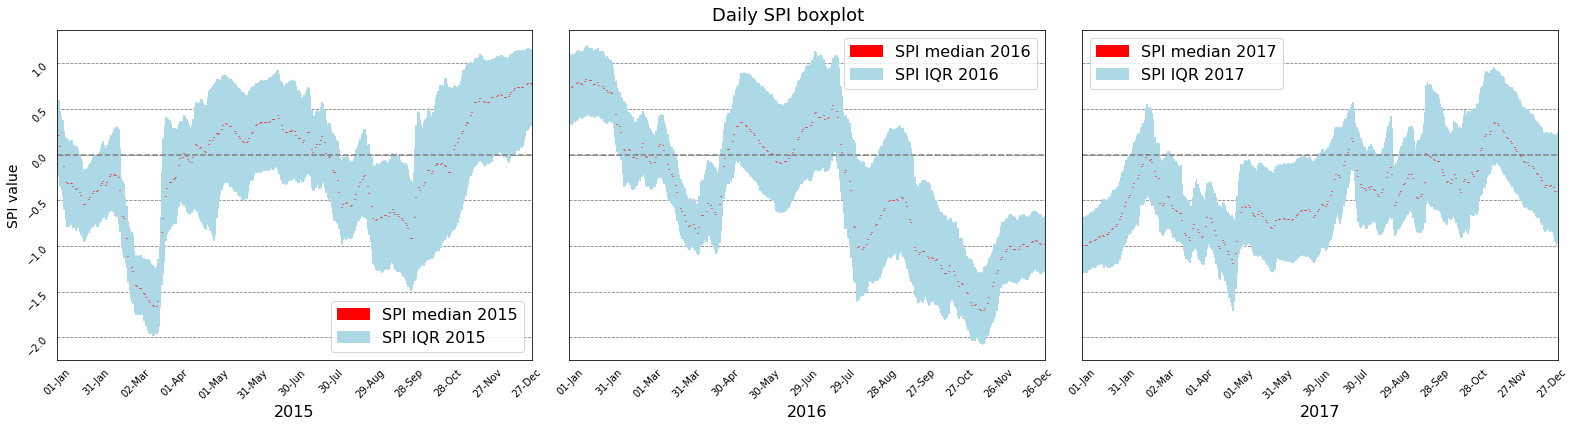

days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 366
Calculating the full year for boxplot
The days are 366


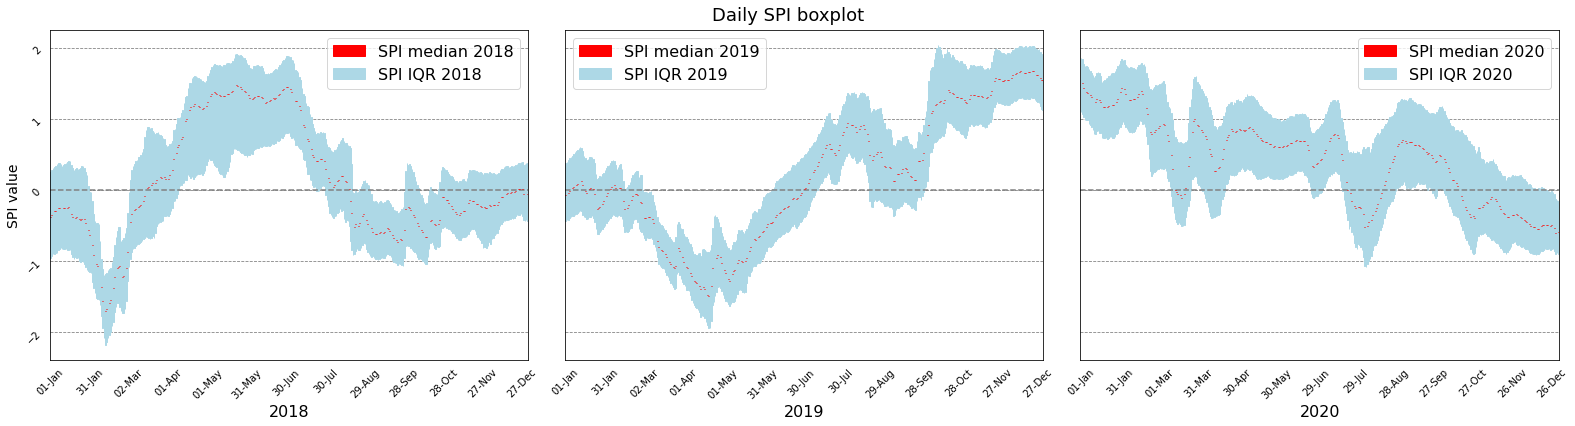

In [2]:
from p_drought_indices.analysis.visualizations.viz_vci_spi import plot_precp_3_years, get_precp_hist, plot_spi_3_years

df_list_all = get_precp_hist(spi_ds, variable=var_target)

for year in [2006, 2009, 2012, 2015, 2018]:
    plot_spi_3_years(spi_ds, years=[year, year+1, year+2], variable=var_target, df_list_all=df_list_all)

In [2]:
ds = ds_ndvi.copy()

df_list_all, list_dates_all = get_subplot_year(ds)

months = [i for i in np.arange(9,13)]
year = 2009
df_list_1, list_dates_1 = get_xarray_time_subset(ds=ds, year=year, variable="ndvi")
df_list_all_1 = adjust_full_list(df_list_all =df_list_all, year = year)

months = [i for i in np.arange(1,6)]
year=2010
df_list_2, list_dates_2 = get_xarray_time_subset(ds=ds, year=year, variable="ndvi")
df_list_all_2 = adjust_full_list(df_list_all =df_list_all, year = year)

year = 2011
df_list_3, list_dates_3 = get_xarray_time_subset(ds=ds, year=year, variable="ndvi")
df_list_all_3 = adjust_full_list(df_list_all=df_list_all, year = year)


days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


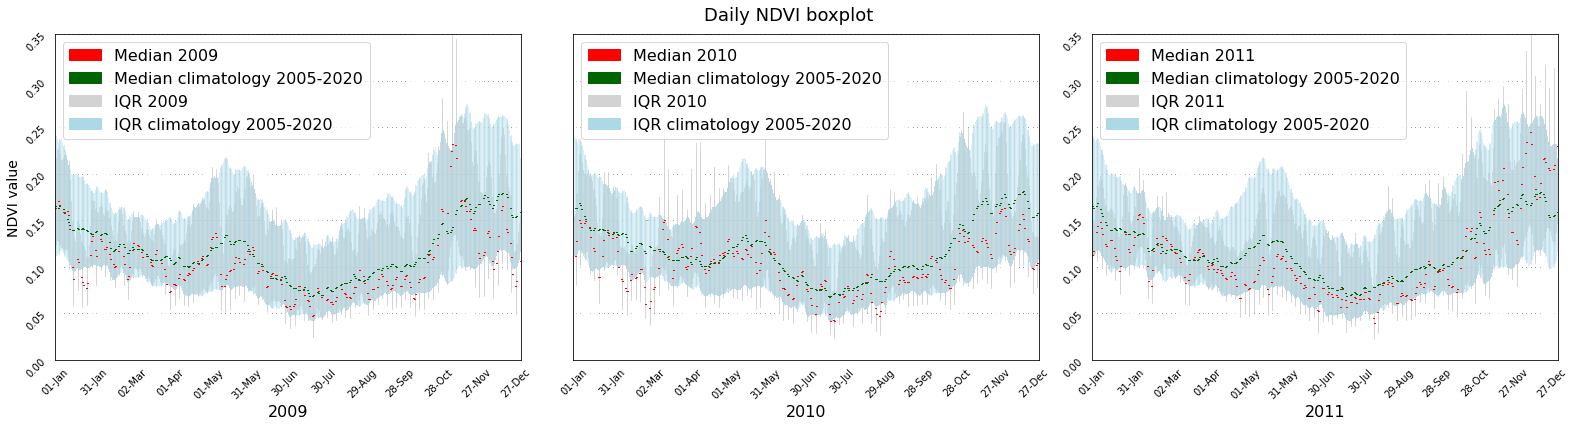

In [3]:

fig = plt.figure(figsize=(22,6))
# set height ratios for subplots
gs = gridspec.GridSpec(1, 3) 

##Legend

pop_a = mpatches.Patch(color='red', label='Median 2009')
pop_b = mpatches.Patch(color='darkgreen', label='Median climatology 2005-2020')
pop_c = mpatches.Patch(color='lightblue', label='IQR climatology 2005-2020')
pop_d = mpatches.Patch(color='lightgrey', label='IQR 2009')
pop_e = mpatches.Patch(color='red', label='Median 2010')
pop_f = mpatches.Patch(color='lightgrey', label='IQR 2010')
pop_g = mpatches.Patch(color='red', label='Median 2011')
pop_h = mpatches.Patch(color='lightgrey', label='IQR 2011')


# the first subplot
ax0 = fig.add_subplot(gs[0])
#ax0.set_title("NDVI for 2009")
ax0.legend(handles=[pop_a, pop_b, pop_d, pop_c], fontsize=16, loc="upper left")
ax0.set_ylabel("NDVI value", fontsize=14)
ax0.set_xlabel("2009", fontsize=16)

# log scale for axis Y of the first subplot
line0 = ax0.boxplot(df_list_1, showfliers=False, labels=list_dates_1, patch_artist=True,showcaps=False)
line2 = ax0.boxplot(df_list_all_1, showfliers=False, labels=list_dates_1, patch_artist=True,showcaps=False, manage_ticks=False)

# the second subplot
# shared axis X
ax1 = fig.add_subplot(gs[1], sharey=ax0)
#ax1.set_title("NDVI for 2010")
ax1.set_xlabel("2010", fontsize=16)
ax1.legend(handles=[pop_e, pop_b, pop_f, pop_c], fontsize=16, loc="upper left")

line3 = ax1.boxplot(df_list_2, showfliers=False, labels=list_dates_2, patch_artist=True,showcaps=False)
line4 = ax1.boxplot(df_list_all_2, showfliers=False, labels=list_dates_2, patch_artist=True,showcaps=False, manage_ticks=False)

# the third subplot
# shared axis X
ax2 = fig.add_subplot(gs[2], sharey=ax0)
#ax1.set_title("NDVI for 2010")
ax2.set_xlabel("2011", fontsize=16)
ax2.legend(handles=[pop_g, pop_b, pop_h, pop_c], fontsize=16, loc="upper left")

line5 = ax2.boxplot(df_list_3, showfliers=False, labels=list_dates_3, patch_artist=True,showcaps=False)
line6 = ax2.boxplot(df_list_all_3, showfliers=False, labels=list_dates_3, patch_artist=True,showcaps=False, manage_ticks=False)

plt.setp(ax1.get_yticklabels(), visible=False)
plt.ylim(0, 0.35)
n=30
for ax in [ax0, ax1, ax2]:
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='grey', linestyle='dashed')
    [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
    [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_gridlines()) if i % n != 0]
    ax.tick_params(labelrotation=45, tick1On=False)

for med in line0['medians'], line3['medians'], line5['medians']:
    for median in med:
        median.set_color('red')
for boxes in line0["boxes"] ,line3["boxes"],line5["boxes"]:
    for box in boxes:
        box.set_color("lightgrey")
        box.set_alpha(0.8)
for whisker in line0["whiskers"], line3["whiskers"], line5["whiskers"]:
    for whisk in whisker:
        whisk.set_color("white")

for med in [line2['medians'], line4['medians'], line6['medians']]:
    for median in med:
        median.set_color('darkgreen')
for boxes in [line2["boxes"] ,line4["boxes"],line6["boxes"]]:
    for box in boxes:
        box.set_color("lightblue")
        box.set_alpha(0.4)
for whisker in [line2["whiskers"], line4["whiskers"], line6["whiskers"]]:
    for whisk in whisker:
        whisk.set_color("white")

gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.suptitle("Daily NDVI boxplot", fontsize=18)
plt.subplots_adjust(top=0.95)
plt.show()

In [220]:
from matplotlib import gridspec
#res_spi = crop_get_spi(spi_ds)

ds = vci.copy()
df_list_all, list_dates_all = get_subplot_year(ds)

months = [i for i in np.arange(9,13)]
year = 2009
df_list_1, list_dates_1 = get_xarray_time_subset(ds=ds, year=year)
df_list_all_1 = adjust_full_list(df_list_all = df_list_all, year = year)

months = [i for i in np.arange(1,6)]
year=2010
df_list_2, list_dates_2 = get_xarray_time_subset(ds=ds, year=year)
df_list_all_2 = adjust_full_list(df_list_all =df_list_all, year = year)

year=2011
df_list_3, list_dates_3 = get_xarray_time_subset(ds=ds, year=year)
df_list_all_3 = adjust_full_list(df_list_all =df_list_all, year = year)

days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


In [221]:
list_med = pd.Series([p.mean() for p in df_list_1])
list_med_2 = pd.Series([p.mean() for p in df_list_2])
list_med_3 = pd.Series([p.mean() for p in df_list_3])

all_1 = pd.Series([p.mean() for p in df_list_all_1])
all_2= pd.Series([p.mean() for p in df_list_all_2])
all_3= pd.Series([p.mean() for p in df_list_all_3])

list_med.index=list_dates_1
list_med_2.index=list_dates_2
list_med_3.index=list_dates_3

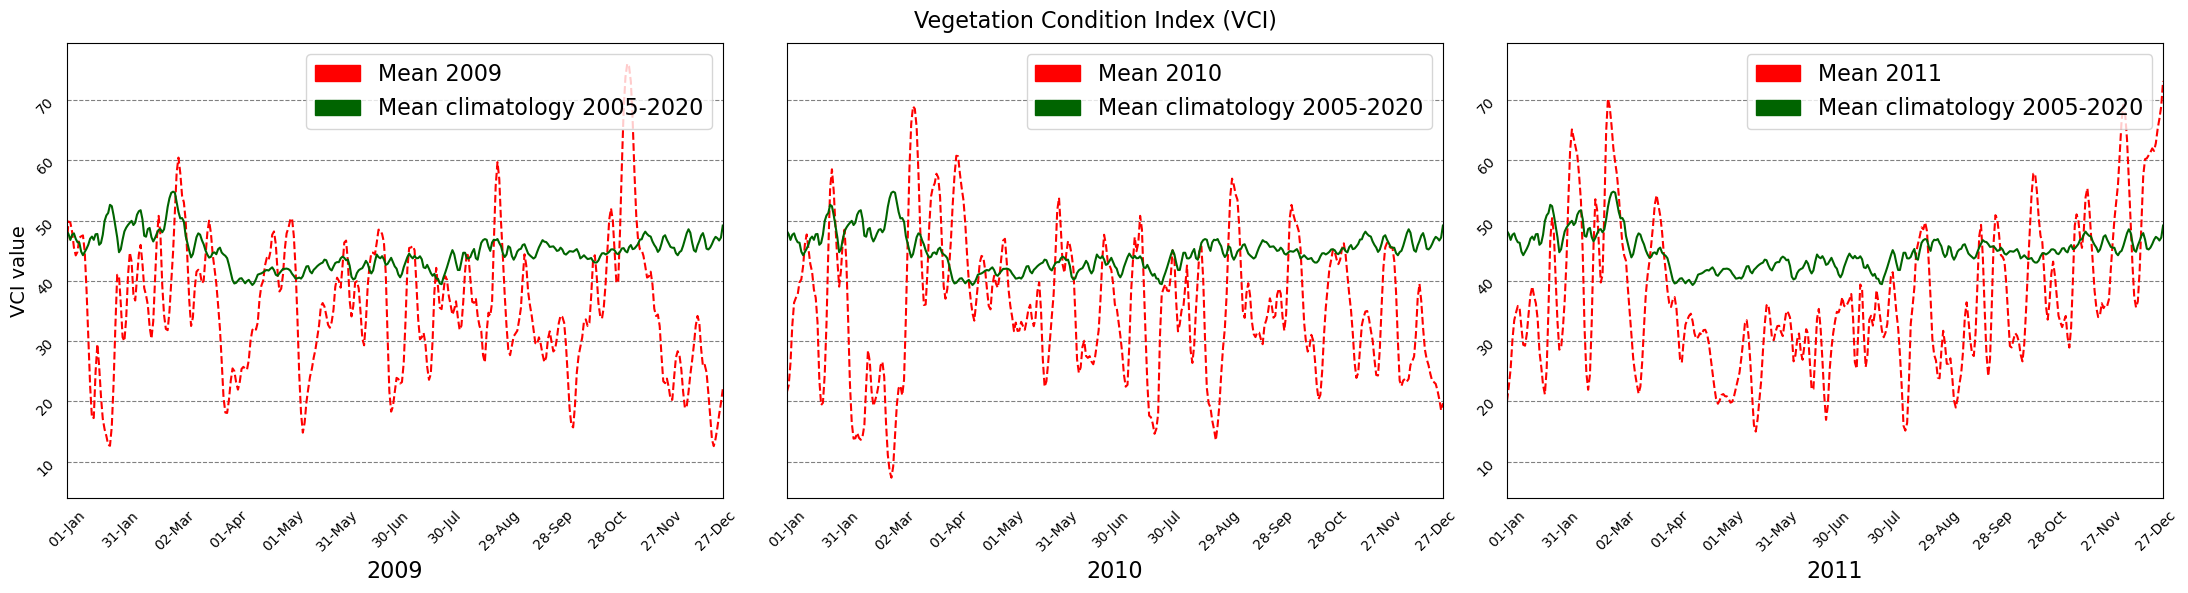

In [224]:
fig = plt.figure(figsize=(22,6))
# set height ratios for subplots
gs = gridspec.GridSpec(1, 3) 

# the first subplot
ax0 = fig.add_subplot(gs[0])

##Legend

pop_a = mpatches.Patch(color='red', label='Mean 2009')
pop_b = mpatches.Patch(color='darkgreen', label='Mean climatology 2005-2020')
pop_d = mpatches.Patch(color='red', label='Mean 2010')
pop_e = mpatches.Patch(color='red', label='Mean 2011')


ax0.legend(handles=[pop_a, pop_b],loc="upper right", fontsize=16)
ax0.set_xticklabels(list_dates_1)
ax0.set_ylabel("VCI value", fontsize=14)
ax0.set_xlabel("2009", fontsize=16)


# log scale for axis Y of the first subplot
line0 = ax0.plot(list_med, c="red", linestyle="--")
line2 = ax0.plot(all_1,c="darkgreen")

# the second subplot
# shared axis X
ax1 = fig.add_subplot(gs[1], sharey=ax0)
ax1.set_xticklabels(list_dates_2)
ax1.legend(handles=[pop_d,pop_b],loc="upper right", fontsize=16)
ax1.set_xlabel("2010", fontsize=16)


line3 = ax1.plot(list_med_2, c="red",linestyle="--")
line4 = ax1.plot(all_2,c="darkgreen")

# the third subplot
# shared axis X
ax2 = fig.add_subplot(gs[2], sharey=ax0)
ax2.set_xticklabels(list_dates_3)
ax2.legend(handles=[pop_e,pop_b],loc="upper right", fontsize=16)
ax2.set_xlabel("2011", fontsize=16)


line5 = ax2.plot(list_med_3, c="red",linestyle="--")
line6 = ax2.plot(all_3,c="darkgreen")

n=30
plt.setp(ax1.get_yticklabels(), visible=False)
for ax in [ax0, ax1, ax2]:
    ax.margins(x=0)
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='grey', linestyle='dashed')
    [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
    [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_gridlines()) if i % n != 0]
    ax.tick_params(labelrotation=45, tick1On=False)

gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.suptitle("Vegetation Condition Index (VCI)", fontsize=16)
plt.show()

days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


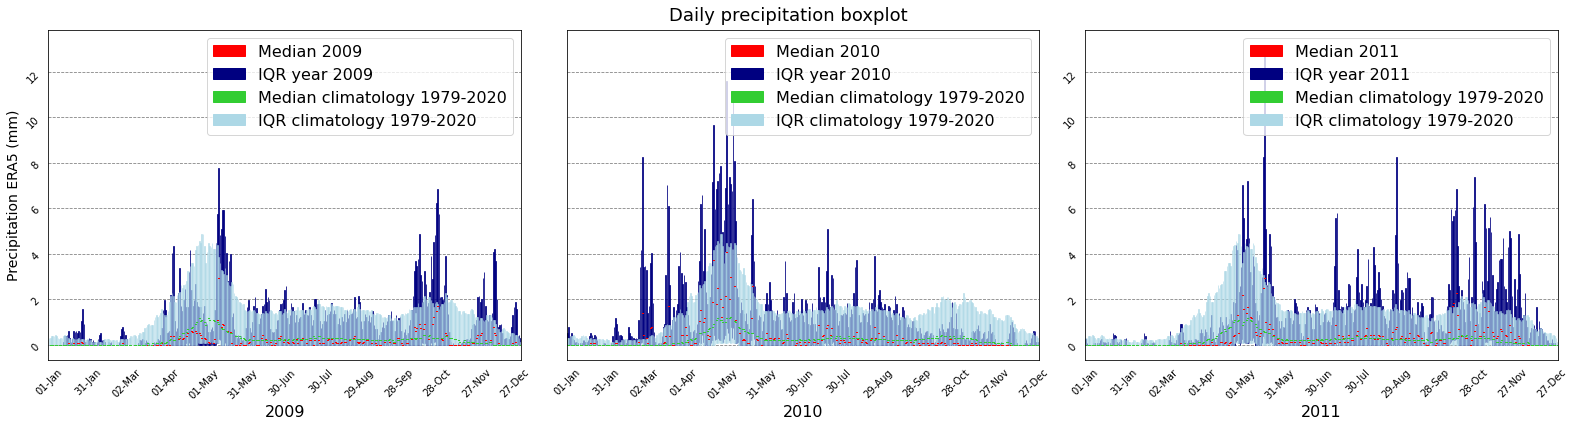

In [14]:
ds = precp_ds.copy()
df_list_all, list_dates_all = get_subplot_year(ds, var=variable)

months = [i for i in np.arange(9,13)]
year = 2009
df_list_1, list_dates_1 = get_xarray_time_subset(ds=ds, year=year, variable=variable)
df_list_all_1 = adjust_full_list(df_list_all =df_list_all, year = year)

months = [i for i in np.arange(1,6)]
year=2010
df_list_2, list_dates_2 = get_xarray_time_subset(ds=ds, year=year, variable=variable)
df_list_all_2 = adjust_full_list(df_list_all =df_list_all, year = year)

year=2011
df_list_3, list_dates_3 = get_xarray_time_subset(ds=ds, year=year, variable=variable)
df_list_all_3 = adjust_full_list(df_list_all =df_list_all, year = year)

fig = plt.figure(figsize=(22,6))

pop_a = mpatches.Patch(color='red', label='Median 2009')
pop_b = mpatches.Patch(color='navy', label='IQR year 2009')
pop_e = mpatches.Patch(color='red', label='Median 2010')
pop_f = mpatches.Patch(color='navy', label='IQR year 2010')
pop_c = mpatches.Patch(color='limegreen', label='Median climatology 1979-2020')
pop_d = mpatches.Patch(color='lightblue', label='IQR climatology 1979-2020')
pop_g = mpatches.Patch(color='red', label='Median 2011')
pop_h = mpatches.Patch(color='navy', label='IQR year 2011')


# set height ratios for subplots
gs = gridspec.GridSpec(1, 3) 

# the first subplot
ax0 = fig.add_subplot(gs[0])
#ax0.set_title(f"{prod} precipitation for 2009", fontsize=20)
ax0.set_ylabel("Precipitation ERA5 (mm)", fontsize=14)
ax0.set_xlabel("2009", fontsize=16)


# log scale for axis Y of the first subplot
line0 = ax0.boxplot(df_list_1, showfliers=False, whis=0,labels = list_dates_1, patch_artist=True,showcaps=False)
line2 = ax0.boxplot(df_list_all_1, showfliers=False,whis=0, labels = list_dates_1, patch_artist=True,showcaps=False, manage_ticks=False)
ax0.legend(handles=[pop_a,pop_b, pop_c,pop_d], fontsize=16)

# the second subplot
# shared axis X
ax1 = fig.add_subplot(gs[1], sharey=ax0)
#ax1.set_title(f"{prod} precipitation for 2010",fontsize=20)
ax1.set_xlabel("2010", fontsize=16)
ax1.legend(handles=[pop_e,pop_f, pop_c,pop_d], fontsize=16)
line3 = ax1.boxplot(df_list_2, showfliers=False, whis=0,labels=list_dates_2, patch_artist=True,showcaps=False)
line4 = ax1.boxplot(df_list_all_2, showfliers=False, whis=0, labels=list_dates_2, patch_artist=True,showcaps=False, manage_ticks=False)

ax2 = fig.add_subplot(gs[2], sharey=ax0)
ax2.set_xlabel(f"2011", fontsize=16)
ax2.legend(handles=[pop_g,pop_h, pop_c,pop_d], fontsize=16)

line5 = ax2.boxplot(df_list_3, showfliers=False, whis=0,labels=list_dates_3, patch_artist=True,showcaps=False)
line6 = ax2.boxplot(df_list_all_3, showfliers=False, whis=0, labels=list_dates_3, patch_artist=True,showcaps=False, manage_ticks=False)

plt.setp(ax1.get_yticklabels(), visible=False)
#plt.setp(ax2.get_yticklabels(), visible=False)

n=30
for ax in [ax0, ax1, ax2]:
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='grey', linestyle='dashed')
    [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
    [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_gridlines())]
    ax.tick_params(labelrotation=45,tick1On=False)



for med in line0['medians'], line3['medians'],line5['medians']:
    for median in med:
        median.set_color('red')
for boxes in line0["boxes"] ,line3["boxes"], line5['boxes']:
    for box in boxes:
        box.set_color("navy")
        box.set_alpha(0.8)
for whisker in line0["whiskers"], line3["whiskers"], line5['whiskers']:
    for whisk in whisker:
        whisk.set_color("white")
for med in line2['medians'], line4['medians'], line6['medians']:
    for median in med:
        median.set_color('limegreen')
for boxes in line2["boxes"] ,line4["boxes"], line6['boxes']:
    for box in boxes:
        box.set_color("lightblue")
        box.set_alpha(0.6)
for whisker in line2["whiskers"], line4["whiskers"], line6['whiskers']:
    for whisk in whisker:
        whisk.set_color("white")

gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.suptitle("Daily precipitation boxplot", fontsize=18)
plt.subplots_adjust(top=0.95)
plt.show()

days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


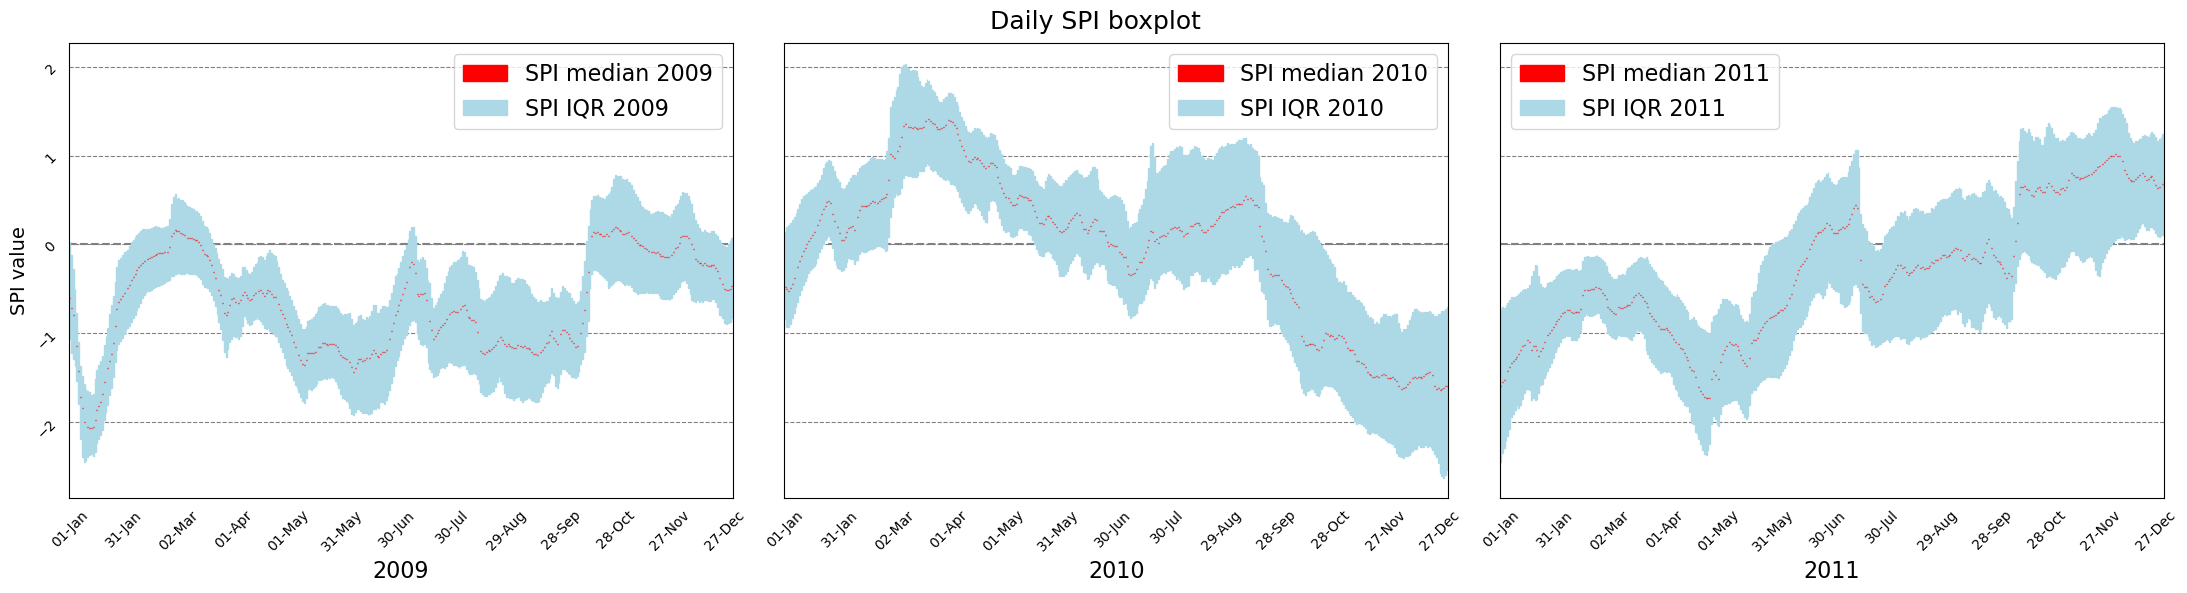

In [233]:
#res_spi = crop_get_spi(spi_ds)

from matplotlib import gridspec

ds = spi_ds.copy()

#df_list_all, list_dates_all = get_subplot_year(ds, var=var_target)

months = [i for i in np.arange(9,13)]
year = 2009
df_list_1, list_dates_1 = get_xarray_time_subset(ds=ds, year=year, variable=var_target)
#df_list_all_1 = subsetting_whole(df_list_all, months, year = year)

months = [i for i in np.arange(1,6)]
year=2010
df_list_2, list_dates_2 = get_xarray_time_subset(ds=ds, year=year, variable=var_target)
#df_list_all_2 = subsetting_whole(df_list_all, months, year = year)

year=2011
df_list_3, list_dates_3 = get_xarray_time_subset(ds=ds, year=year, variable=var_target)


pop_a = mpatches.Patch(color='red', label='SPI median 2009')
pop_b = mpatches.Patch(color='lightblue', label='SPI IQR 2009')

pop_c = mpatches.Patch(color='red', label='SPI median 2010')
pop_d = mpatches.Patch(color='lightblue', label='SPI IQR 2010')

pop_e = mpatches.Patch(color='red', label='SPI median 2011')
pop_f = mpatches.Patch(color='lightblue', label='SPI IQR 2011')

fig = plt.figure(figsize=(22,6))
# set height ratios for subplots
gs = gridspec.GridSpec(1, 3) 

# the first subplot
ax0 = fig.add_subplot(gs[0])
#ax0.set_title(f"{prod} SPI {late} for 2009")

line0 = ax0.boxplot(df_list_1, showfliers=False, labels=list_dates_1, whis=0,patch_artist=True,showcaps=False,showmeans=False,medianprops=dict(color="red",ls="--",lw=1), meanline=True, meanprops=dict(color="red", ls="-", lw=2))
ax0.set_xlabel("2009", fontsize=16)
ax0.legend(handles=[pop_a,pop_b], fontsize=16)
ax0.set_ylabel("SPI value", fontsize=14)

# the second subplot
# shared axis X
ax1 = fig.add_subplot(gs[1], sharey=ax0)
#x1.set_title(f"{prod} SPI {late} for 2010")
line3 = ax1.boxplot(df_list_2, showfliers=False, labels=list_dates_2,whis=0, patch_artist=True,showcaps=False, showmeans=False,medianprops=dict(color="red",ls="--",lw=1), meanline=True, meanprops=dict(color="red", ls="-", lw=2))
ax1.set_xlabel("2010", fontsize=16)
ax1.legend(handles=[pop_c,pop_d], fontsize=16)

ax2 = fig.add_subplot(gs[2], sharey=ax0)
ax2.set_xlabel("2011", fontsize=16)
ax2.legend(handles=[pop_e,pop_f], fontsize=16)
line5 = ax2.boxplot(df_list_3, showfliers=False, labels=list_dates_3, whis=0, patch_artist=True,showcaps=False, showmeans=False,medianprops=dict(color="red",ls="--",lw=1), meanline=True, meanprops=dict(color="red", ls="-", lw=2))


plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

n=30
for ax in [ax0, ax1,ax2]:
    ax.set_axisbelow(True)
    ax.axhline(y=0, color='grey', linestyle='--')
    ax.yaxis.grid(color='grey', linestyle='dashed')
    [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
    [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_gridlines()) if i % n != 0]
    ax.tick_params(labelrotation=45,tick1On=False)

for med in line0['medians'], line3['medians'],  line5['medians']:
    for median in med:
        median.set_color('red')
for boxes in line0["boxes"] ,line3['boxes'],  line5['boxes']:
    for box in boxes:
        box.set_color("lightblue")
for whisker in line0["whiskers"], line3["whiskers"],  line5['whiskers']:
    for whisk in whisker:
        whisk.set_color("lightgrey")

gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.suptitle("Daily SPI boxplot", fontsize=18)
plt.subplots_adjust(top=0.95)
plt.show()

In [ ]:
list_late = [30, 60, 90, 180]

for product_dir in [config['SPI']['GPCC']['path'], config['SPI']['ERA5']['path'], config['SPI']['CHIRPS']['path'], config['SPI']['IMERG']['path']]:
    print("New product plotting...")
    fig, axes = plt.subplots(nrows=2,ncols=2, figsize =(15, 7))
    list_data = []
    for late in list_late:
        var_target = f"spi_gamma_{late}"
        files = [f for f in os.listdir(product_dir) if var_target in f ]
        locals()[f"spi_{late}"] = xr.open_dataset(os.path.join(product_dir, files[0]))
        locals()[f"df_list_{late}"], list_dates = get_subplot_year(locals()[f"spi_{late}"] , var=var_target, year=np.arange(2005, 2021).tolist())
        list_data.append(locals()[f"df_list_{late}"],)
    
    product = files[0].split("_")[0]
    title = f"SPI for product {product}"
    multiple_spi_boxplots(list_late, list_data, title=title, list_dates)

### Plotting precipitation series

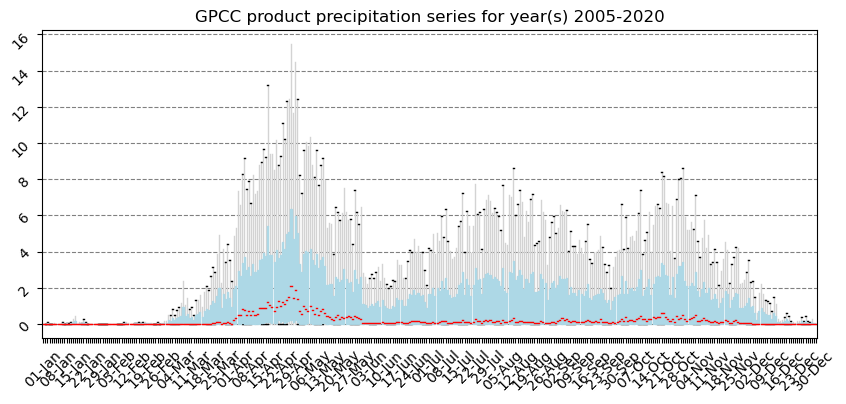

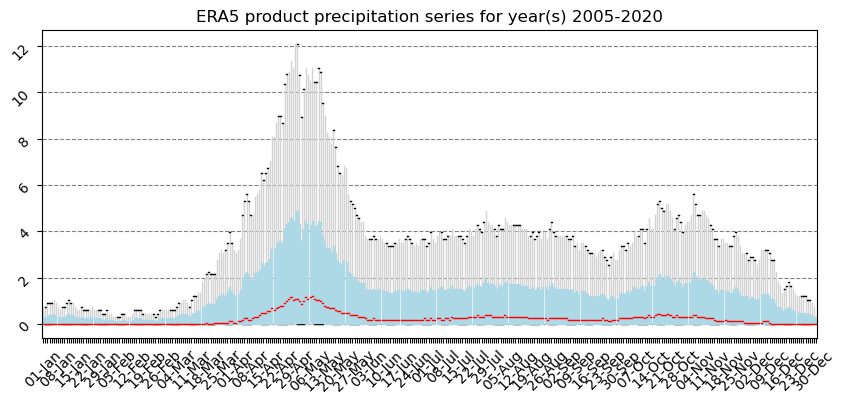

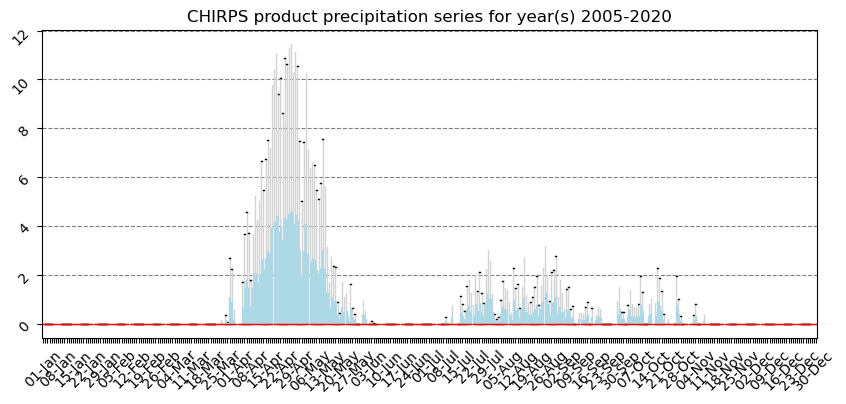

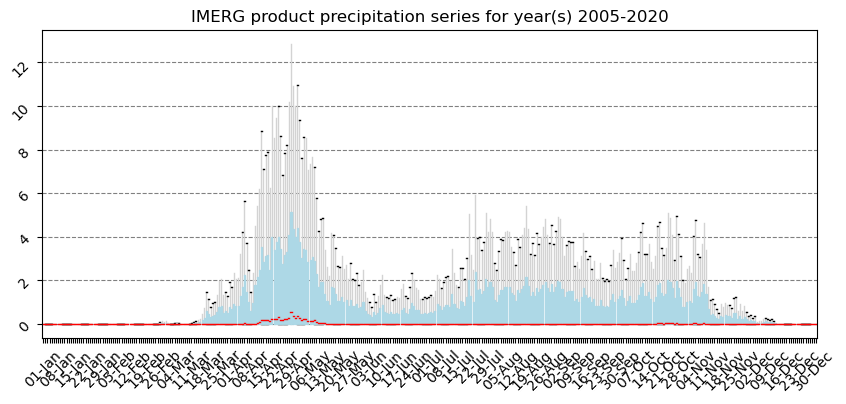

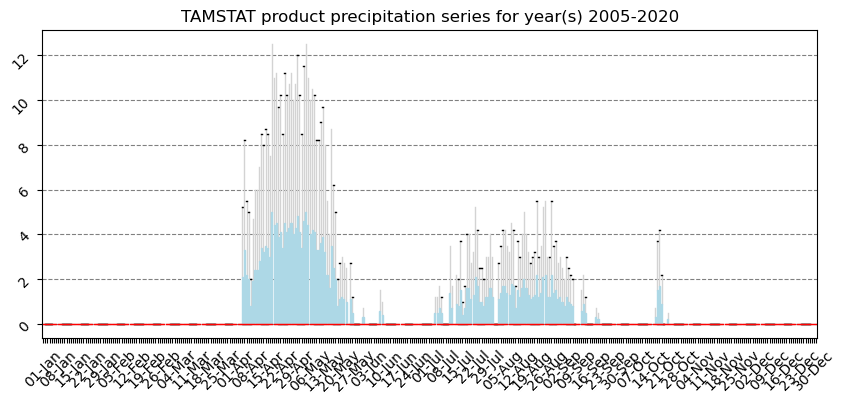

In [114]:
year = np.arange(2005, 2021).tolist()

for product_dir in config_directories:
    list_files = [f for f in os.listdir(product_dir) if (f.endswith(".nc")) and ("merged" in f)]
    ds = xr.open_dataset(os.path.join(product_dir, list_files[0]))
    variable = [var for var in ds.data_vars if var!= "spatial_ref"][0]
    name = list_files[0].split("_")[0]
    box_plot_year(ds, var=variable, year=year, title=f"{name.upper()} product precipitation series for year(s) {get_year(year)}", figsize=(10,4))

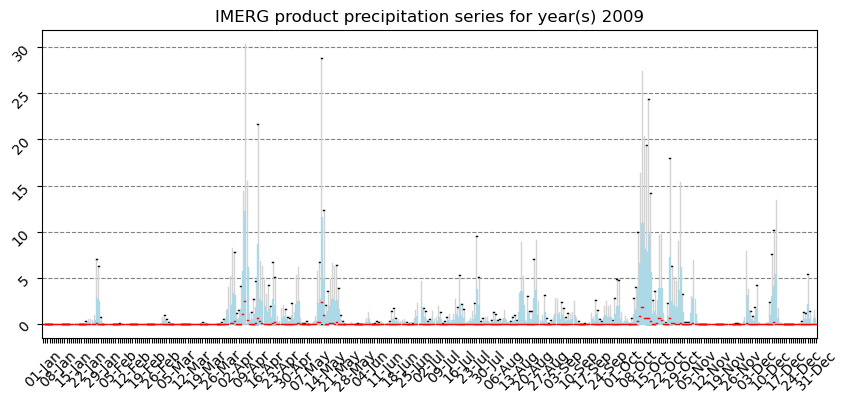

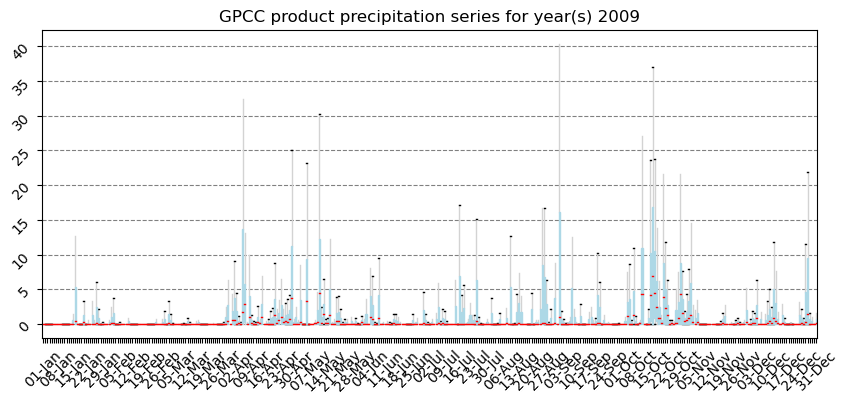

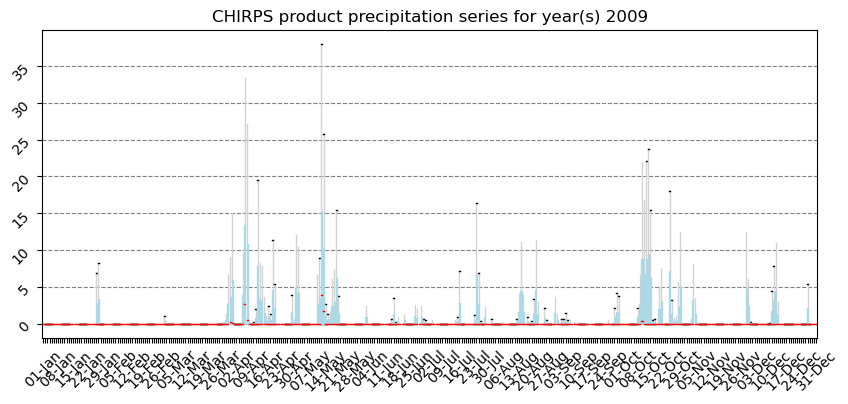

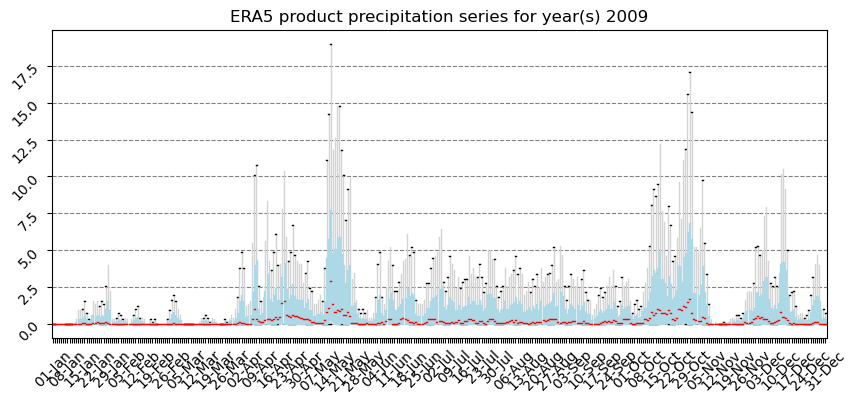

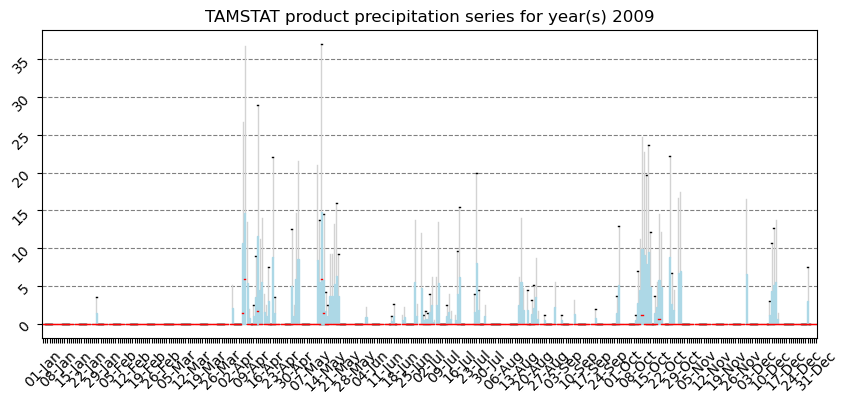

In [132]:
year = 2009
for product_dir in config_dir_precp:
    list_files = [f for f in os.listdir(product_dir) if (f.endswith(".nc")) and ("merged" in f)]
    ds = xr.open_dataset(os.path.join(product_dir, list_files[0]))
    subset_ds=ds.sel(time=ds.time.dt.year.isin(year))
    variable = [var for var in ds.data_vars if var!= "spatial_ref"][0]
    name = list_files[0].split("_")[0]
    box_plot_year(subset_ds, var=variable, year=year, title=f"{name.upper()} product precipitation series for year(s) {get_year(year)}", figsize=(10,4))

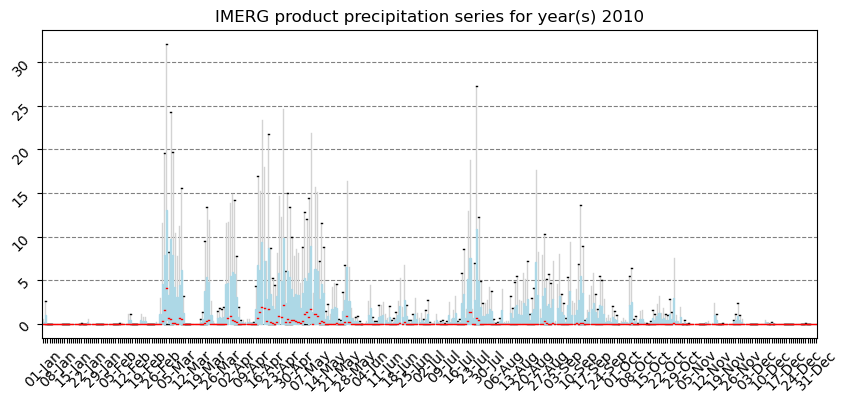

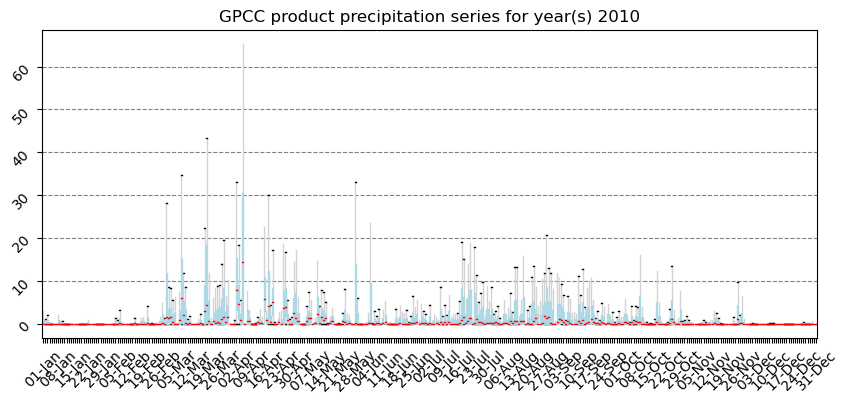

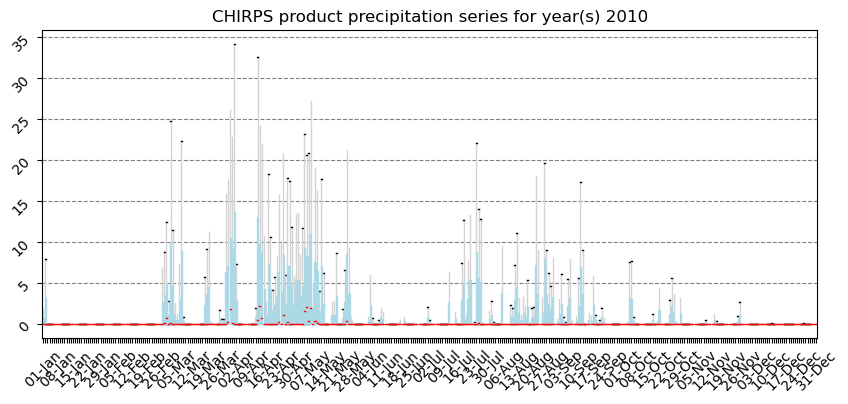

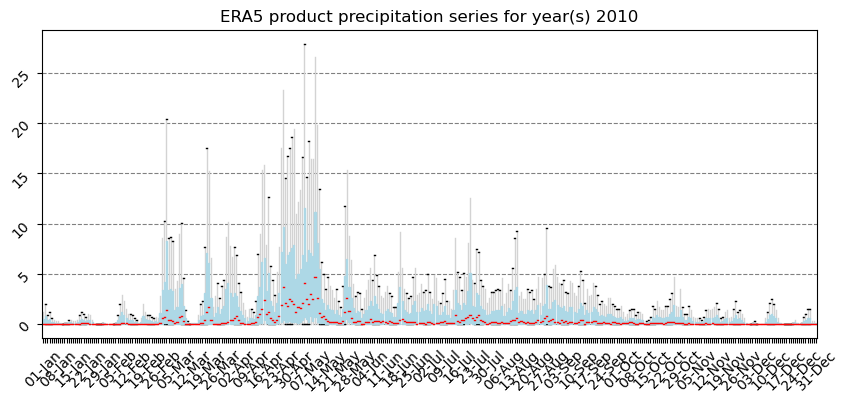

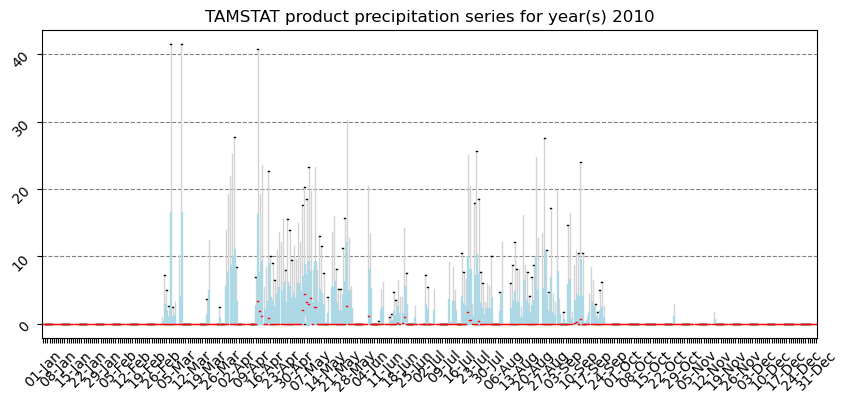

In [133]:
CONFIG_PATH = "../config.yaml"
from p_drought_indices.analysis.visualizations.viz_vci_spi import loop_soil
loop_soil(CONFIG_PATH)


In [12]:
import pandas as pd
from datetime import datetime
import time
from p_drought_indices.analysis.visualizations.viz_vci_spi import get_subplot_year, adjust_full_list, str_month

import xarray as xr
from p_drought_indices.functions.function_clns import load_config, prepare, subsetting_pipeline
import os
from p_drought_indices.functions.function_clns import crop_get_spi, crop_get_thresh
from p_drought_indices.analysis.visualizations.viz_vci_spi import box_plot_year, get_xarray_time_subset, multiple_spi_boxplots, get_subplot_year, subsetting_whole
import numpy as np
import warnings
from matplotlib import gridspec
import matplotlib.patches as mpatches
from matplotlib import gridspec
import calendar
import matplotlib.pyplot as plt
from p_drought_indices.analysis.visualizations.viz_vci_spi import plot_veg_event,plot_spi_event,  plot_spi_3_years, plot_precp_2009_event,plot_veg_2009_event, plot_spi_2009_event, plot_veg_3_years
from p_drought_indices.ancillary_vars.esa_landuse import get_level_colors, get_cover_dataset


warnings.filterwarnings('ignore')


CONFIG_PATH = "../config.yaml"
config = load_config(CONFIG_PATH)
ds_ndvi = xr.open_dataset(os.path.join(config['NDVI']['ndvi_path'], 'smoothed_ndvi_1.nc'))
vci = xr.open_dataset(os.path.join(config['NDVI']['ndvi_path'], 'vci_1D.nc'))
res_ds = xr.open_dataset(os.path.join(config['NDVI']['ndvi_path'], 'percentage_ndvi.nc'))

config_directories = [config['SPI']['IMERG']['path'], config['SPI']['GPCC']['path'], config['SPI']['CHIRPS']['path'], config['SPI']['ERA5']['path'], config['SPI']['MSWEP']['path'], config['SPI']['ERA5_land']['path'] ]
config_dir_precp = [config['PRECIP']['IMERG']['path'],config['PRECIP']['CHIRPS_05']['path'], config['PRECIP']['GPCC']['path'], config['PRECIP']['CHIRPS']['path'], config['PRECIP']['ERA5']['path'],  config['PRECIP']['TAMSTAT']['path'],config['PRECIP']['MSWEP']['path']]
            

prod = "ERA5"
late = 60
product_dir = [f for f in config_directories if prod in f][0]
list_files = [f for f in os.listdir(product_dir) if (f.endswith(".nc")) and ("merged" in f)]
precp_ds = xr.open_dataset(os.path.join(product_dir, list_files[0]))
variable = [var for var in precp_ds.data_vars if var!= "spatial_ref"][0]

spi_dir = [f for f in config_directories if prod in f][0]
var_target = f"spi_gamma_{late}"
files = [f for f in os.listdir(spi_dir) if var_target in f ]
spi_ds = xr.open_dataset(os.path.join(spi_dir, files[0]))

In [59]:
product_dir = [f for f in config_dir_precp if "ERA5" in f ][0]
list_files = [f for f in os.listdir(product_dir) if (f.endswith(".nc")) and ("merged" in f) and "land" not in f]
era_ds = subsetting_pipeline(CONFIG_PATH, xr.open_dataset(os.path.join(product_dir, list_files[0])))
era5_var = [var for var in era_ds.data_vars if var!= "spatial_ref"][0]

product_dir = [f for f in config_directories if "ERA5_land" in f][0]
list_files = [f for f in os.listdir(product_dir) if (f.endswith(".nc")) and ("merged" in f)]
precp_ds = xr.open_dataset(os.path.join(product_dir, list_files[0]))
variable = [var for var in precp_ds.data_vars if var!= "spatial_ref"][0]


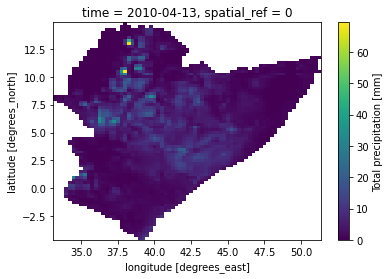

In [68]:
date = "2010-04-13"

era_ds[era5_var].sel(time=date).plot()

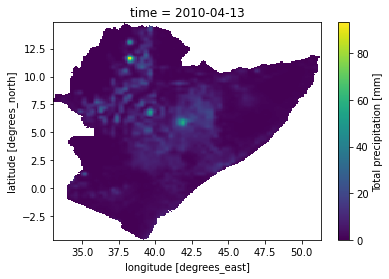

In [69]:
precp_ds["tp"].sel(time=date).plot()

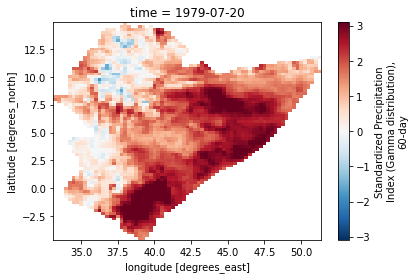

In [13]:
spi_ds.isel(time=200)[var_target].plot()

In [15]:
import geopandas as gpd

shapefile_path = config["DEFAULT"]["shapefiles"]
gdf = gpd.read_file(os.path.join(shapefile_path, "Ethiopia_AdminBoundaries"))
from p_drought_indices.ancillary_vars.esa_landuse import get_level_colors
ds_cover = xr.open_dataset(os.path.join(config["DEFAULT"]["data"], "esa_cover.nc"))
cmap, levels, values_land_cover = get_level_colors(ds_cover, level1=False)

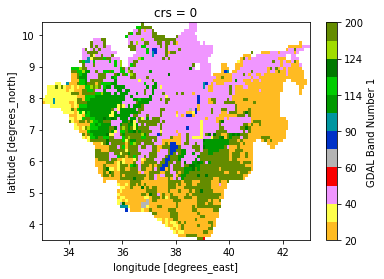

In [75]:
sub_cover = subsetting_pipeline(CONFIG_PATH, ds_cover, countries=None, regions=["Oromia","SNNPR","Gambela"])["Band1"]
sub_cover.plot(levels=levels, colors=cmap)

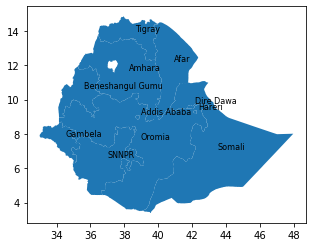

In [76]:
# Plot the GeoDataFrame
ax = gdf.plot(figsize=(5, 5))

# Add labels to each region
for idx, row in gdf.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(text=row['REGIONNAME'], xy=(centroid.x, centroid.y), xytext=(3, 3),
                textcoords='offset points', fontsize=8, color='black')

# Show the plot
plt.show()

Plotting year 2017 for Addis Ababa
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


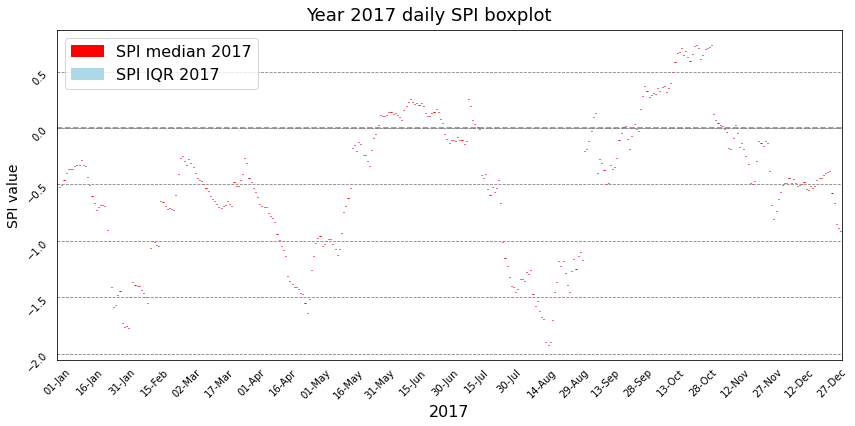

Plotting year 2017 for Tigray
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


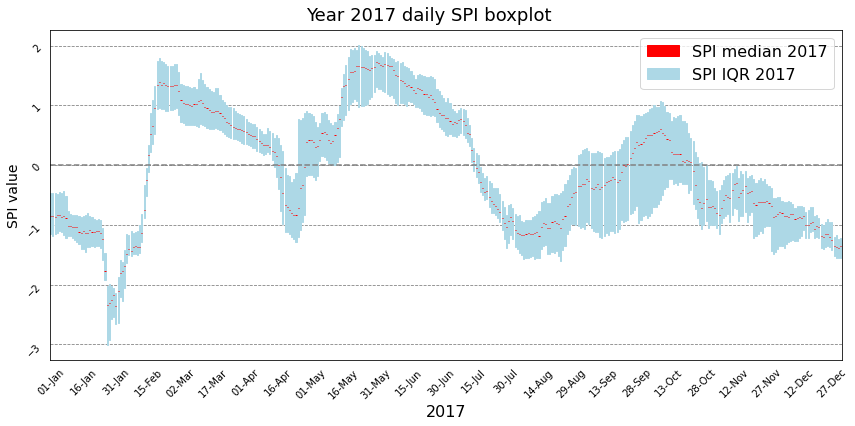

Plotting year 2017 for Somali
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


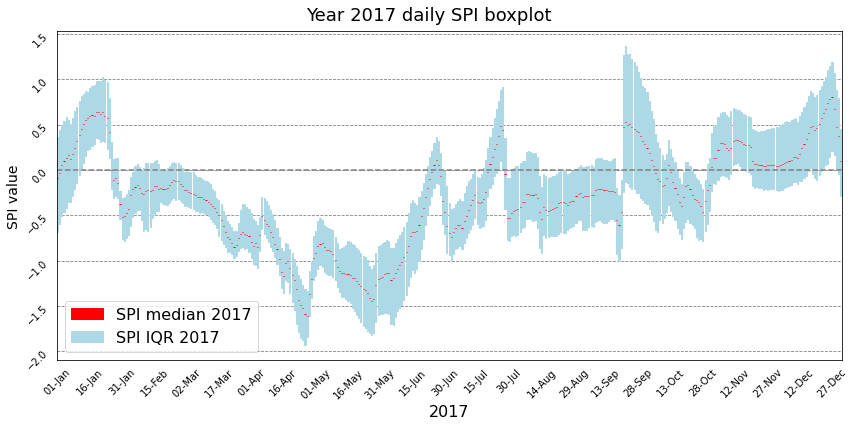

Plotting year 2017 for Dire Dawa
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


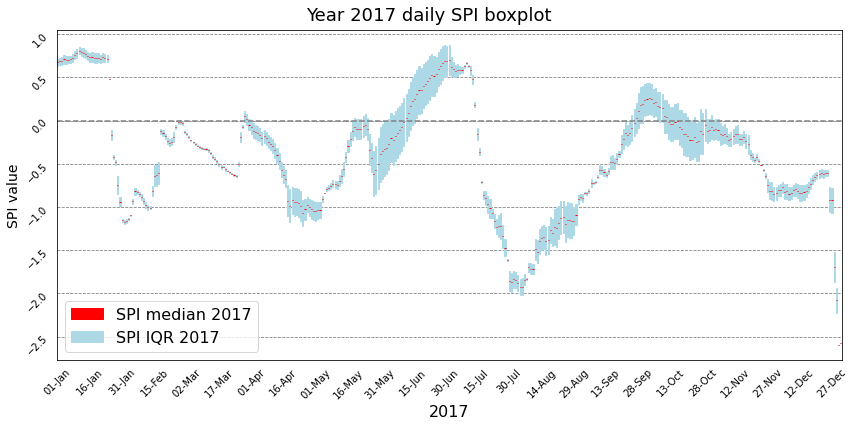

Plotting year 2017 for Hareri
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


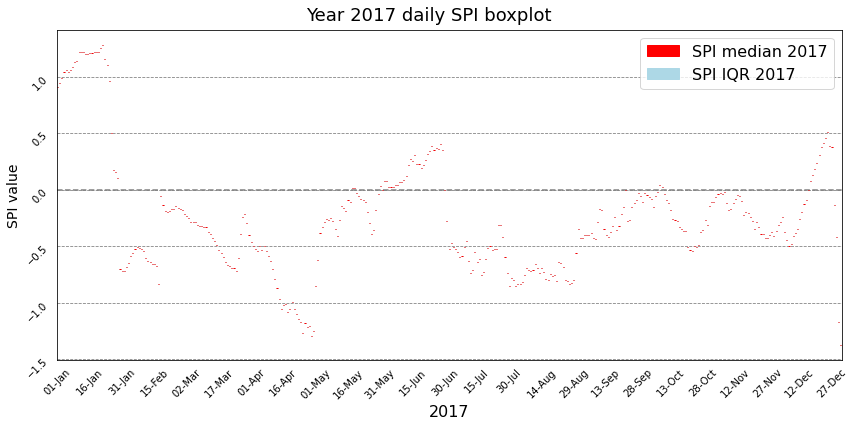

Plotting year 2017 for SNNPR
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


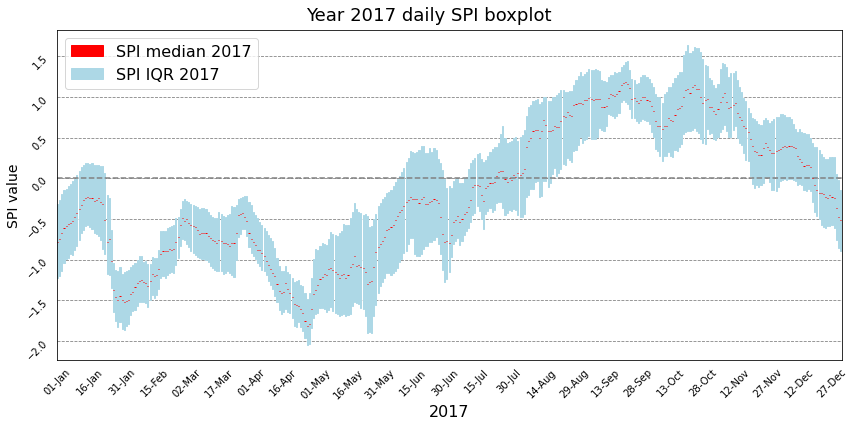

Plotting year 2017 for Gambela
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


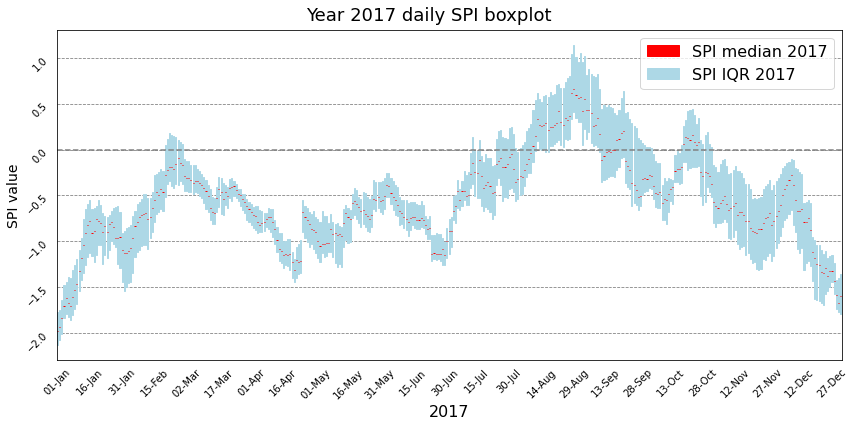

Plotting year 2017 for Beneshangul Gumu
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


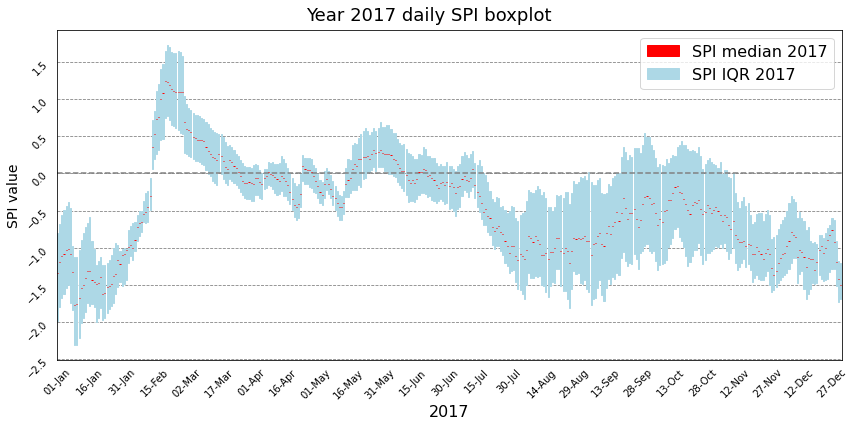

Plotting year 2017 for Amhara
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


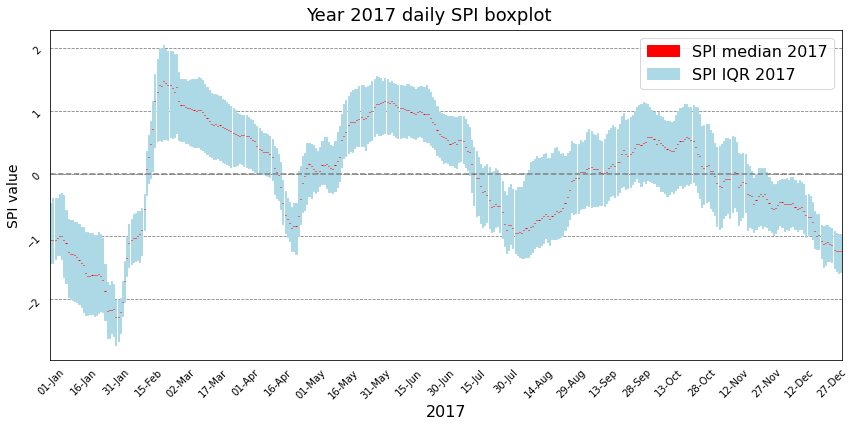

Plotting year 2017 for Afar
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


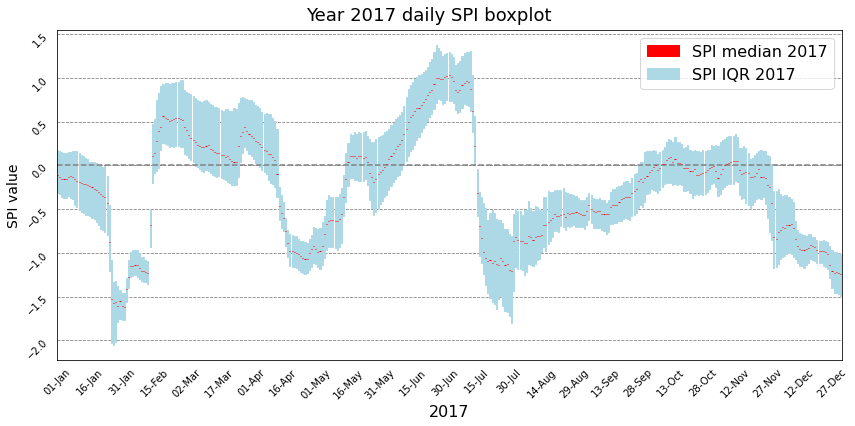

Plotting year 2017 for Oromia
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


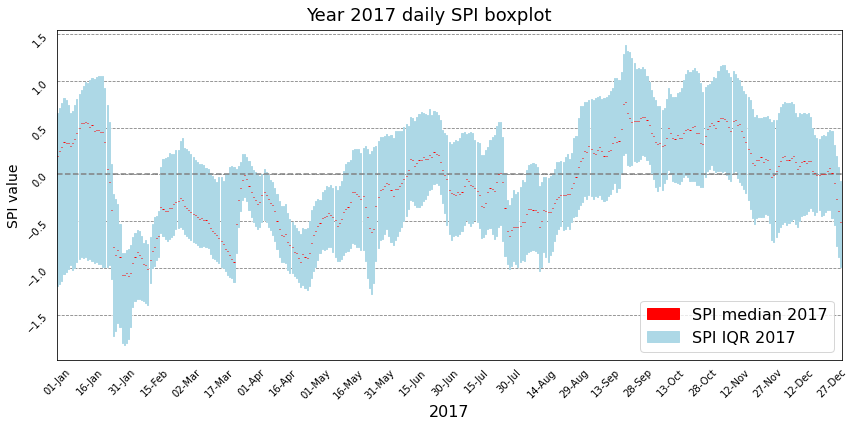

In [30]:
for region in gdf["REGIONNAME"].tolist():
    ds_new = subsetting_pipeline(CONFIG_PATH, spi_ds, countries=None, regions = [region])
    months = [i for i in np.arange(1,13)]
    year = 2017
    print(f"Plotting year {year} for {region}")
    plot_spi_event(ds_new, year=year, months=months, variable=var_target)

Plotting year 2017 for Addis Ababa
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


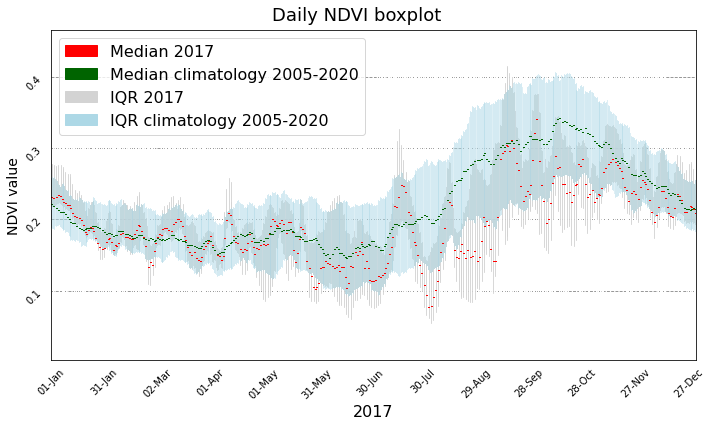

Plotting year 2017 for Tigray
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


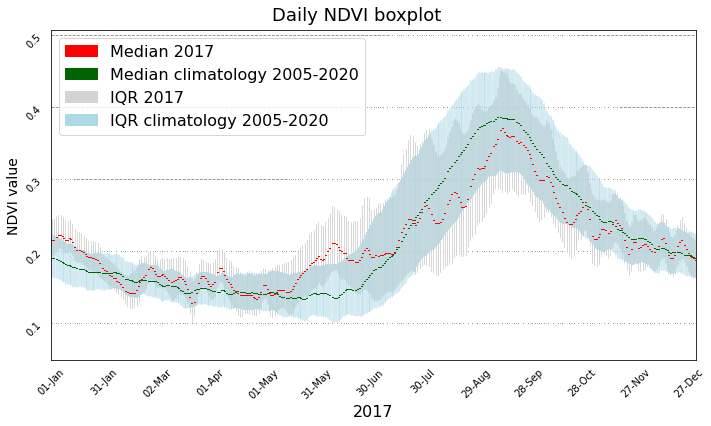

Plotting year 2017 for Somali
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


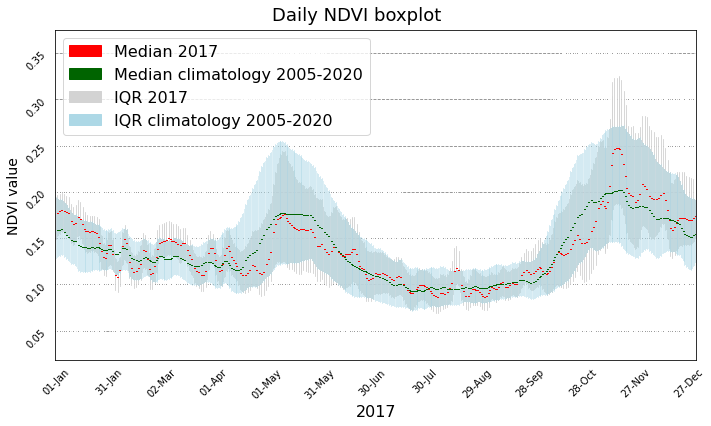

Plotting year 2017 for Dire Dawa
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


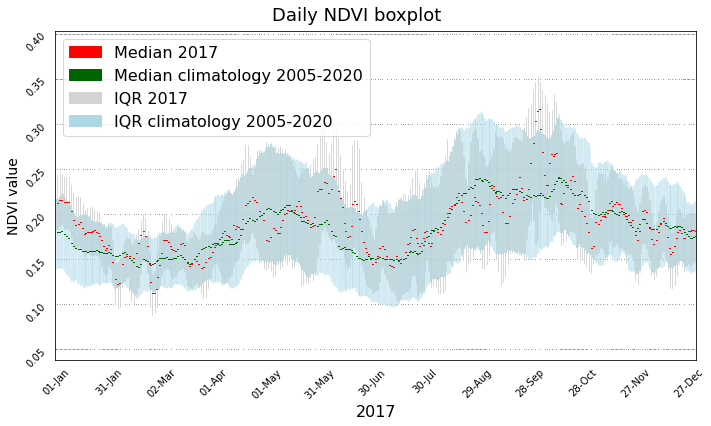

Plotting year 2017 for Hareri
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


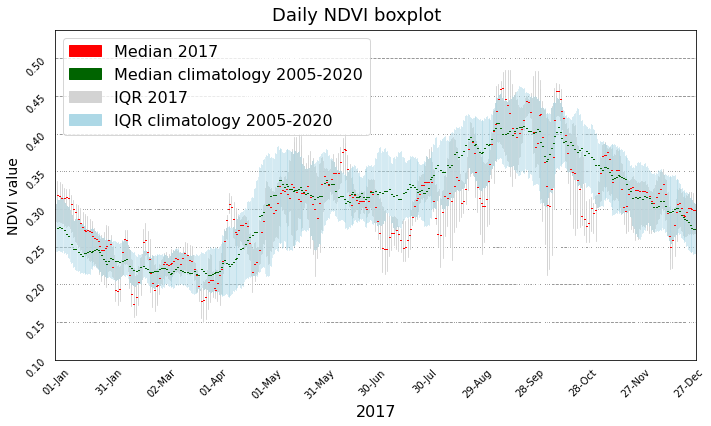

Plotting year 2017 for SNNPR
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


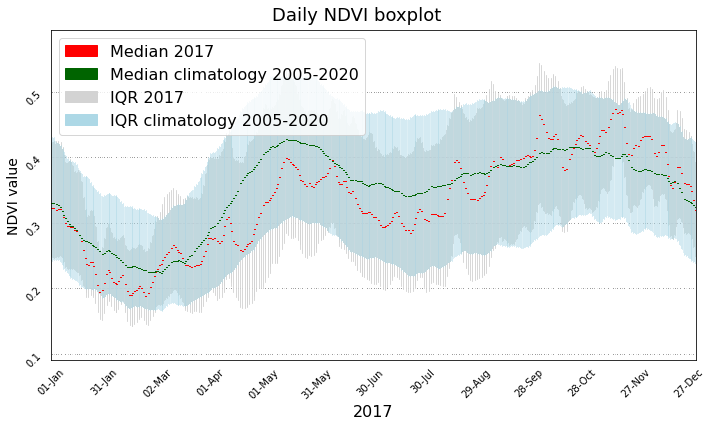

Plotting year 2017 for Gambela
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


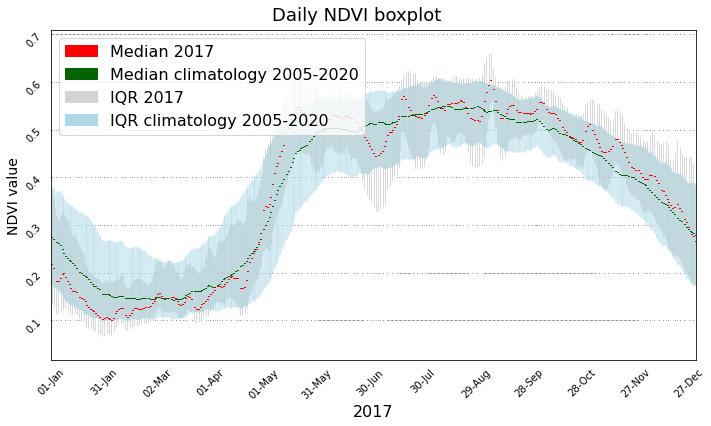

Plotting year 2017 for Beneshangul Gumu
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


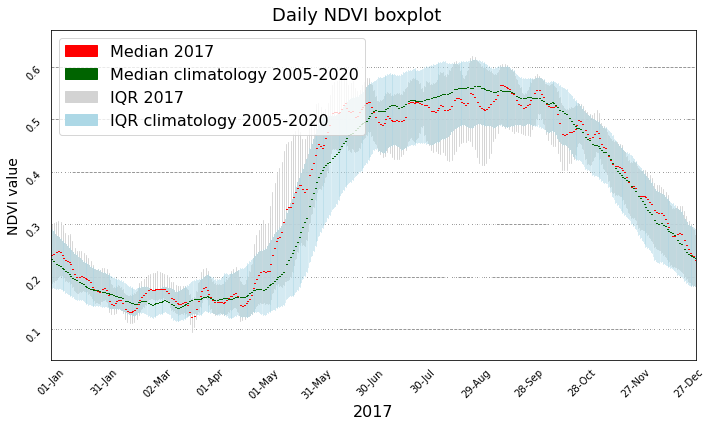

Plotting year 2017 for Amhara
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


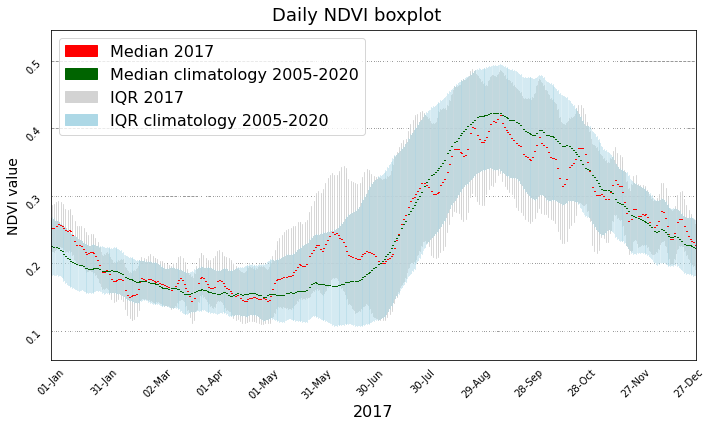

Plotting year 2017 for Afar
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


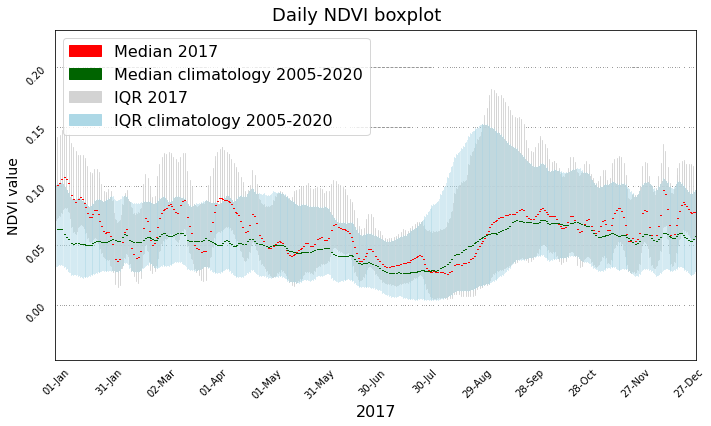

Plotting year 2017 for Oromia
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
For year 2017 obtaining only months 1 to 12 for boxplot


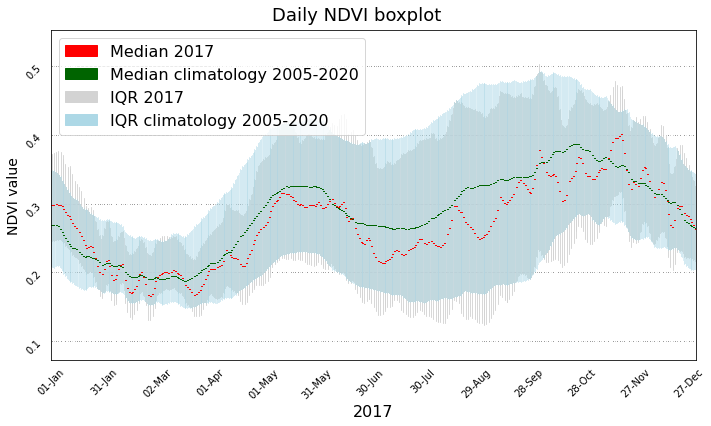

In [12]:
for region in gdf["REGIONNAME"].tolist():
    ds_new = subsetting_pipeline(CONFIG_PATH, ds_ndvi, countries=None, regions = [region])
    months = [i for i in np.arange(1,13)]
    year = 2017
    print(f"Plotting year {year} for {region}")
    plot_veg_event(ds_new, year=year, months=months)

days are 366
Calculating the full year for boxplot
The days are 366
Plotting from year 2014 to year 2016 for Addis Ababa
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 366
Calculating the full year for boxplot
The days are 366


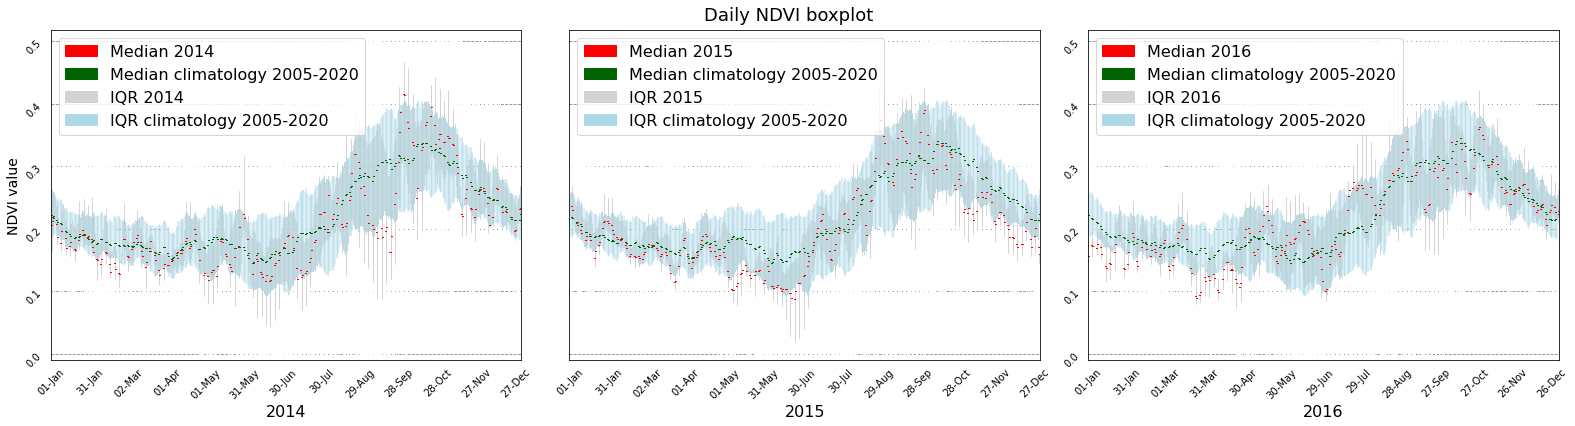

Plotting from year 2017 to year 2019 for Addis Ababa
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


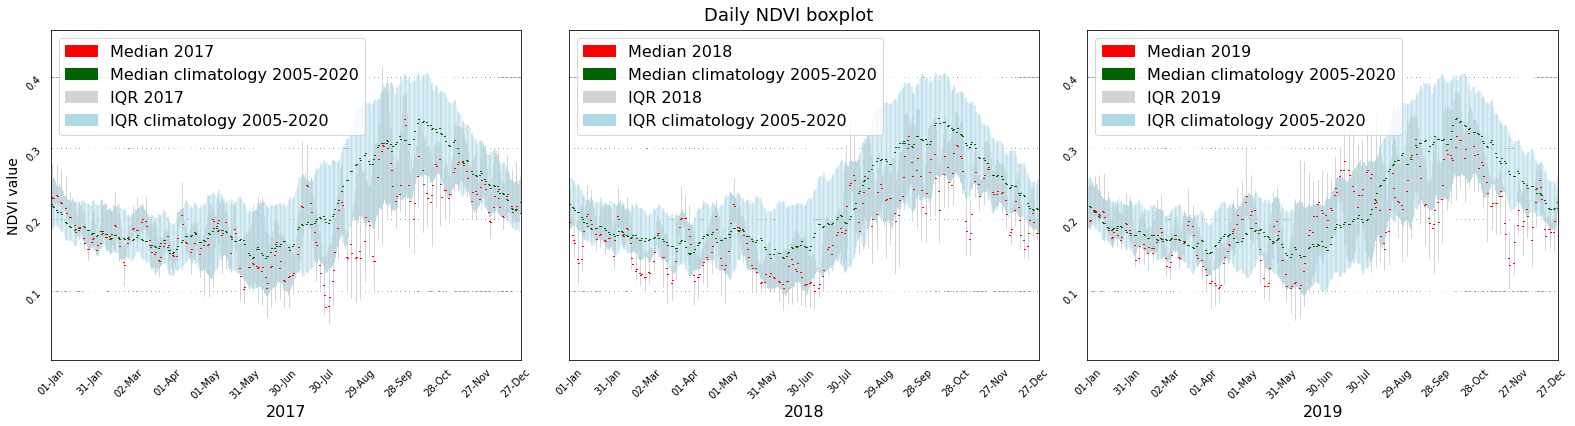

days are 366
Calculating the full year for boxplot
The days are 366
Plotting from year 2014 to year 2016 for Tigray
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 366
Calculating the full year for boxplot
The days are 366


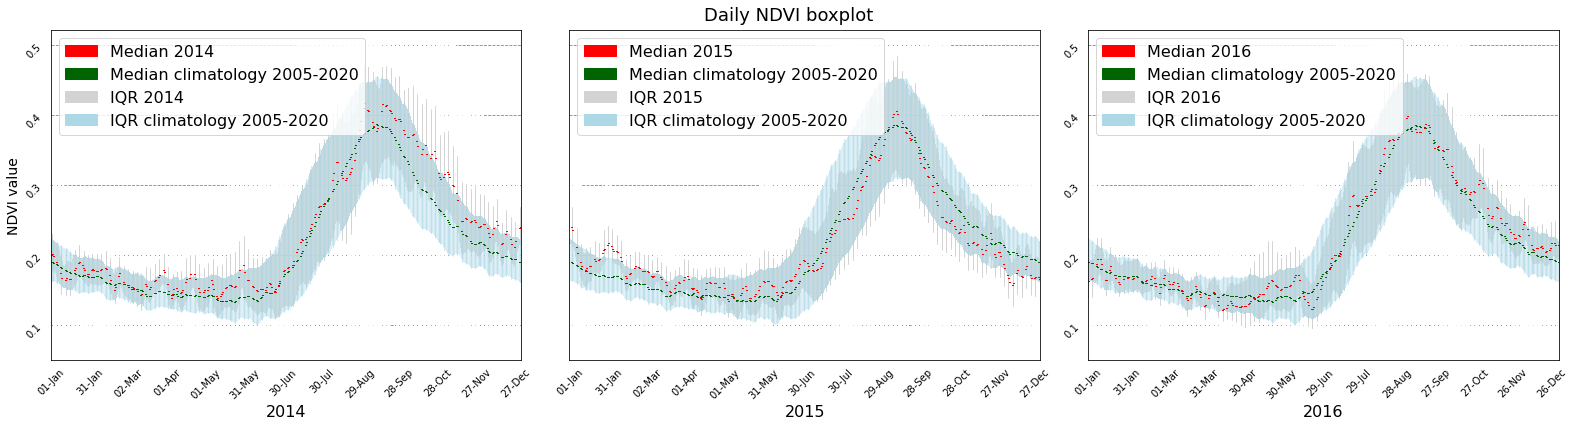

Plotting from year 2017 to year 2019 for Tigray
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


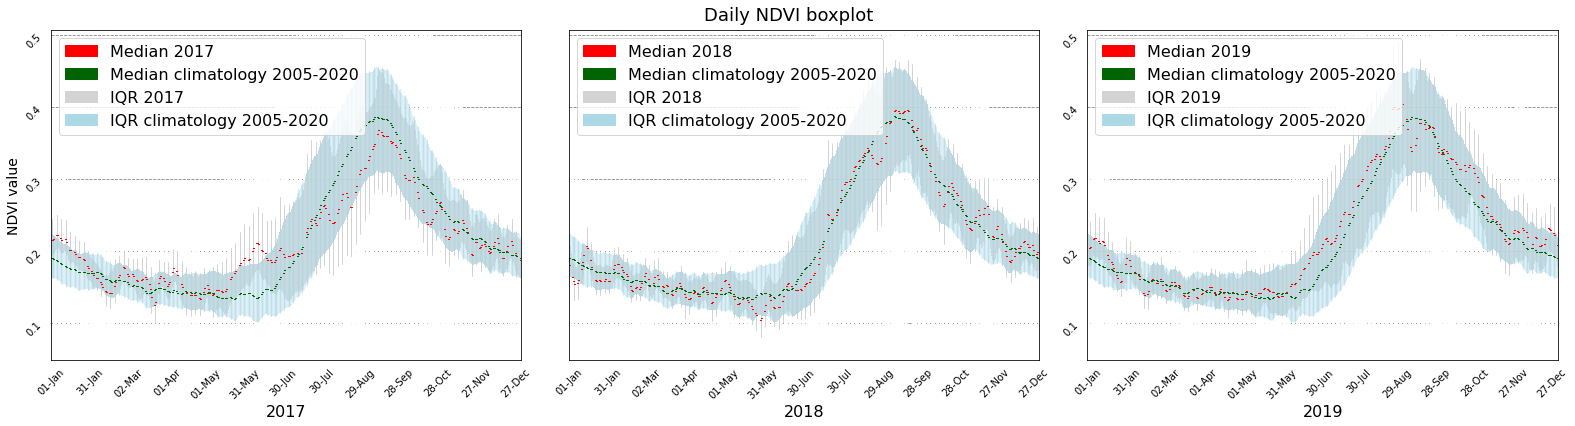

days are 366
Calculating the full year for boxplot
The days are 366
Plotting from year 2014 to year 2016 for Somali
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 366
Calculating the full year for boxplot
The days are 366


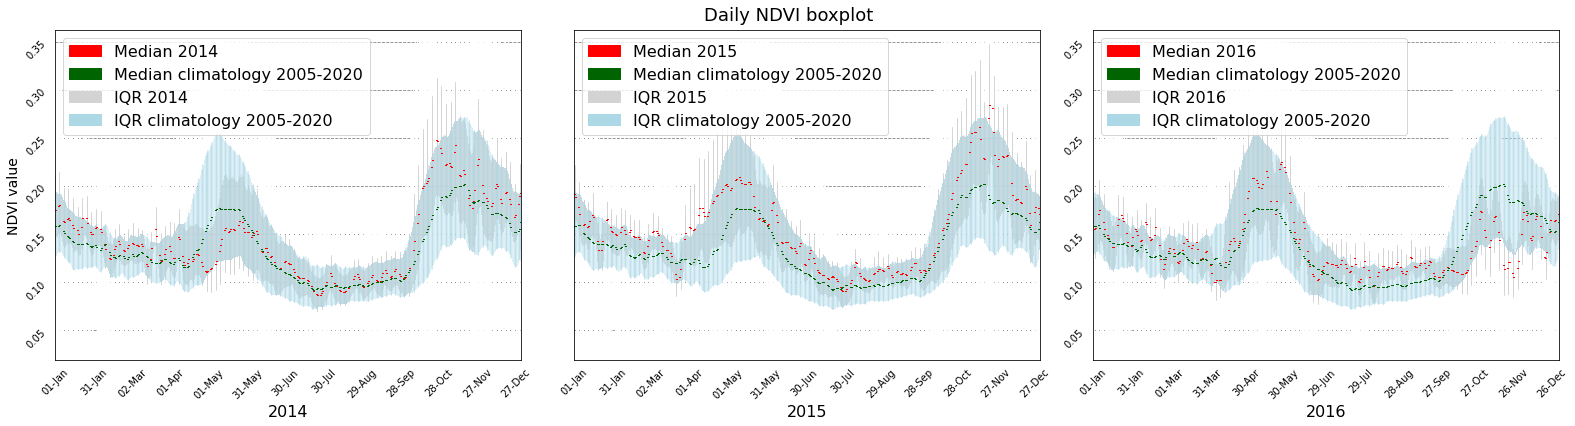

Plotting from year 2017 to year 2019 for Somali
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


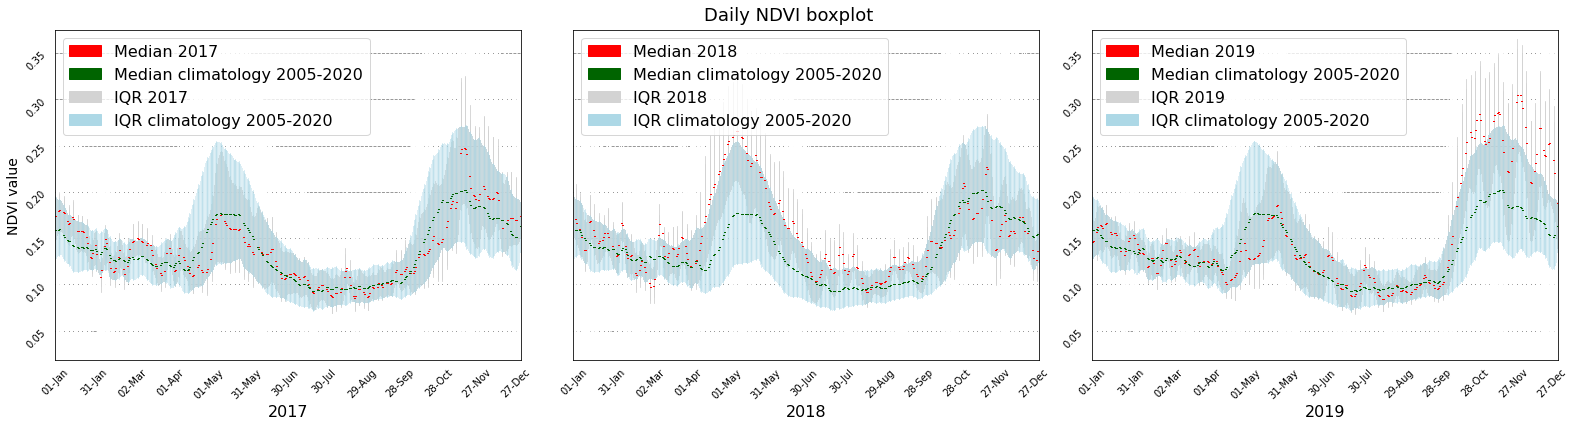

days are 366
Calculating the full year for boxplot
The days are 366
Plotting from year 2014 to year 2016 for Dire Dawa
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 366
Calculating the full year for boxplot
The days are 366


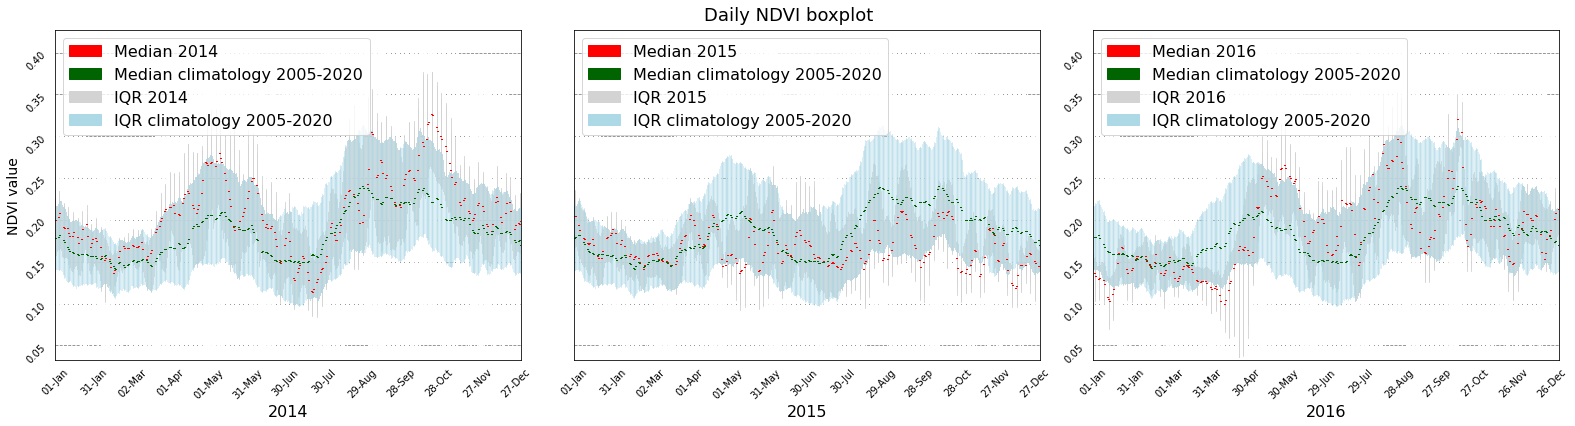

Plotting from year 2017 to year 2019 for Dire Dawa
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


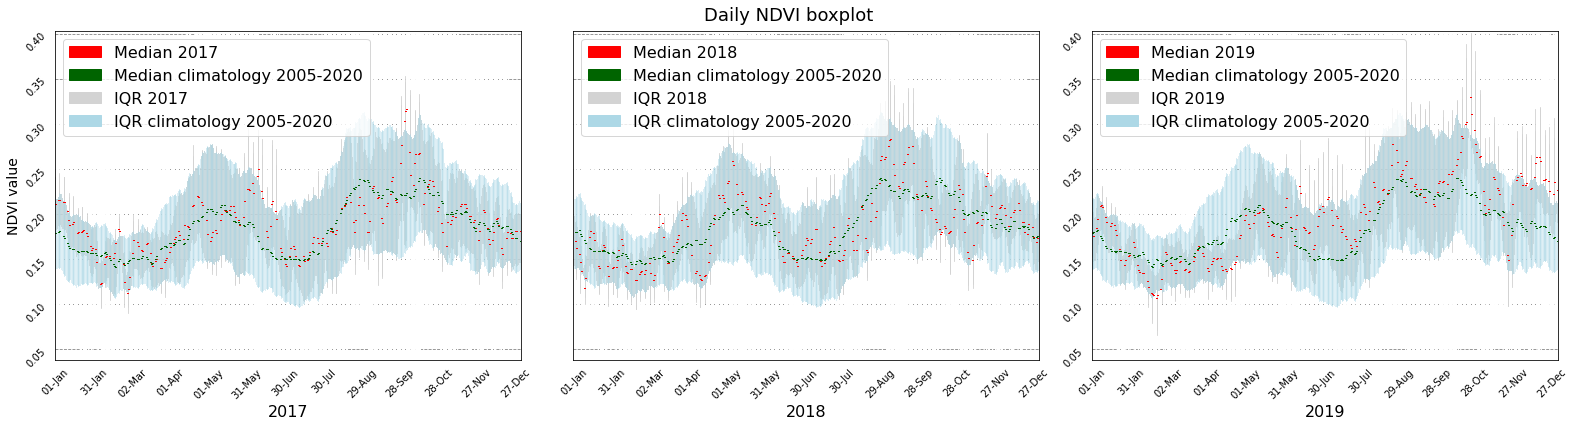

days are 366
Calculating the full year for boxplot
The days are 366
Plotting from year 2014 to year 2016 for Hareri
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 366
Calculating the full year for boxplot
The days are 366


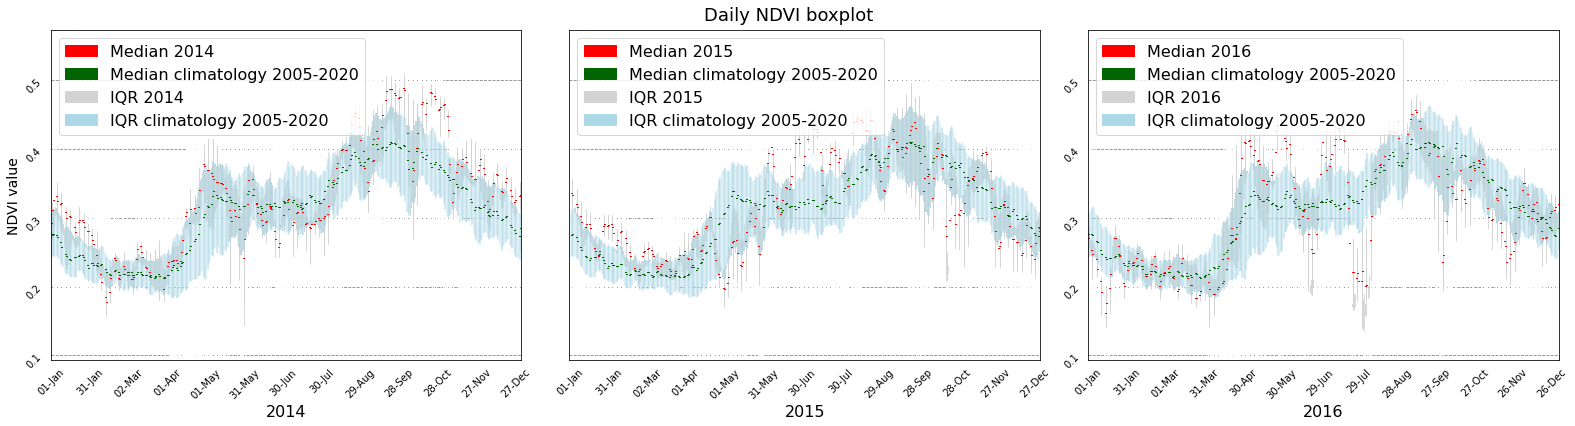

Plotting from year 2017 to year 2019 for Hareri
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


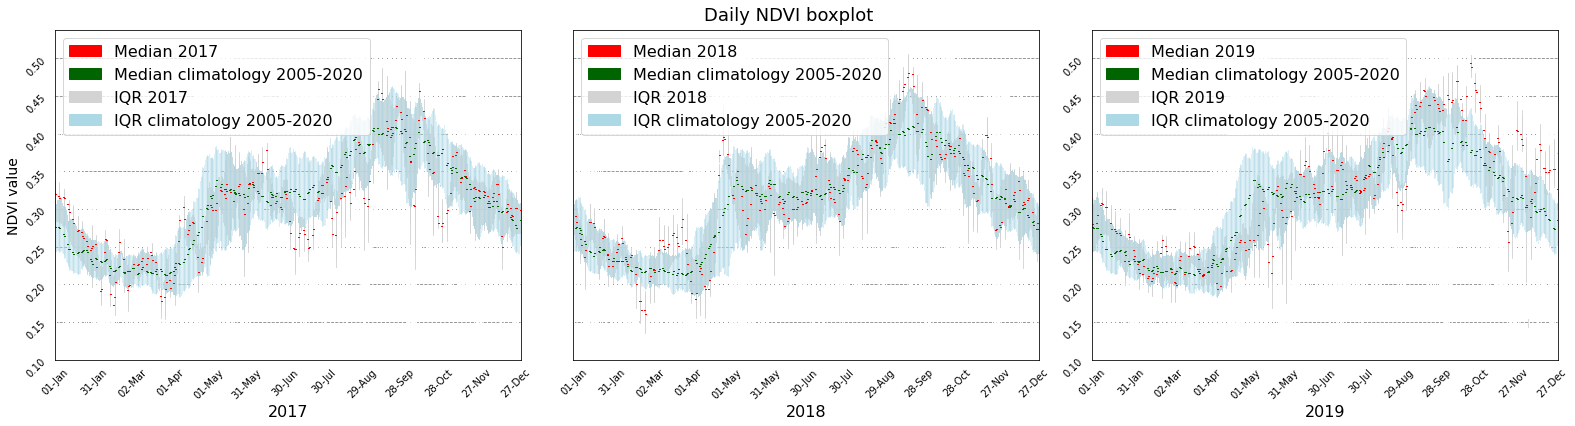

days are 366
Calculating the full year for boxplot
The days are 366
Plotting from year 2014 to year 2016 for SNNPR
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 366
Calculating the full year for boxplot
The days are 366


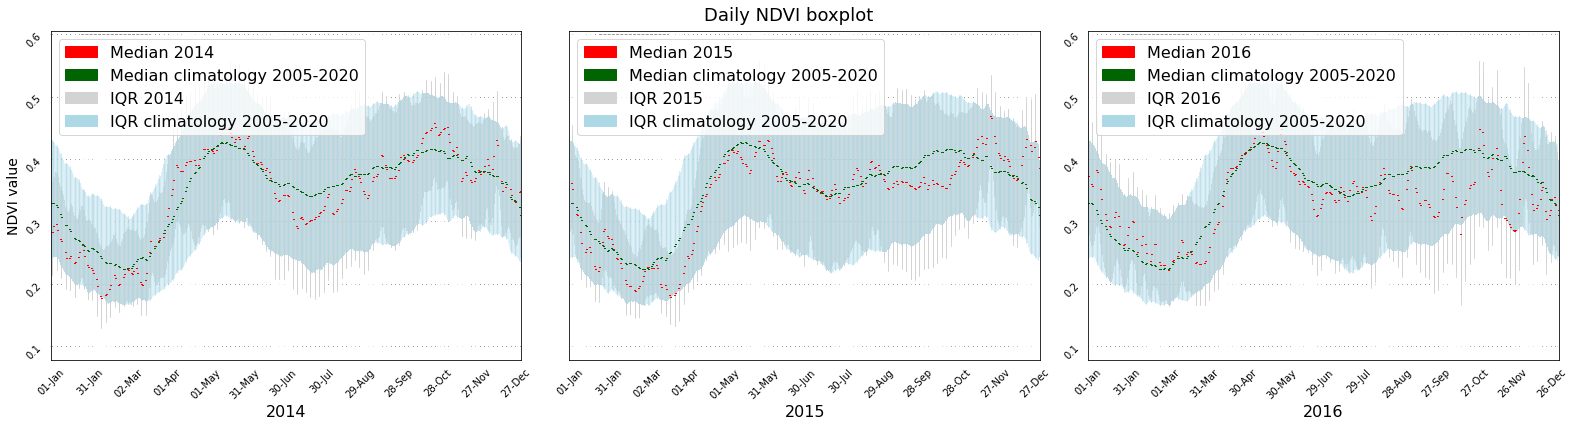

Plotting from year 2017 to year 2019 for SNNPR
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


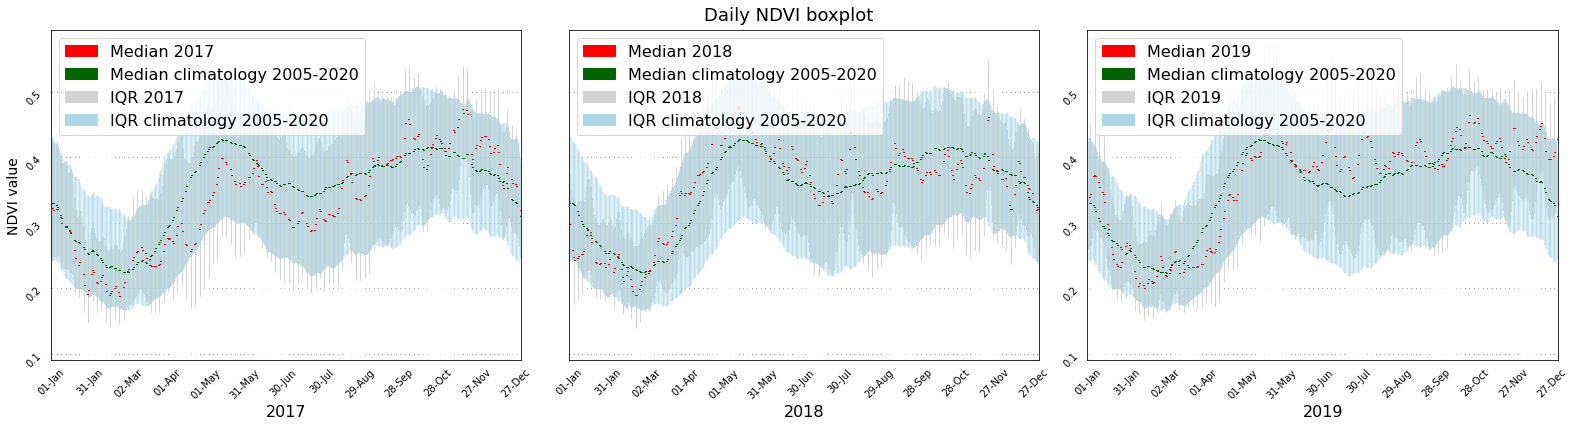

days are 366
Calculating the full year for boxplot
The days are 366
Plotting from year 2014 to year 2016 for Gambela
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 366
Calculating the full year for boxplot
The days are 366


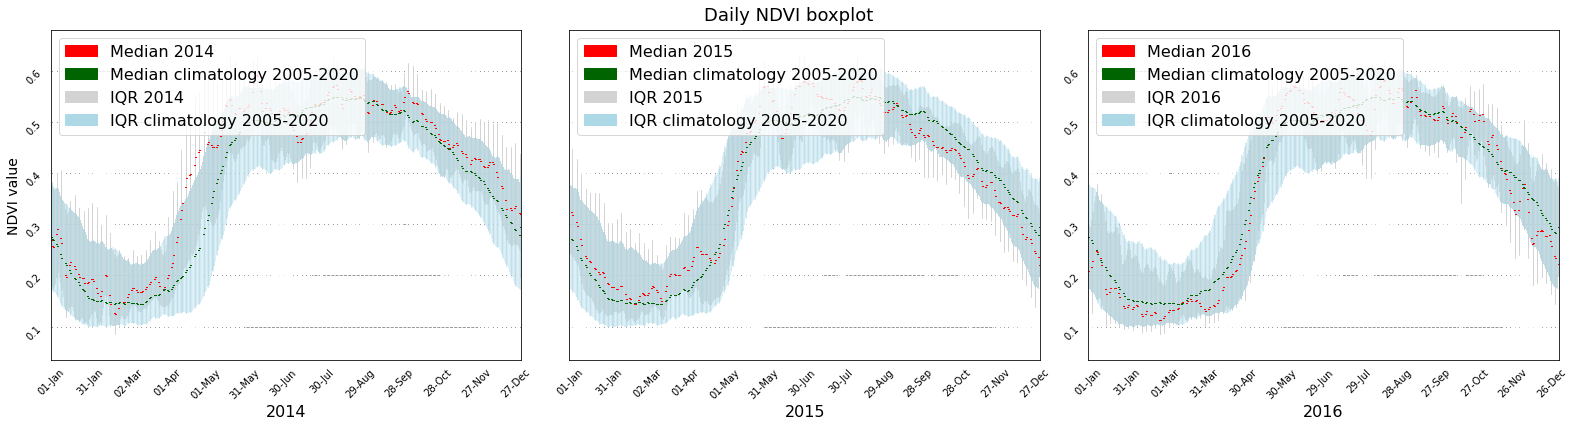

Plotting from year 2017 to year 2019 for Gambela
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


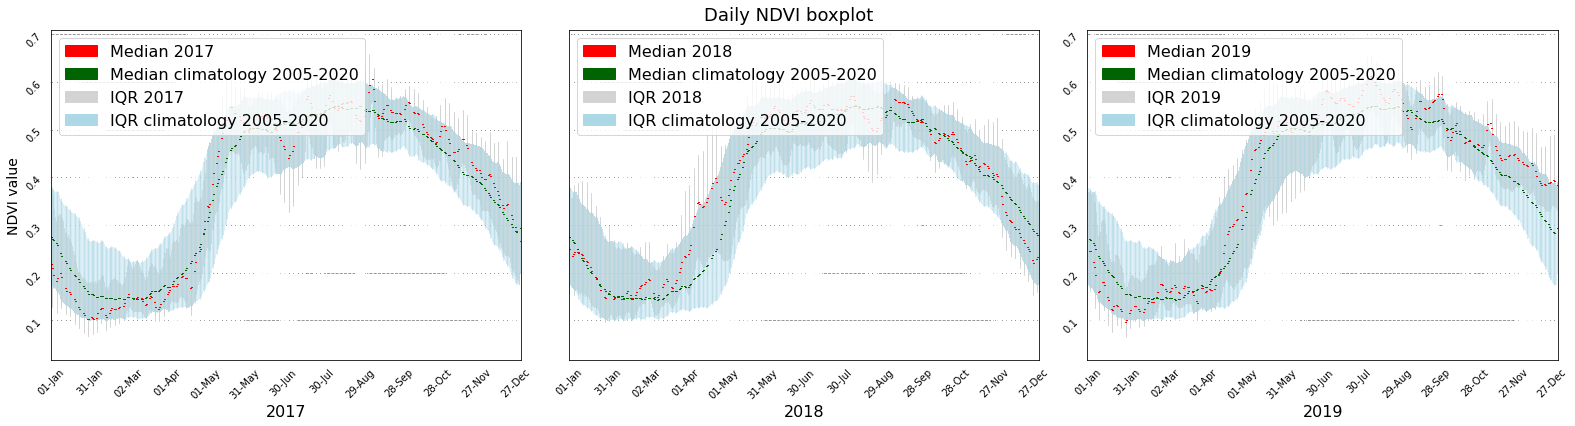

days are 366
Calculating the full year for boxplot
The days are 366
Plotting from year 2014 to year 2016 for Beneshangul Gumu
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 366
Calculating the full year for boxplot
The days are 366


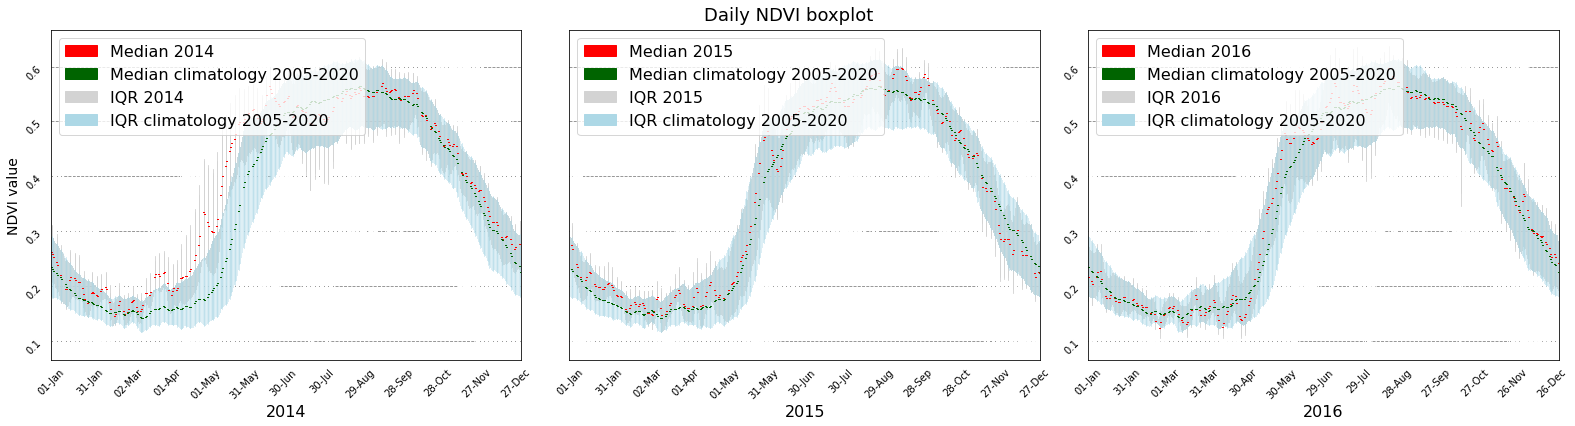

Plotting from year 2017 to year 2019 for Beneshangul Gumu
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


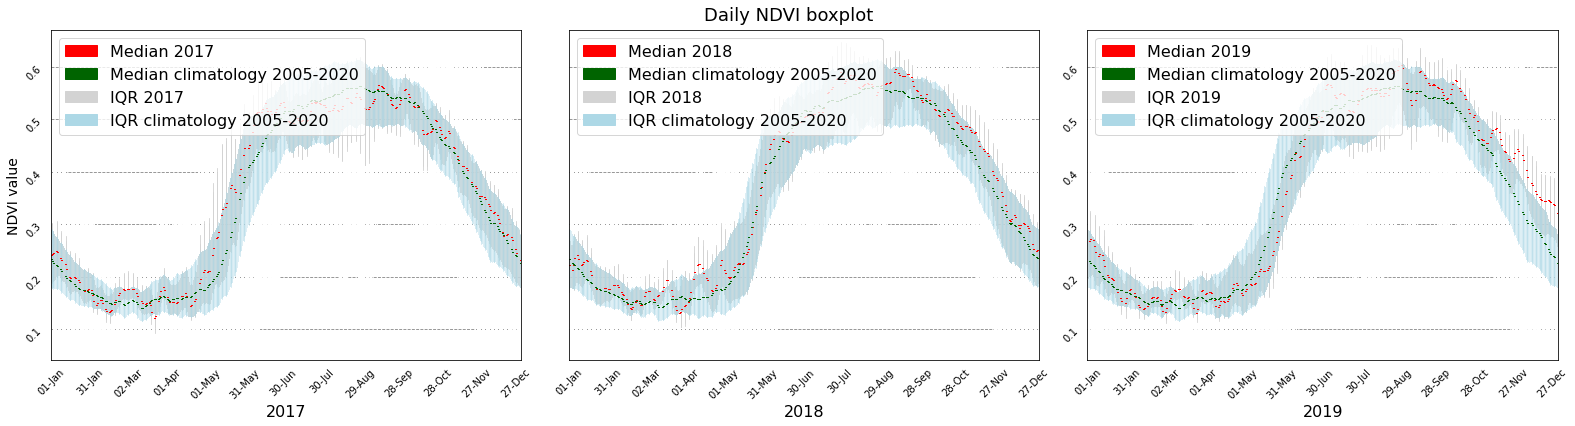

days are 366
Calculating the full year for boxplot
The days are 366
Plotting from year 2014 to year 2016 for Amhara
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 366
Calculating the full year for boxplot
The days are 366


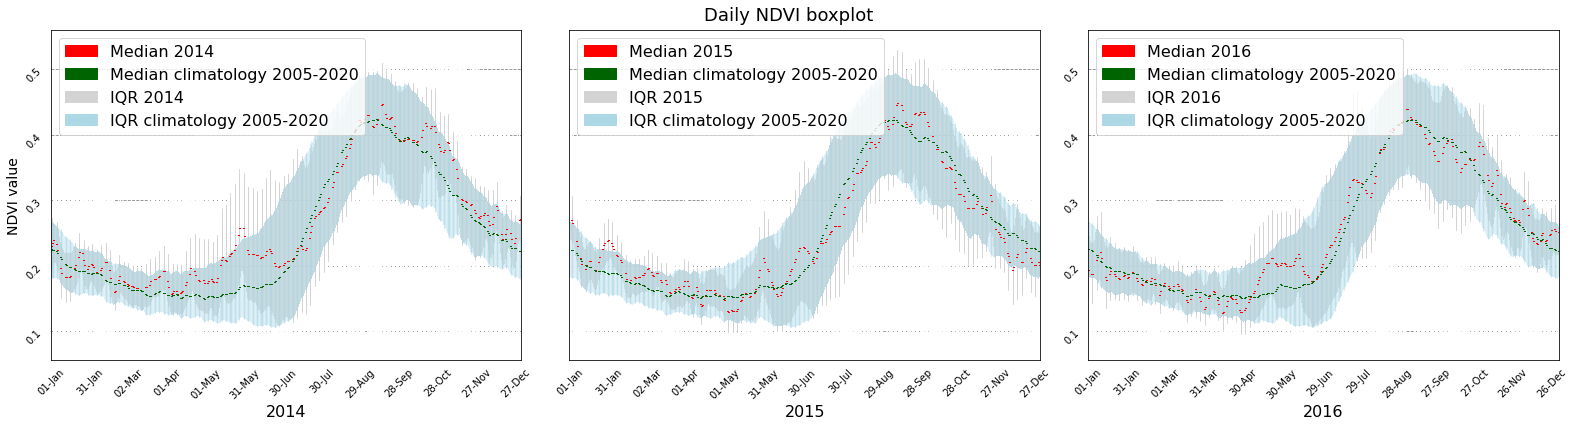

Plotting from year 2017 to year 2019 for Amhara
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


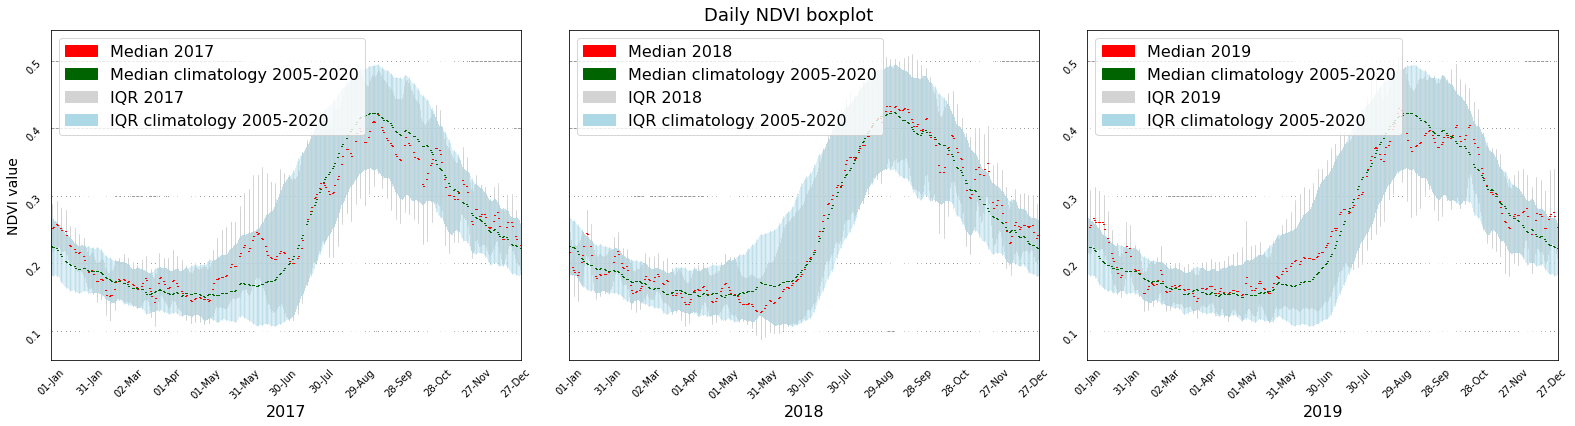

days are 366
Calculating the full year for boxplot
The days are 366
Plotting from year 2014 to year 2016 for Afar
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 366
Calculating the full year for boxplot
The days are 366


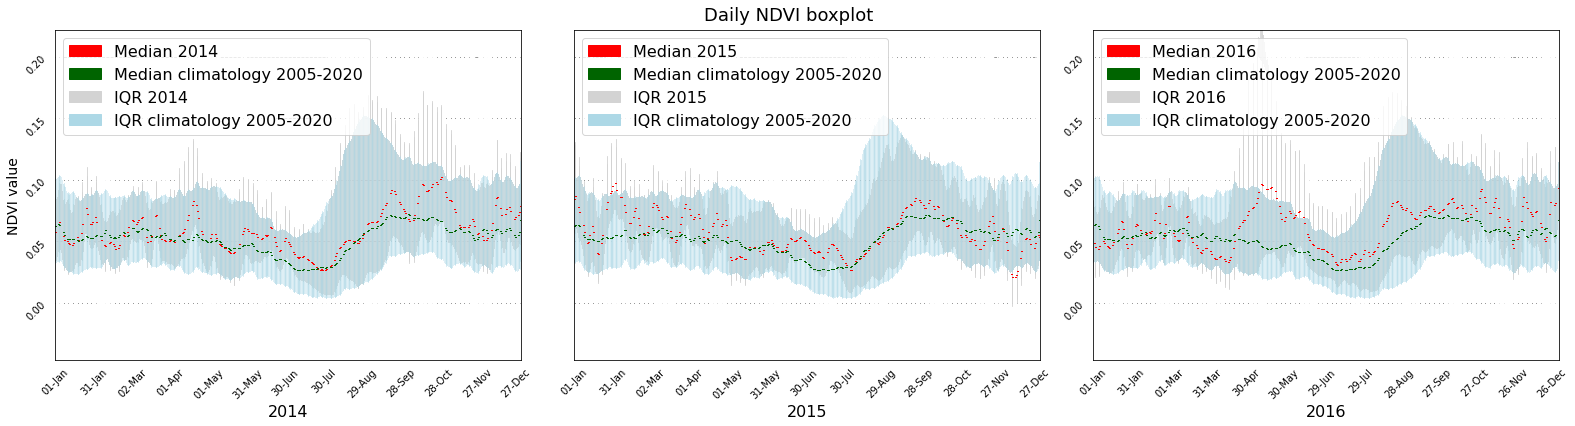

Plotting from year 2017 to year 2019 for Afar
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


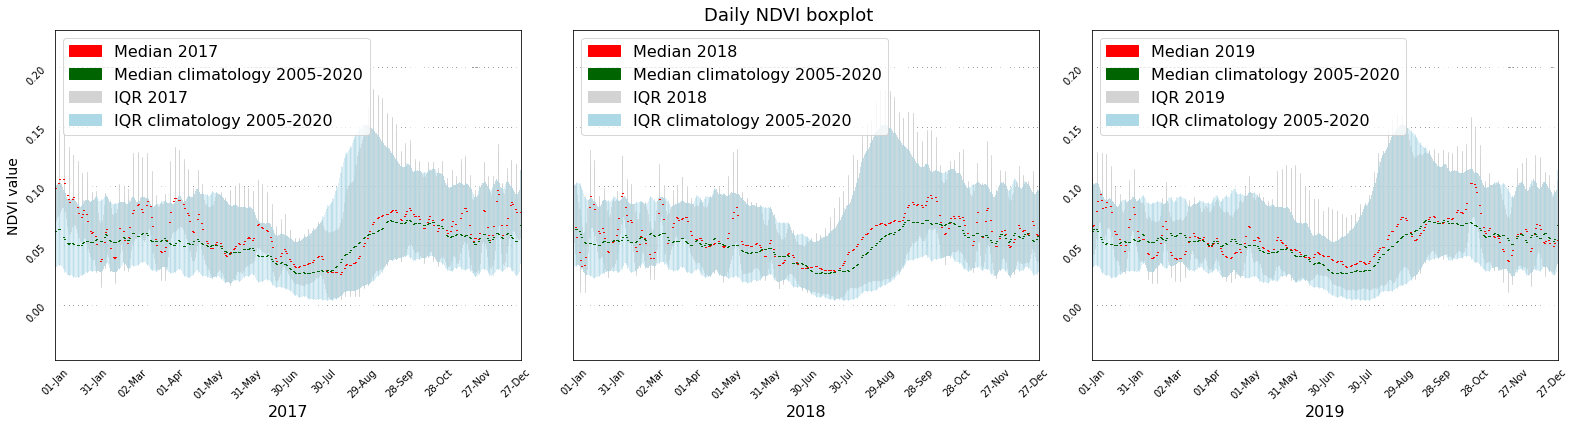

days are 366
Calculating the full year for boxplot
The days are 366
Plotting from year 2014 to year 2016 for Oromia
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 366
Calculating the full year for boxplot
The days are 366


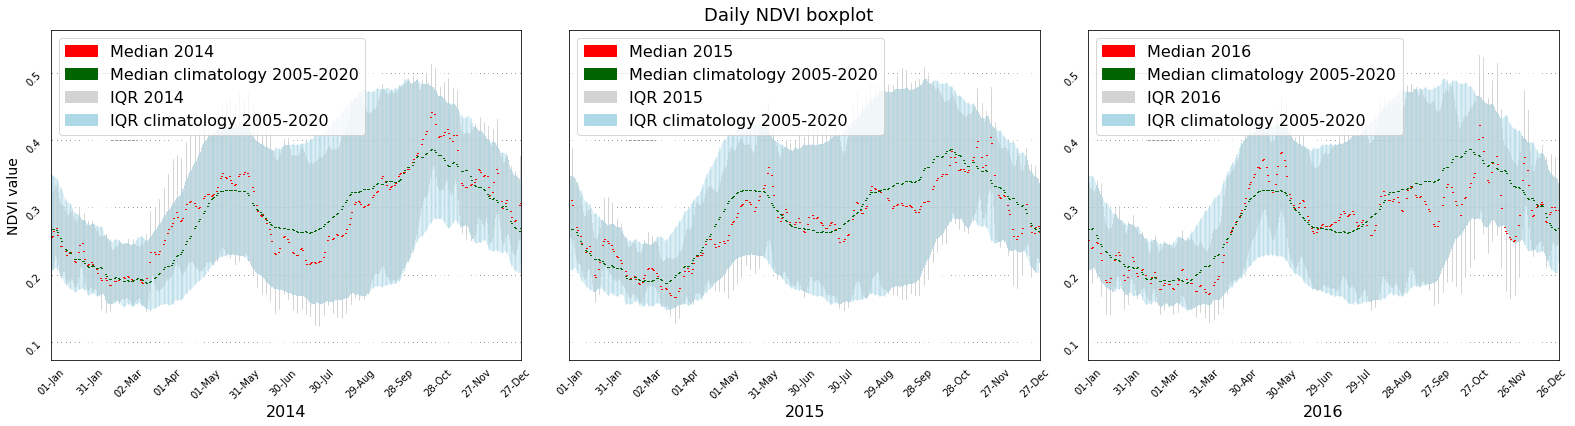

Plotting from year 2017 to year 2019 for Oromia
days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


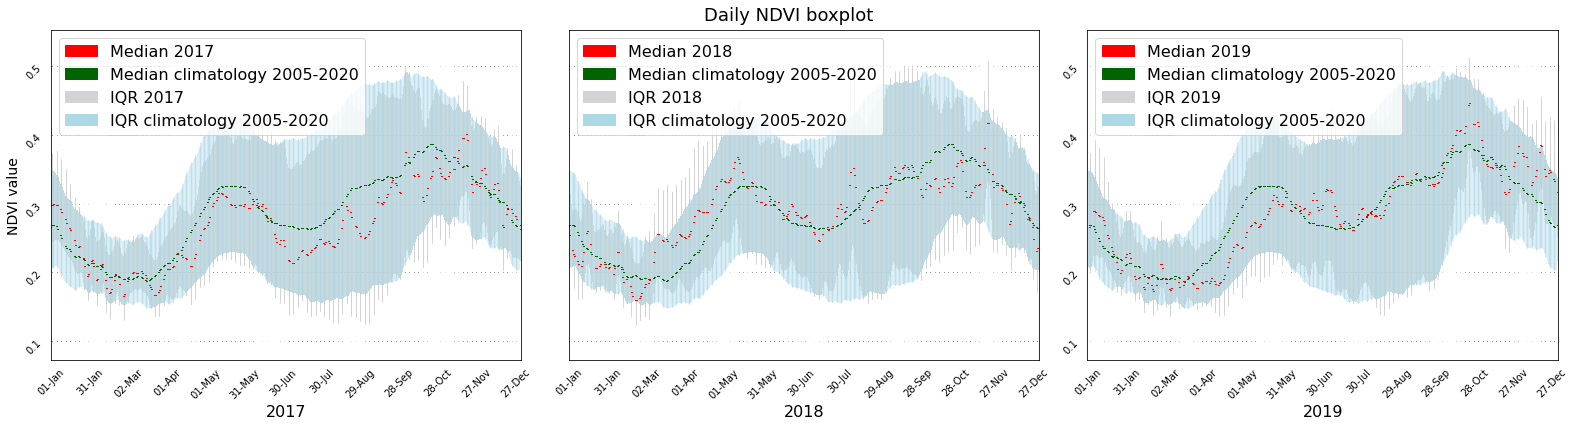

In [13]:
for region in gdf["REGIONNAME"].tolist():
    ds_new = subsetting_pipeline(CONFIG_PATH, ds_ndvi, countries=None, regions = [region])
    df_list_all, list_dates_all = get_subplot_year(ds_new)
    year = 2014
    print(f"Plotting from year {year} to year {year+2} for {region}")
    plot_veg_3_years(ds_new, years=[year, year+1, year+2])

    year = 2017
    print(f"Plotting from year {year} to year {year+2} for {region}")
    plot_veg_3_years(ds_new, years=[year, year+1, year+2])



In [3]:
location = ["Amhara"]
spi_new = subsetting_pipeline(CONFIG_PATH, precp_ds,  countries=None, regions = location)
ds_new = subsetting_pipeline(CONFIG_PATH, ds_ndvi, countries=None, regions = location)

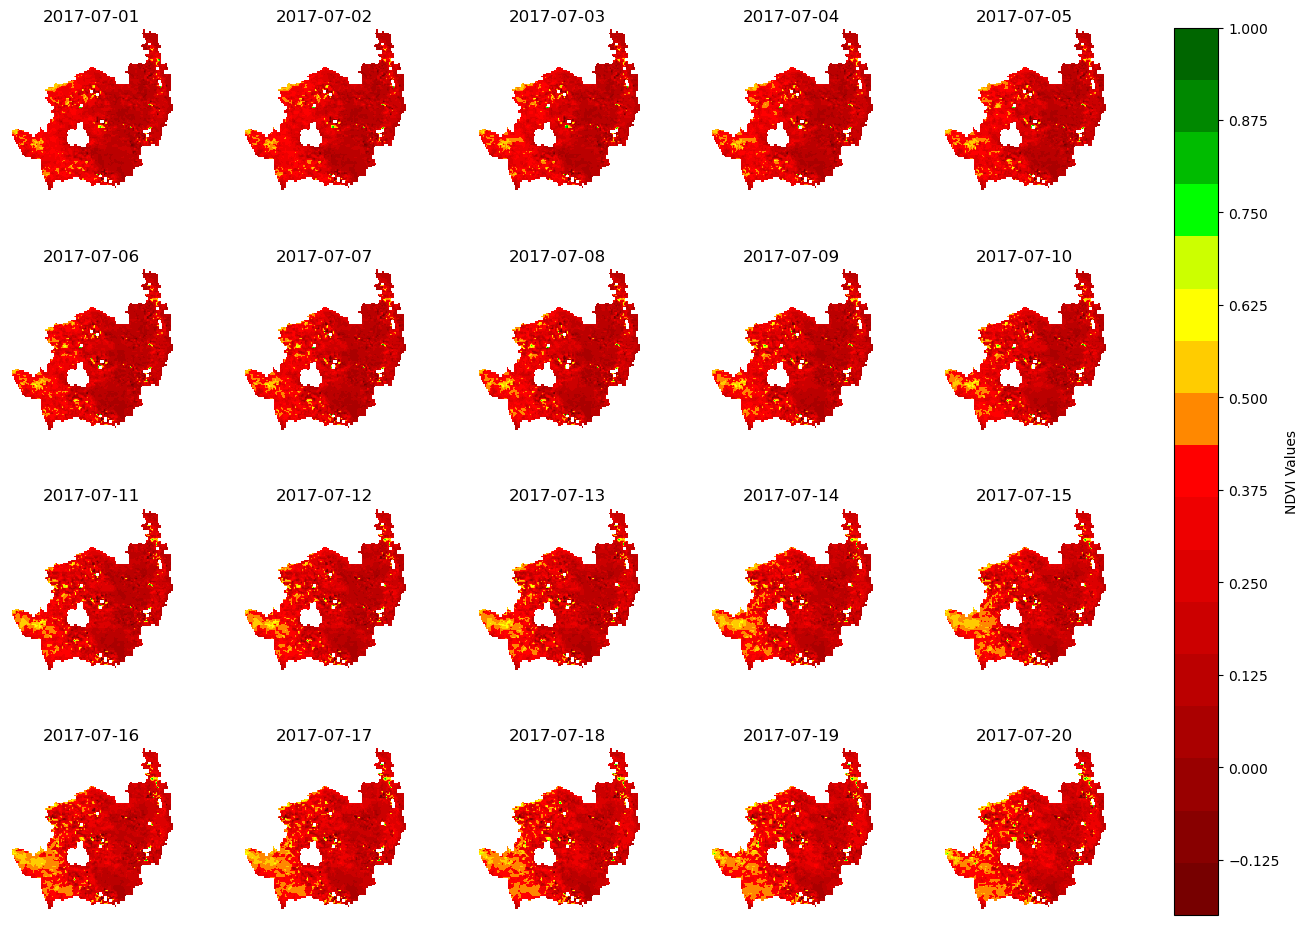

In [5]:
from p_drought_indices.functions.ndvi_functions import ndvi_colormap
# Create a 4x5 subplot grid
fig, axes = plt.subplots(4, 5, figsize=(15, 10))
fig.tight_layout(pad=3.0)  # Add padding between subplots

# Select 20 days of data from your xarray dataset
# Replace 'start_date' and 'end_date' with the specific dates you want to plot
start_date = '2017-07-01'
end_date = '2017-07-20'

cmap, norm = ndvi_colormap()

data_to_plot = ds_new["ndvi"].sel(time=slice(start_date, end_date))

# List of upper boundaries for NDVI values (reversed order)
vals = [-0.941, -0.824, -0.706, -0.588, -0.471, -0.353, -0.235, -0.118, 0.000, 0.118, 0.235, 0.353, 0.471, 0.588, 0.706, 0.824, 0.941]
# List of corresponding colors in hexadecimal format (reversed order)
cols = [
    "#770000",
    "#880000",
    "#990000",
    "#AA0000",
    "#BB0000",
    "#CC0000",
    "#DD0000",
    "#EE0000",
    "#FF0000",
    "#FF8800",
    "#FFCC00",
    "#FFFF00",
    "#CCFF00",
    "#00FF00",
    "#00BB00",
    "#008800",
    "#006600"
]

# Loop through the subplots and plot each day's data
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        day_data = data_to_plot.isel(time=i * 5 + j)
        im = ax.imshow(day_data, cmap=cmap, norm=norm, vmin=-0.2, vmax=1.0)
        ax.set_title(day_data.time.values.astype('datetime64[D]'))
        ax.axis('off')  # Turn off axis labels

# Create a legend
legend_labels = [f"{vals[i]:.1f} - {vals[i+1]:.1f}" for i in range(len(vals) - 1)]
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='vertical', ticks=np.linspace(-1, 1.0, len(vals)))
#cbar.ax.set_xticklabels(legend_labels)
cbar.set_label('NDVI Values')

plt.show()

In [10]:
df_list_all, list_dates_all = get_subplot_year(ds_new)

days are 366
Calculating the full year for boxplot
The days are 366


In [11]:
year = 2017
variable = "ndvi"
df_list_1, list_dates_1 = get_xarray_time_subset(ds=ds_new, year=year, variable=variable, month=months)
df_list_all_1 = subsetting_whole(df_list_all = df_list_all, year = year, months=months)


days are 365
For year 2017 obtaining only months 6 to 12 for boxplot


days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


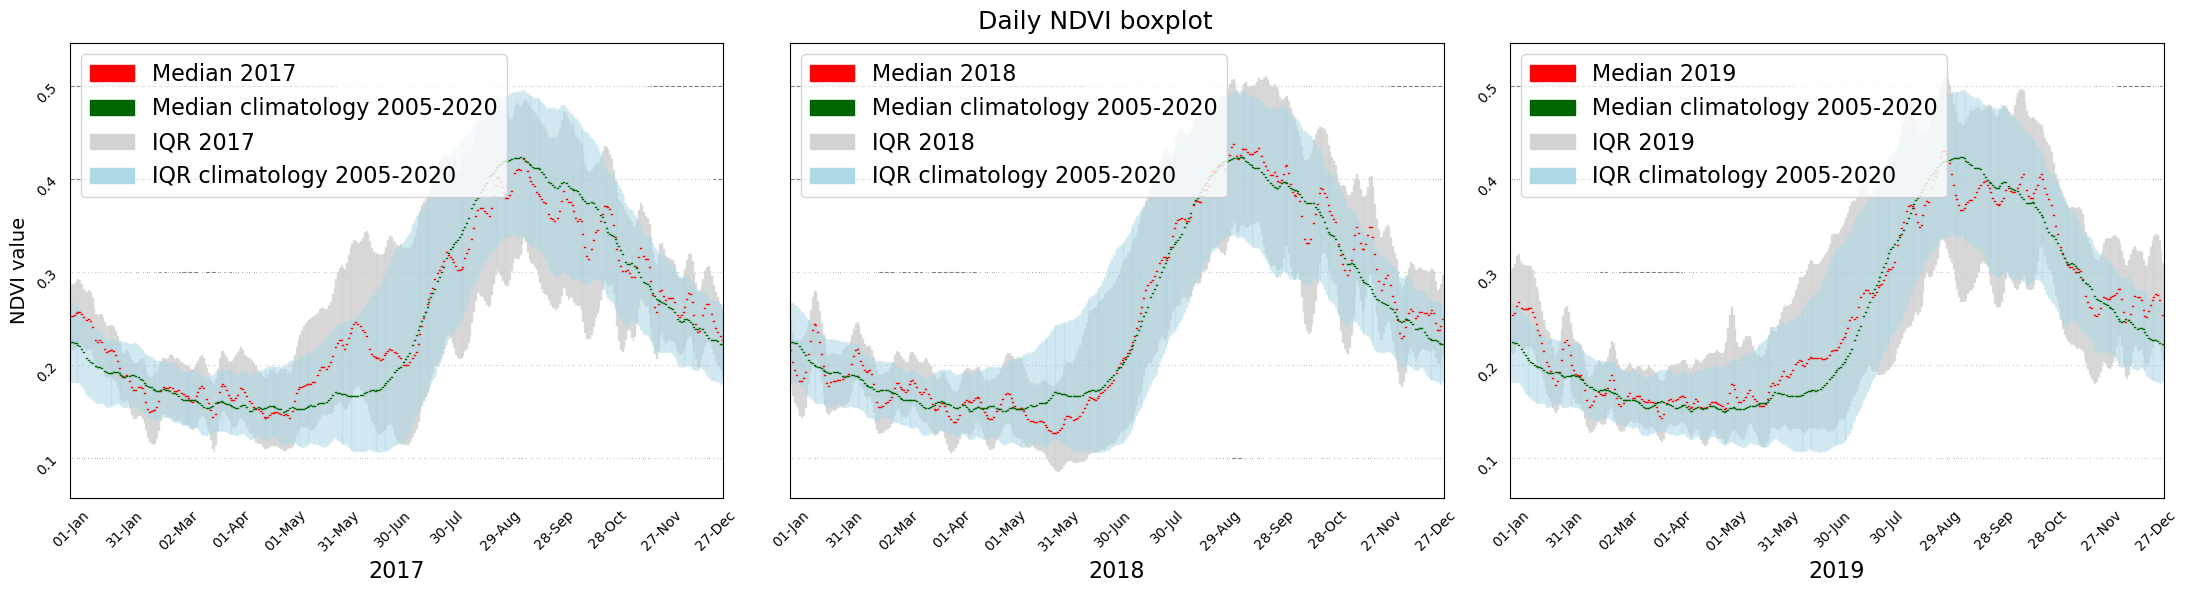

In [8]:
year = 2017

plot_veg_3_years(ds_new, years=[year, year+1, year+2])

days are 365
For year 2018 obtaining only months 3 to 6 for boxplot


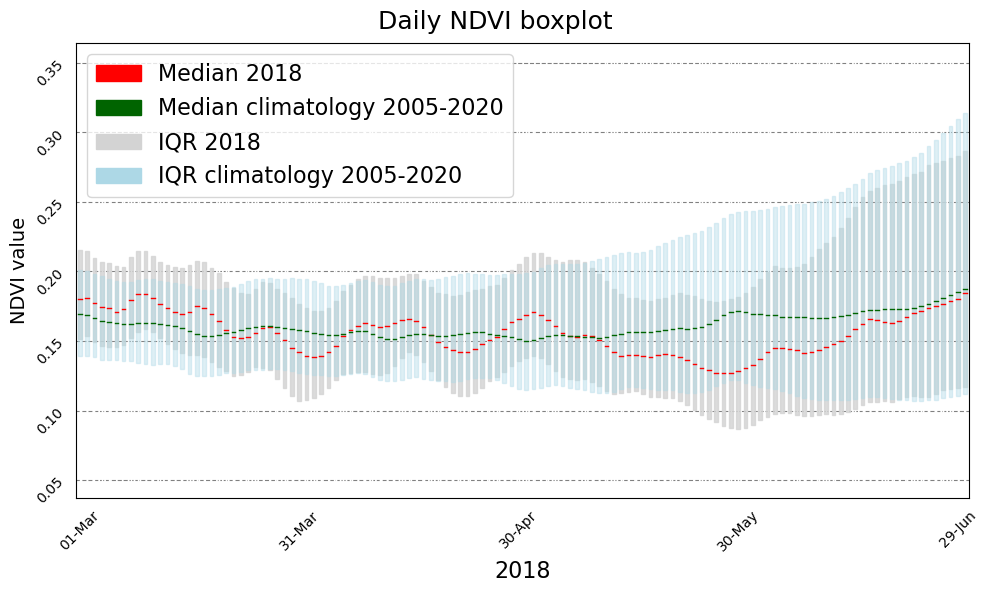

In [34]:
months = [i for i in np.arange(3,7)]
plot_veg_event(ds_new, year=year+1, months=months, df_list_all=df_list_all)

days are 366
Calculating the full year for boxplot
The days are 366
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 366
Calculating the full year for boxplot
The days are 366


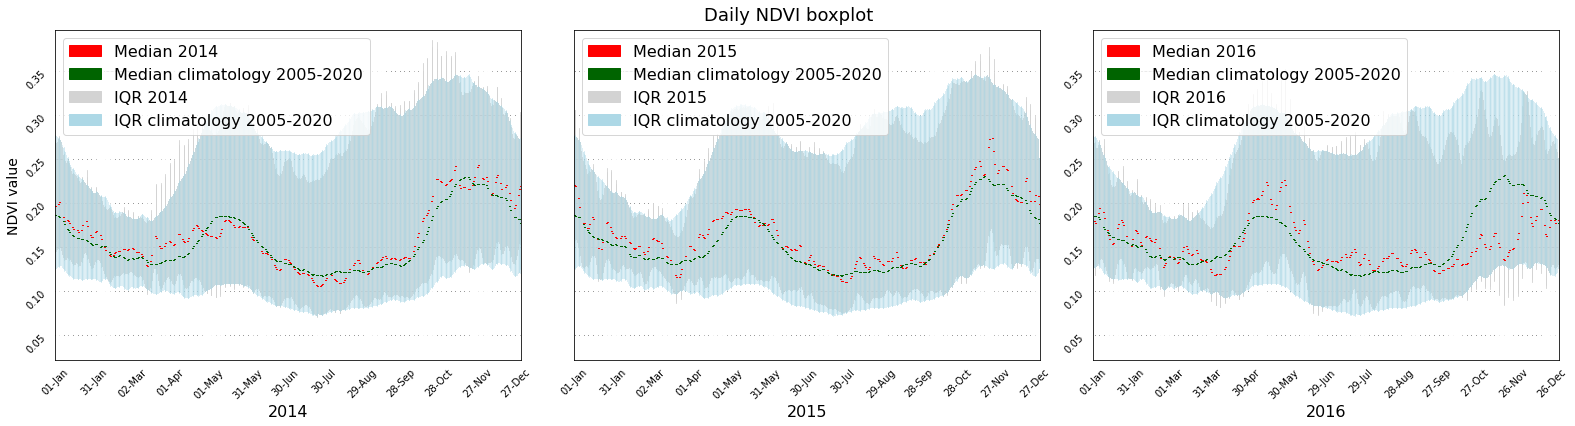

In [7]:
year = 2014

plot_veg_3_years(ds_ndvi, years=[year, year+1, year+2])

In [ ]:
for late in [60, 90, 180]: #[30, 60, 90, 180]:
    spi_dir = [f for f in config_directories if prod in f][0]
    var_target = f"spi_gamma_{late}"
    files = [f for f in os.listdir(spi_dir) if var_target in f ]
    spi_ds = xr.open_dataset(os.path.join(spi_dir, files[0]))
    plot_whole_period_spi_veg(spi_ds, ds_ndvi, late)


In [141]:
from p_drought_indices.functions.function_clns import prepare

sub_ds = spi_ds.sel(time=slice(ds_ndvi.time.min(), ds_ndvi.time.max()))

ds_repr = prepare(ds_ndvi)["ndvi"].rio.reproject_match(prepare(sub_ds)[var_target]).rename({"y":"lat","x":"lon"})

import xskillscore as xs

In [152]:
for late in [30, 60, 90, 180]: #[30, 60, 90, 180]:
    spi_dir = [f for f in config_directories if prod in f][0]
    var_target = f"spi_gamma_{late}"
    files = [f for f in os.listdir(spi_dir) if var_target in f ]
    spi_ds = xr.open_dataset(os.path.join(spi_dir, files[0]))
    sub_ds = spi_ds.sel(time=slice(ds_ndvi.time.min(), ds_ndvi.time.max()))
    value = xs.pearson_r(sub_ds[var_target], ds_repr, dim="time").mean()
    print(f"for SPI late {late} the correlation is:", value.values)


for SPI late 30 the correlation is: 0.23594821963113682
for SPI late 60 the correlation is: 0.2967866487944095
for SPI late 90 the correlation is: 0.29688042447458113
for SPI late 180 the correlation is: 0.26932003680002375


In [110]:
import matplotlib.dates as mdates

def plot_whole_period_spi_veg(spi_ds, vci, late, start_date="2006-01-01",end_date="2019-12-31"):

    spi_med = spi_ds.sel(time=slice(start_date, end_date))[var_target].median(["lat","lon"])
    veg_med = vci.sel(time=slice(start_date, end_date))["ndvi"].mean(["lat","lon"])
    
    time_vals = spi_med.time.values
    time_vals = [pd.to_datetime(x).strftime("%Y-%m-%d") for x in time_vals]
    dates = [pd.to_datetime(i) for i in time_vals]
    
    # Convert DataArrays to pandas DataFrames
    spi_df = spi_med.to_dataframe(name='spi')
    ndvi_df = veg_med.to_dataframe(name='ndvi')
    
    # Calculate spi_color based on conditions
    spi_color = np.where(spi_med > 0, 'blue', 'red')
    
    # Convert DataArrays to pandas DataFrames
    spi_df = pd.DataFrame({'spi': spi_df["spi"], 'spi_color': spi_color}, index=dates)
    ndvi_df = pd.DataFrame({'ndvi': ndvi_df["ndvi"]}, index=dates)
    
    # Set up the figure and axis
    fig, ax1 = plt.subplots(figsize=(40, 6))
    ax2 = ax1.twinx()
    
    # Plot SPI as bar chart with colored bars
    bar_width = 1
    dates_shifted = spi_df.index.to_series().apply(lambda x: x - pd.DateOffset(days=bar_width/2))
    ax1.bar(dates_shifted, spi_df['spi'], width=bar_width, color=spi_df['spi_color'], alpha=0.4)
    
    # Plot NDVI as a line chart
    ndvi_df['ndvi'].plot.line(ax=ax2, color='green')
    
    # Set labels and titles
    ax1.set_ylabel(f'SPI {late}', fontsize=16)
    ax2.set_ylabel('NDVI', fontsize=16)
    ax1.set_xlabel('Dates', fontsize=16)
    ax1.yaxis.set_tick_params(labelsize=14)
    ax2.yaxis.set_tick_params(labelsize=14)
    #ax1.set_title(f'SPI {late} and VCI Comparison')
    
    # Set y-axis limits for SPI and NDVI
    ndvi_min =  ndvi_df["ndvi"].min() - 0.05
    ndvi_max =  ndvi_df["ndvi"].max()
    spi_min = spi_df["spi"].min()
    spi_max = spi_df["spi"].max()
    ax1.set_ylim([spi_df["spi"].min(), spi_df["spi"].max()])
    ax2.set_ylim([ndvi_min, ndvi_max])
    
    # Set y-axis tick labels for SPI (blue = >0, red = <=0)
    #ax1.set_yticklabels(np.where(ax1.get_yticks() > 0, ax1.get_yticks(), '0'))
    
    # Adjust x-axis ticks to display one value per year (every 12 months)
    ax1.xaxis.set_major_locator(mdates.YearLocator())
    #ax1.xaxis.set_major_locator(mdates.MonthLocator())
    
    # Format x-axis date labels
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax1.tick_params(labelsize=18, axis="x",which="both")
    
    # Rotate x-axis tick labels for better readability
    plt.tick_params(rotation=45)

    # Add gray shaded areas for March-May and October-December for every year
    year_range = pd.date_range(start=start_date, end=end_date, freq='Y')
    for year in year_range:
        march_may = pd.date_range(start=year.replace(month=3, day=1), end=year.replace(month=5, day=31), freq='D')
        jun_sep = pd.date_range(start=year.replace(month=6, day=1), end=year.replace(month=9, day=30), freq='D')
        oct_dec = pd.date_range(start=year.replace(month=10, day=1), end=year.replace(month=12, day=31), freq='D')
        ax1.fill_between(march_may,  spi_min,  spi_max, facecolor='lightgray', alpha=0.3)
        ax1.fill_between(jun_sep,  spi_min,  spi_max, facecolor='silver', alpha=0.3)
        ax1.fill_between(oct_dec,  spi_min,  spi_max, facecolor='darkgrey', alpha=0.3)

    
    plt.savefig(f"/media/BIFROST/N2/Riccardo/Indices_analysis/data/images/spi_{late}_vci.png")
    # Show the plot
    plt.show()

In [ ]:
from p_drought_indices.analysis.visualizations.viz_vci_spi import plot_precp_3_years, get_precp_hist,plot_spi_3_years

df_list_all = get_precp_hist(spi_ds, variable=var_target)

for year in [2006, 2009, 2012, 2015, 2018]:
    plot_spi_3_years(spi_ds, years=[year, year+1, year+2], variable=var_target, df_list_all=df_list_all)

In [ ]:
from p_drought_indices.analysis.visualizations.viz_vci_spi import plot_precp_3_years, get_precp_hist

df_list_all = get_precp_hist(precp_ds, variable=variable)

for year in [2006, 2009, 2012, 2015, 2018]:
    plot_precp_3_years(precp_ds, years=[year, year+1, year+2], variable=variable, df_list_all=df_list_all)

In [ ]:
from p_drought_indices.analysis.visualizations.viz_vci_spi import plot_spi_3_years, plot_vci_3_years, plot_veg_3_years, plot_precp_3_years

for year in [2006, 2009, 2012, 2015, 2018]:
    print("plotting years {x} {y} {z}".format(x=year, y=year+1, z=year+2))
    #plot_precp_3_years(precp_ds, years=[year, year+1, year+2], variable=variable)
    plot_spi_3_years(spi_ds, years=[year, year+1, year+2], variable=var_target)
    plot_veg_3_years(ds_ndvi, years=[year, year+1, year+2])
    plot_vci_3_years(vci, years=[year, year+1, year+2])


In [ ]:
year = 2008
plot_veg_3_years(ds_ndvi, years=[year, year+1, year+2])
plot_vci_3_years(vci, years=[year, year+1, year+2])

In [4]:
np.percentile([3,4,5,6,7,8], 75)

6.75

Starting analysis for Open_forest,
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


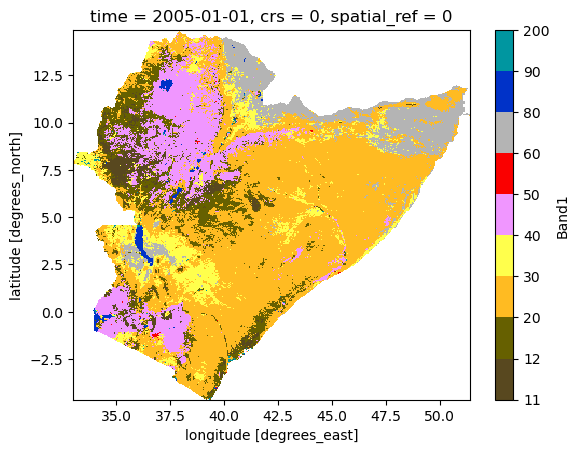

In [3]:
import numpy as np
year = np.arange(2005, 2021).tolist()
plot_products_drought_pixels(year)

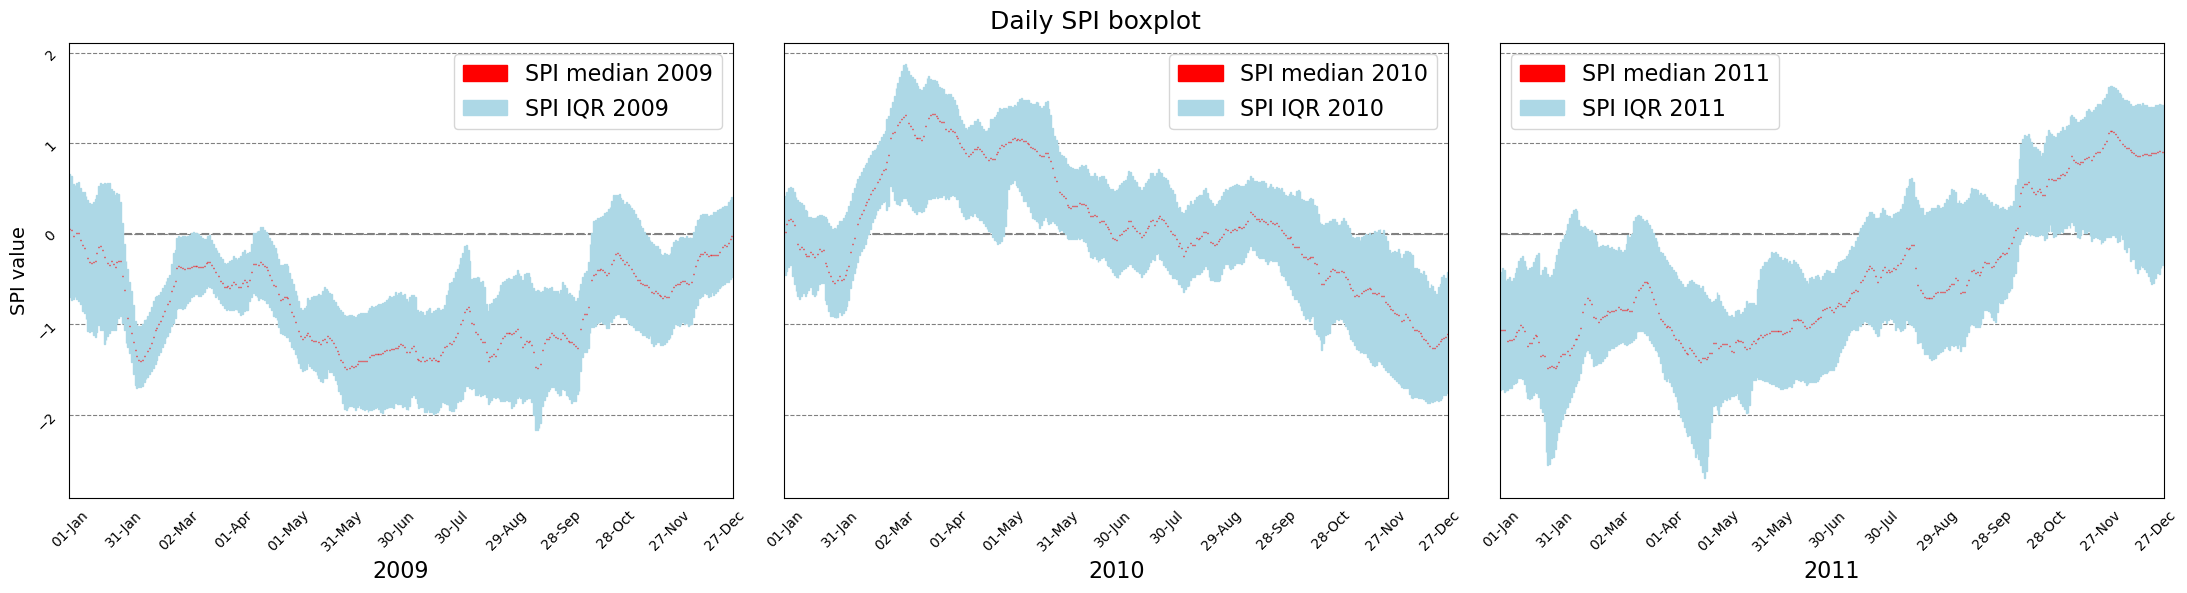

Starting analysis for Shrubland
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


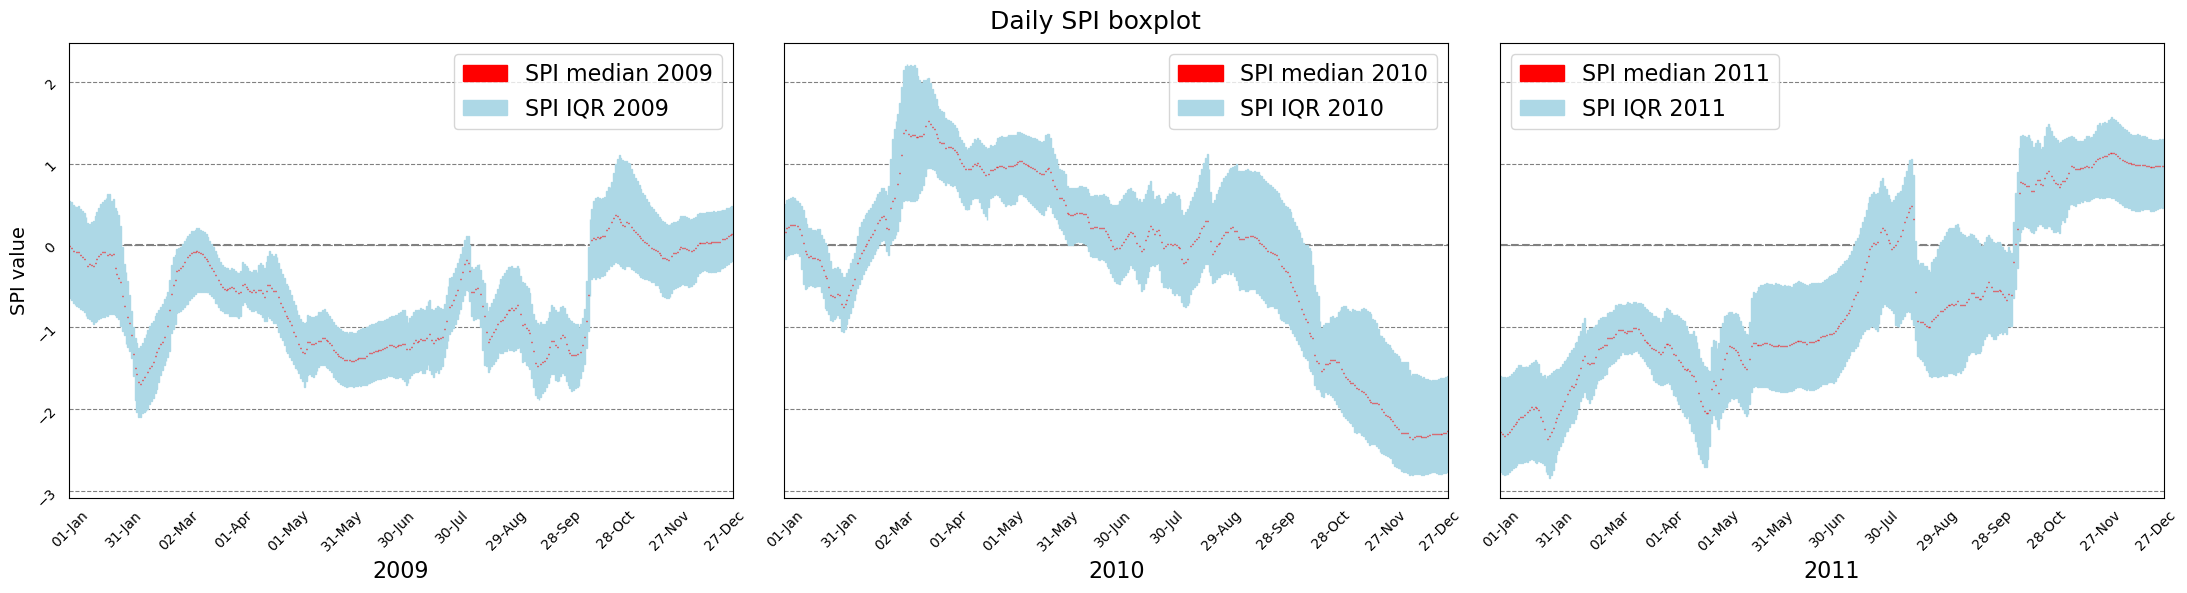

Starting analysis for Herbaceous_vegetation
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


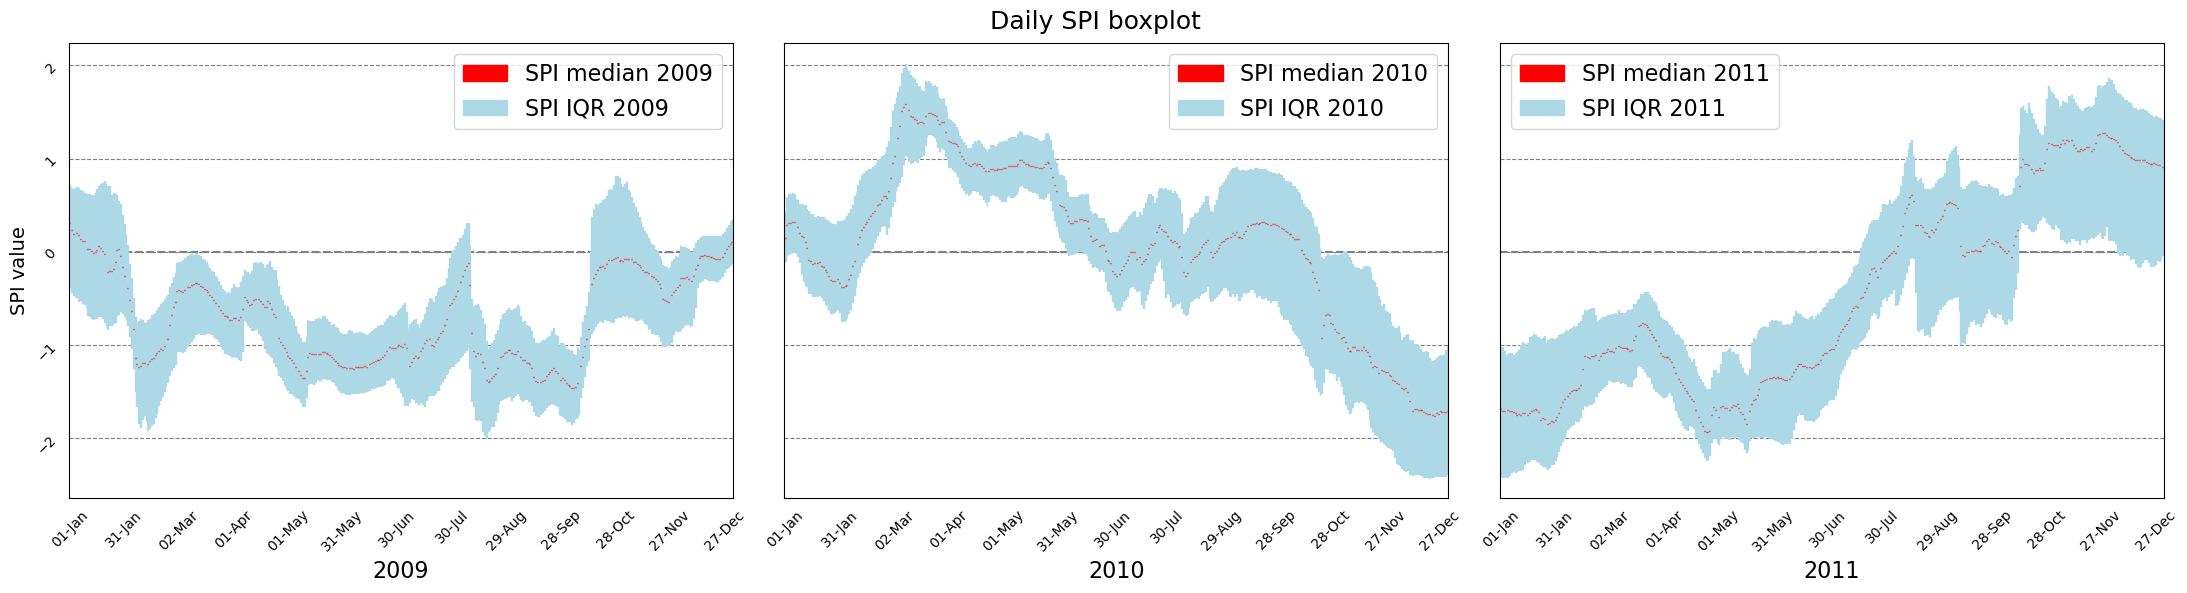

Starting analysis for Cropland
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


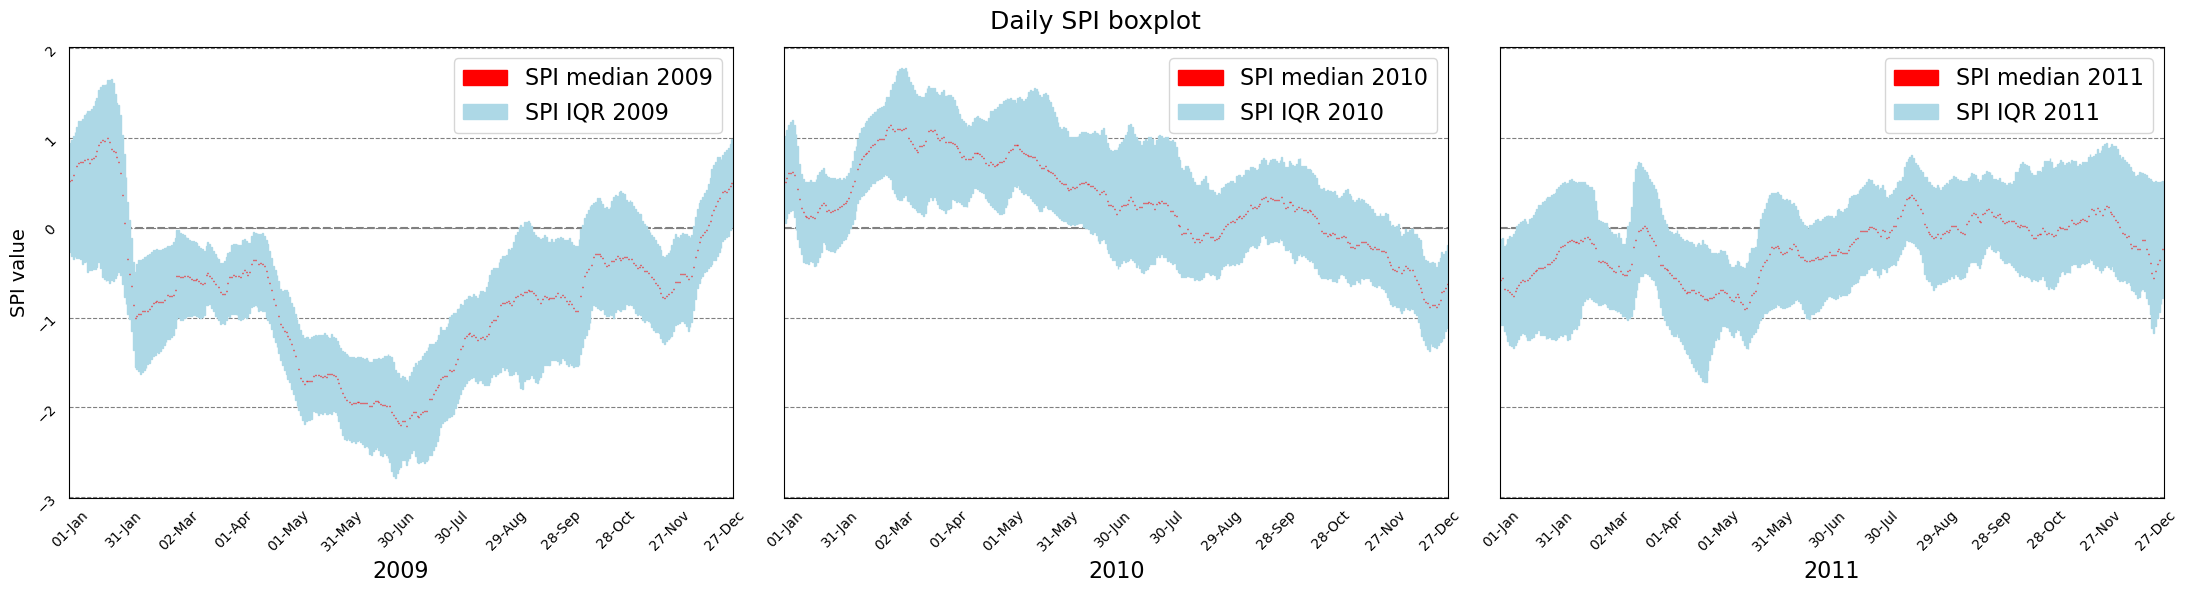

Starting analysis for Built-up
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


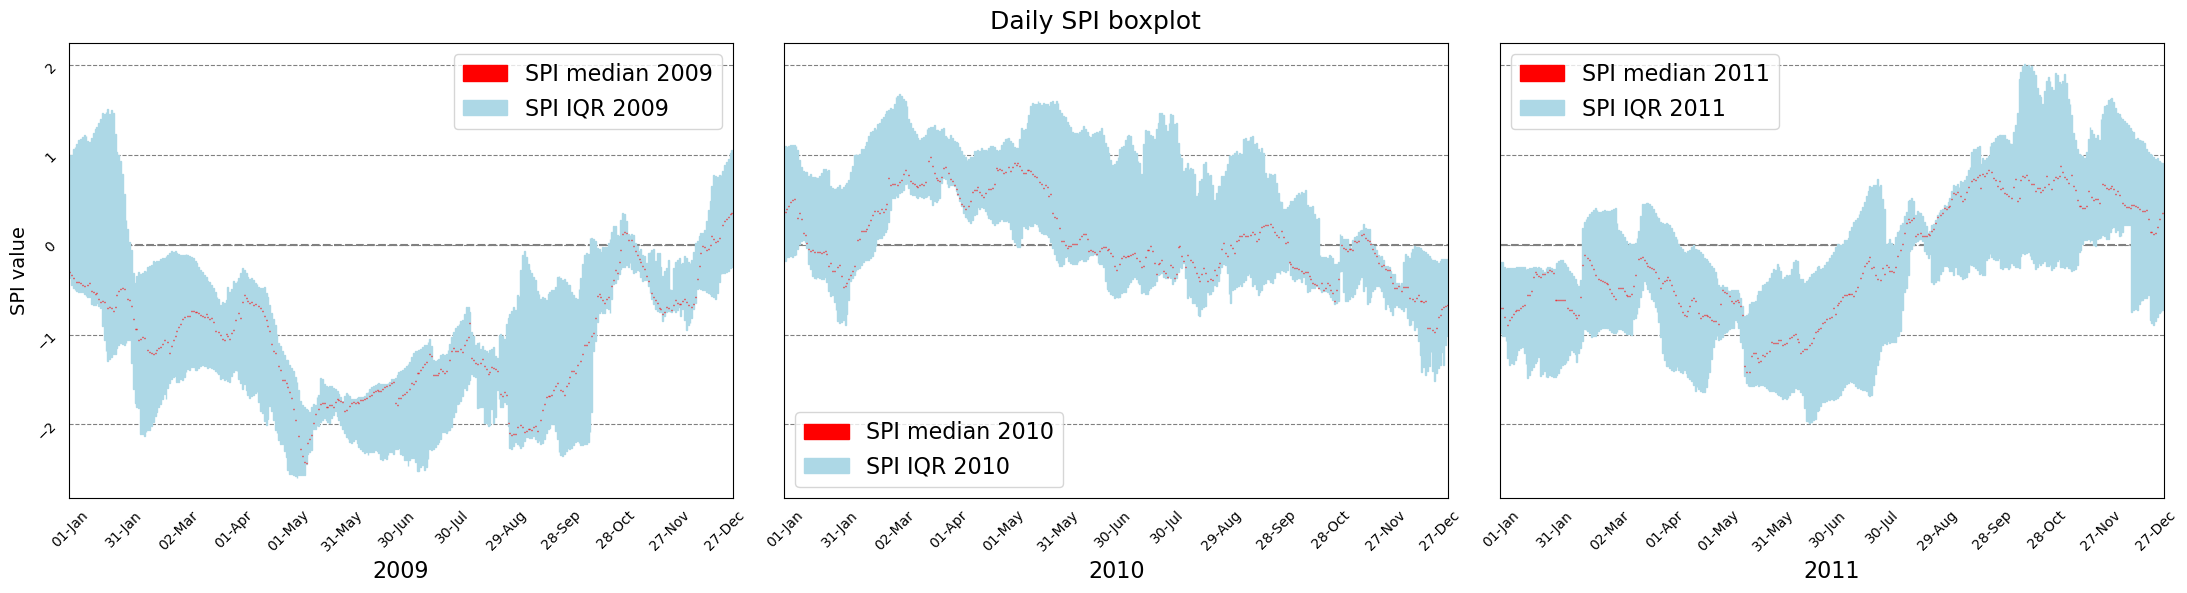

Starting analysis for Bare_sparse_vegetation
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


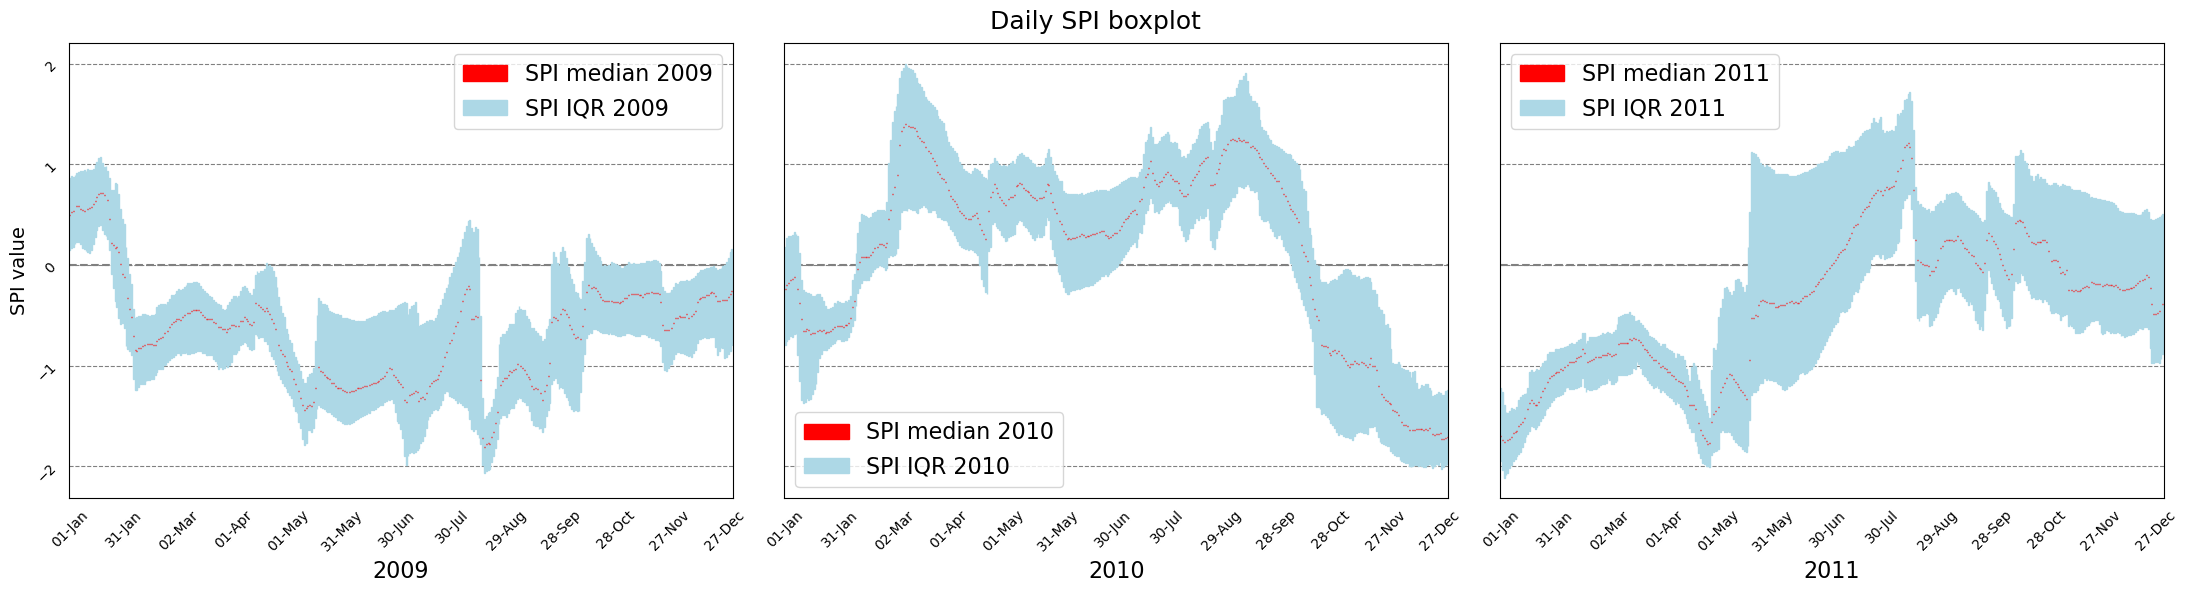

Starting analysis for Permanent_water_bodies
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


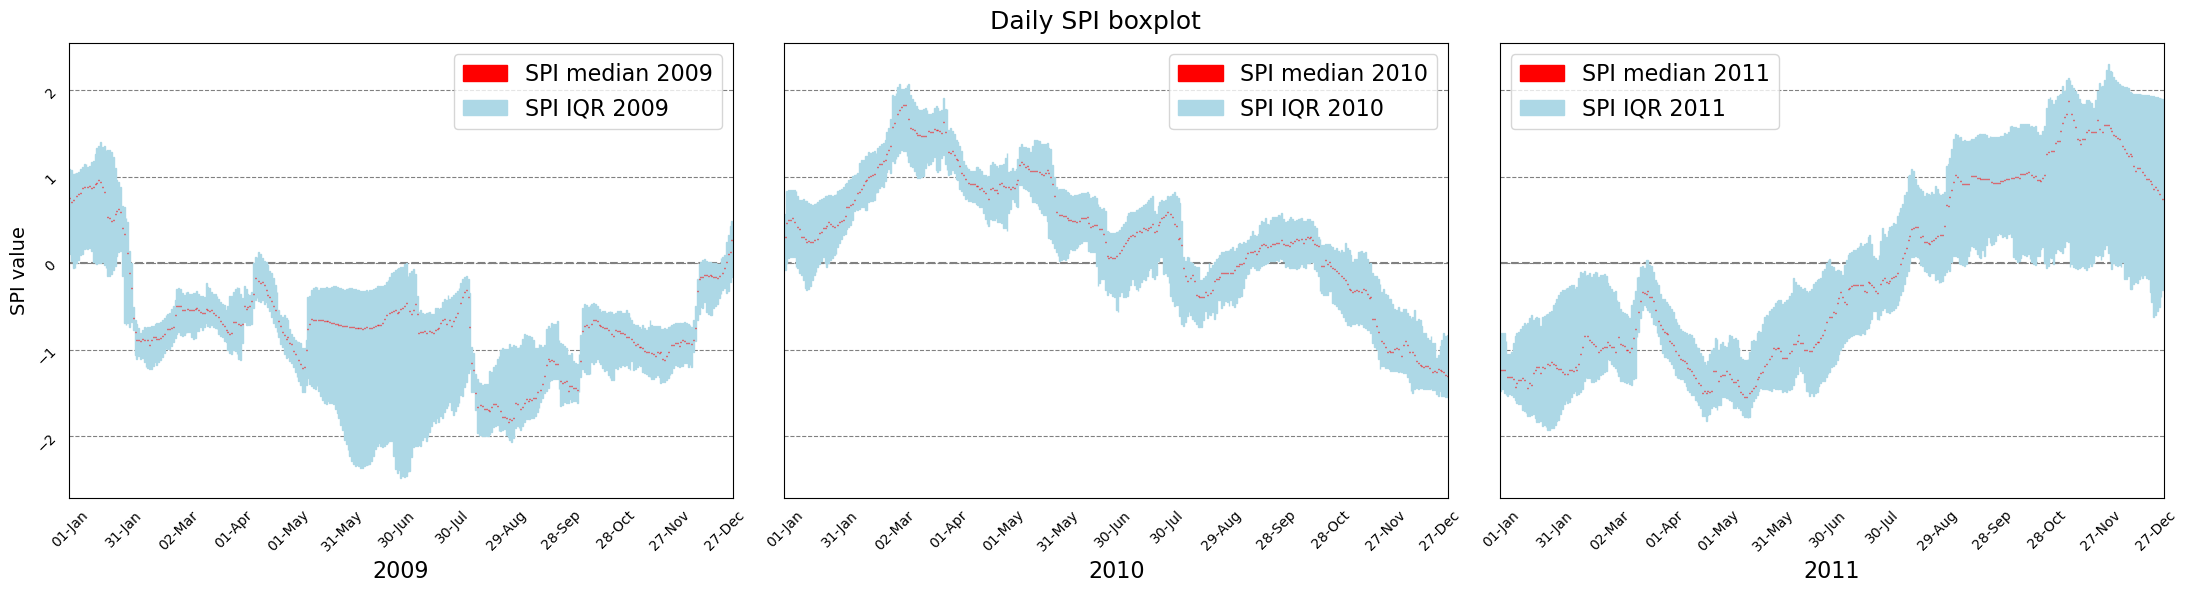

Starting analysis for Herbaceous_wetland
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


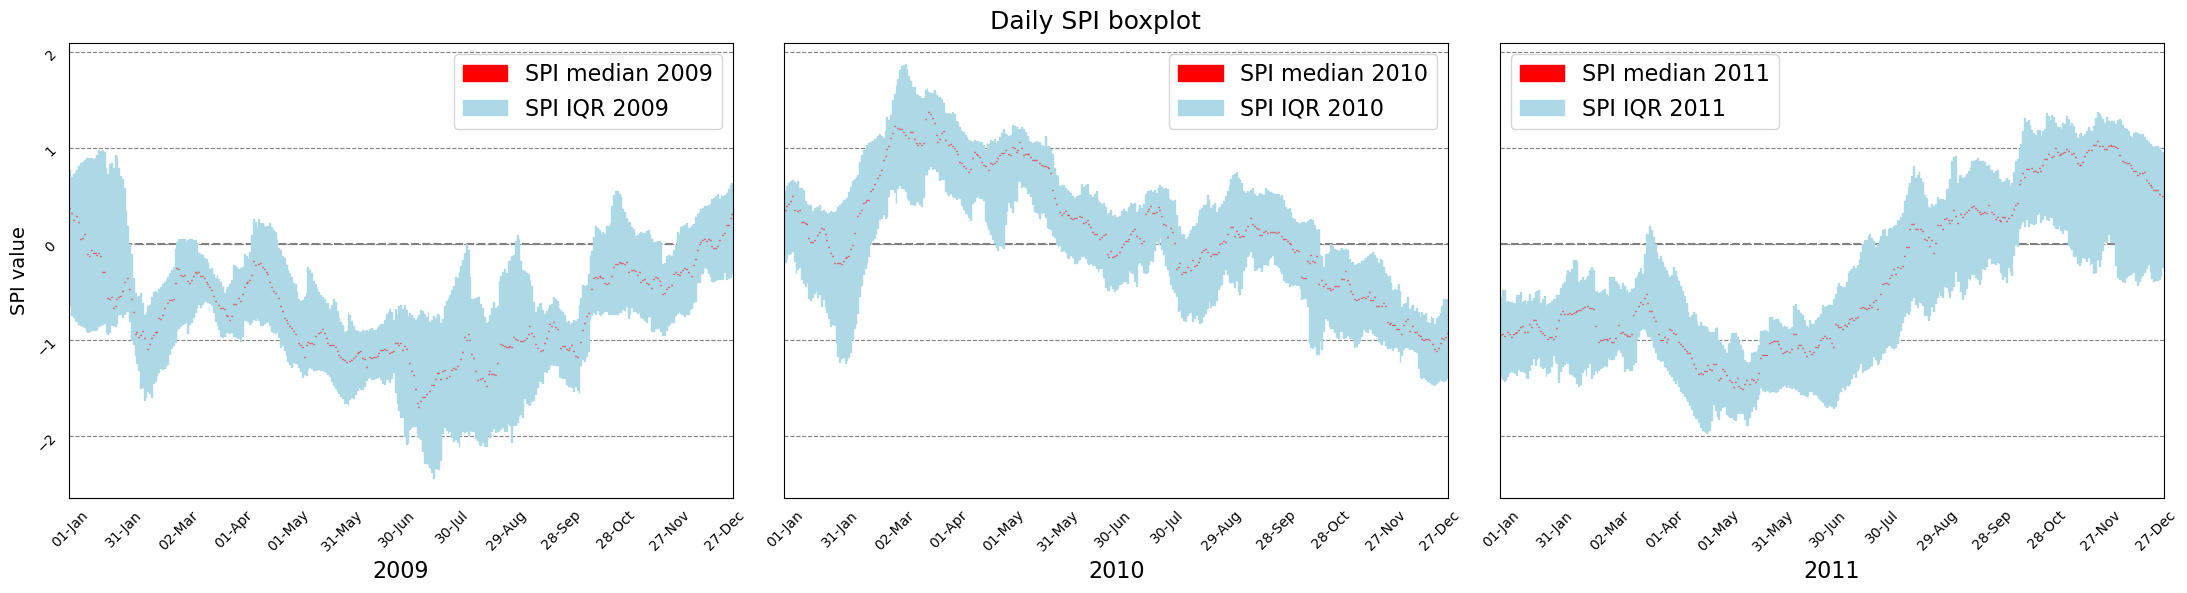

Starting analysis for Oceans,_seas
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365
days are 365
Calculating the full year for boxplot
The days are 365


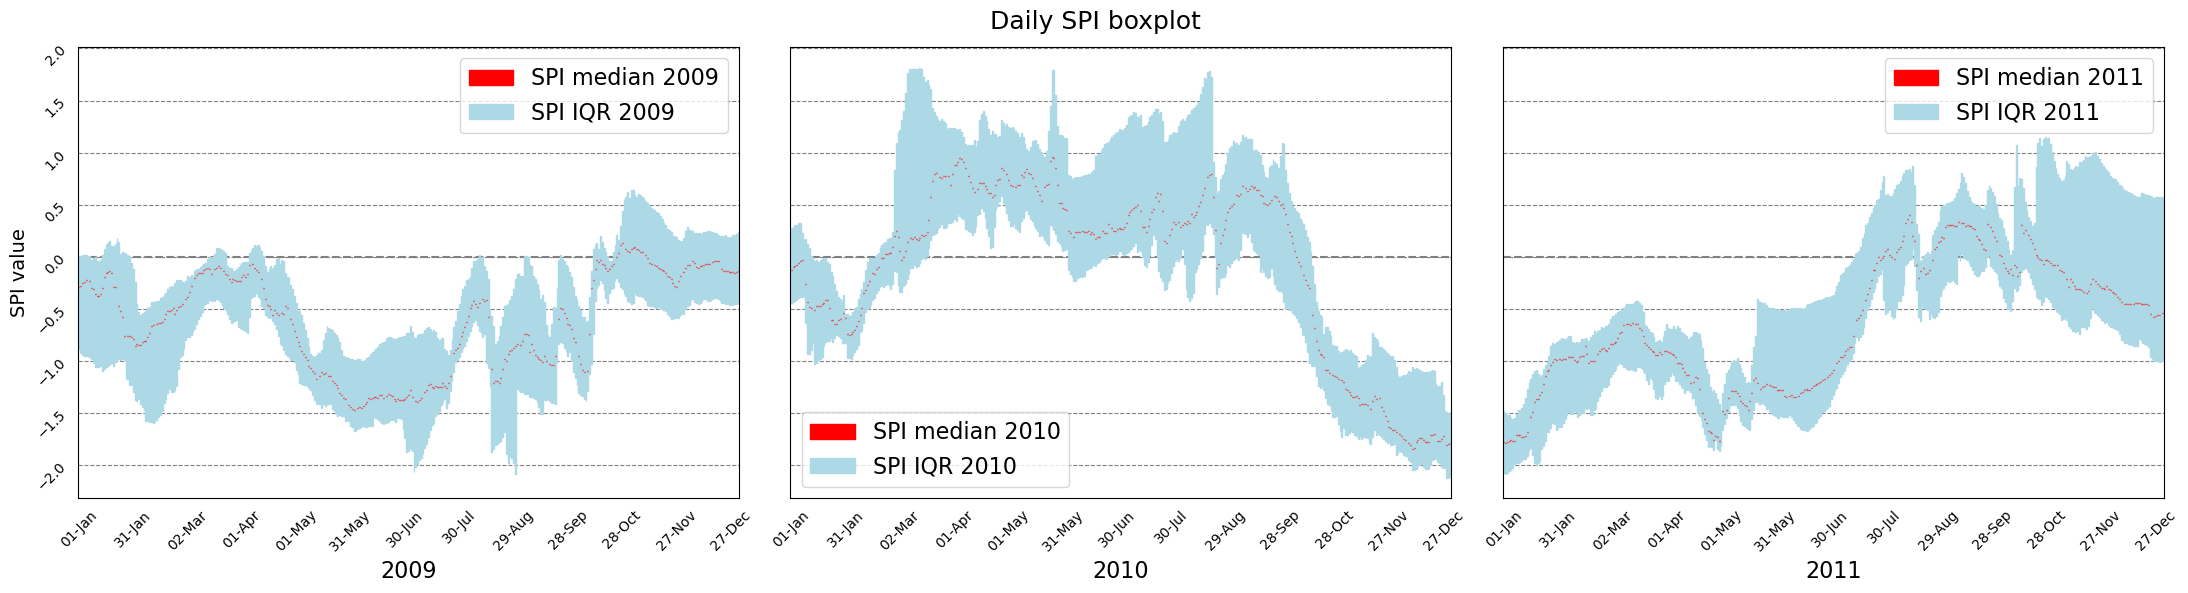

In [94]:
from p_drought_indices.ancillary_vars.esa_landuse import get_level_colors, get_cover_dataset
from p_drought_indices.analysis.visualizations.viz_vci_spi import plot_veg_3_years, plot_spi_3_years
from p_drought_indices.functions.function_clns import prepare

def clean_multi_nulls(ds):
    # Create a MultiIndex
    ds = ds.stack(pixel=("lat", "lon"))
    # Drop the pixels that only have NA values.
    ds = ds.dropna("pixel", how="all")
    ds = ds.unstack(["pixel"]).sortby(["lat","lon"])
    return ds


ndvi_res =prepare(ds_ndvi)
img_path =r'../data/images/chirps_esa'
ds_cover = get_cover_dataset(CONFIG_PATH, ndvi_res["ndvi"], img_path, level1=True)

cmap, levels = get_level_colors(ds_cover["Band1"].isel(time=0), level1=True)
ds_cover.isel(time=0)["Band1"].plot(colors=cmap, levels=levels)

img_path =r'../data/images/chirps_esa'
base_path = r'../data/images/soil_type'
soil_types = np.unique(ds_cover["Band1"].values)[:-1]

values_land_cover = {0	:'Unknown', 20:	'Shrubland',30:'Herbaceous vegetation',40:	'Cropland',
                        50:	'Built-up',60:	'Bare sparse vegetation',70:'Snow and ice', 80:	'Permanent water bodies',
                        90:'Herbaceous wetland',100: 'Moss and lichen', 11:"Closed forest", 
                        12: "Open forest,", 200: "Oceans, seas"}

precp_ds =prepare(precp_ds)
ds_cover_precp = get_cover_dataset(CONFIG_PATH, precp_ds[variable], img_path)

spi_ds =prepare(spi_ds).transpose("time","lat","lon")
ds_cover_spi = get_cover_dataset(CONFIG_PATH, spi_ds[var_target], img_path)

ds_ndvi =prepare(ds_ndvi)
ds_cover_ndvi = get_cover_dataset(CONFIG_PATH, ndvi_res["ndvi"], img_path)

for soil_type in soil_types[1:]:
    soil_name = values_land_cover[soil_type].replace(" ","_").replace("/","_")
    print(f"Starting analysis for {soil_name}")

    ### Raw precipitation
    #ds_soil = ds_cover_precp[variable].where(ds_cover_precp["Band1"]==soil_type).to_dataset()
    #ds_soil = clean_multi_nulls(ds_soil)
    #path = os.path.join(base_path,"precp", soil_name, ".png")
    #plot_precp_2009_event(ds_soil,variable=variable, path=path)
    year = 2009
    
    #ds_soil = ds_cover_ndvi["ndvi"].where(ds_cover_ndvi["Band1"]==soil_type).to_dataset()
    #ds_soil = clean_multi_nulls(ds_soil)
    #plot_veg_3_years(ds_soil, years=[year, year+1, year+2])

    ### SPI
    ds_soil = ds_cover_spi[var_target].where(ds_cover_spi["Band1"]==soil_type).to_dataset()
    ds_soil = clean_multi_nulls(ds_soil)    
    #path = os.path.join(base_path,"spi", soil_name, ".png")
    plot_spi_3_years(ds_soil,variable=var_target, years=[year, year+1, year+2])

    ### NDVI   
    #ds_soil = ds_cover_ndvi["ndvi"].where(ds_cover_ndvi["Band1"]==soil_type).to_dataset()
    #ds_soil = clean_multi_nulls(ds_soil)
    #path = os.path.join(base_path,"ndvi", soil_name, ".png")
    #plot_veg_2009_event(ds_soil, path=path)

In [ ]:
ndvi_res =prepare(precp_ds)
ds_cover = get_cover_dataset(CONFIG_PATH, precp_ds[variable], img_path)

ds_soil = ds_cover[variable].where(ds_cover["Band1"]==soil_type).to_dataset()
ds_soil - clean_multi_nulls(ds_soil)

plot_precp_2009_event(ds_soil,variable=variable)

In [ ]:
from p_drought_indices.analysis.visualizations.viz_vci_spi import plot_precp_2009_event, plot_spi_2009_event

spi_ds =prepare(spi_ds).transpose("time","lat","lon")
ds_cover = get_cover_dataset(CONFIG_PATH, spi_ds[var_target], img_path)

ds_soil = ds_cover[var_target].where(ds_cover["Band1"]==soil_type).to_dataset()
ds_soil = clean_multi_nulls(ds_soil)

plot_spi_2009_event(ds_soil,variable=var_target)

In [ ]:
from p_drought_indices.analysis.visualizations.viz_vci_spi import plot_vci_2009_event, plot_veg_2009_event
from p_drought_indices.ancillary_vars.esa_landuse import get_level_colors, get_cover_dataset

ndvi_res =prepare(ds_ndvi)
ds_cover = get_cover_dataset(CONFIG_PATH, ndvi_res["ndvi"], img_path)

ds_soil = ds_cover["ndvi"].where(ds_cover["Band1"]==soil_type).to_dataset()
ds_soil = clean_multi_nulls(ds_soil)

plot_veg_2009_event(ds_soil)

In [ ]:
list_late = [30, 60, 90, 180]

for product_dir in [config['SPI']['GPCC']['path'], config['SPI']['ERA5']['path'], config['SPI']['CHIRPS']['path'], config['SPI']['IMERG']['path']]:
    print("New product plotting...")
    fig, axes = plt.subplots(nrows=2,ncols=2, figsize =(15, 7))
    list_data = []
    for late in list_late:
        var_target = f"spi_gamma_{late}"
        files = [f for f in os.listdir(product_dir) if var_target in f ]
        locals()[f"spi_{late}"] = xr.open_dataset(os.path.join(product_dir, files[0]))
        locals()[f"df_list_{late}"], list_dates = get_subplot_year(locals()[f"spi_{late}"] , var=var_target, year=np.arange(2005, 2021).tolist())
        list_data.append(locals()[f"df_list_{late}"],)
    
    product = files[0].split("_")[0]
    title = f"SPI for product {product}"
    multiple_spi_boxplots(list_late, list_data, title=title, list_dates)

### Plotting precipitation series

In [ ]:
year = np.arange(2005, 2021).tolist()

for product_dir in config_directories:
    list_files = [f for f in os.listdir(product_dir) if (f.endswith(".nc")) and ("merged" in f)]
    ds = xr.open_dataset(os.path.join(product_dir, list_files[0]))
    variable = [var for var in ds.data_vars if var!= "spatial_ref"][0]
    name = list_files[0].split("_")[0]
    box_plot_year(ds, var=variable, year=year, title=f"{name.upper()} product precipitation series for year(s) {get_year(year)}", figsize=(10,4))

In [ ]:
year = 2009
for product_dir in config_dir_precp:
    list_files = [f for f in os.listdir(product_dir) if (f.endswith(".nc")) and ("merged" in f)]
    ds = xr.open_dataset(os.path.join(product_dir, list_files[0]))
    subset_ds=ds.sel(time=ds.time.dt.year.isin(year))
    variable = [var for var in ds.data_vars if var!= "spatial_ref"][0]
    name = list_files[0].split("_")[0]
    box_plot_year(subset_ds, var=variable, year=year, title=f"{name.upper()} product precipitation series for year(s) {get_year(year)}", figsize=(10,4))

In [ ]:
year = 2010
for product_dir in config_dir_precp:
    list_files = [f for f in os.listdir(product_dir) if (f.endswith(".nc")) and ("merged" in f)]
    ds = xr.open_dataset(os.path.join(product_dir, list_files[0]))
    subset_ds=ds.sel(time=ds.time.dt.year.isin(year))
    variable = [var for var in ds.data_vars if var!= "spatial_ref"][0]
    name = list_files[0].split("_")[0]
    box_plot_year(subset_ds, var=variable, year=year, title=f"{name.upper()} product precipitation series for year(s) {get_year(year)}", figsize=(10,4))

In [ ]:
import numpy as np
year = np.arange(2005, 2021).tolist()
plot_products_drought_pixels(year)

In [ ]:
for year in [2009, 2010, 2011]:
    plot_products_drought_pixels(year)